# Part 1.

## Issue 1. EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [4]:
from collections import Counter
from wordcloud import WordCloud
import math

In [5]:
# Load the dataset
df = pd.read_csv(".\\ml-bio-2024\\train.csv")

### 1. Обзор 

In [6]:

# 1. Inspect the dataset structure (without unnecessary caps and excess columns)
df.columns = df.columns.str.strip().str.lower()  # Normalize column names (lowercase, strip spaces)

# Drop unnecessary columns (like unnamed index column if redundant)
if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])

# 2. Check for missing values
missing_data = df.isnull().sum()

# 3. Check for duplicates
duplicate_count = df.duplicated().sum()

# 4. Display the dataset info and the first few rows
print("Dataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
display(missing_data)

print(f"\nNumber of Duplicate Rows: {duplicate_count}")

print("\nFirst Few Rows of the Dataset:")
display(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41159 entries, 0 to 41158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       41158 non-null  object
 1   sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None

Missing Values in Each Column:


text         1
sentiment    4
dtype: int64


Number of Duplicate Rows: 0

First Few Rows of the Dataset:


text           sentiment
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1  advice Talk to your neighbours family to excha...            Positive
2  Coronavirus Australia: Woolworths to give elde...            Positive
3  My food stock is not the only one which is emp...            Positive
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

### 2. Анализ распределений текстов по семантическим категориям


Sentiment Distribution (Counts):


sentiment
Positive              11422
Negative               9917
Neutral                7711
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

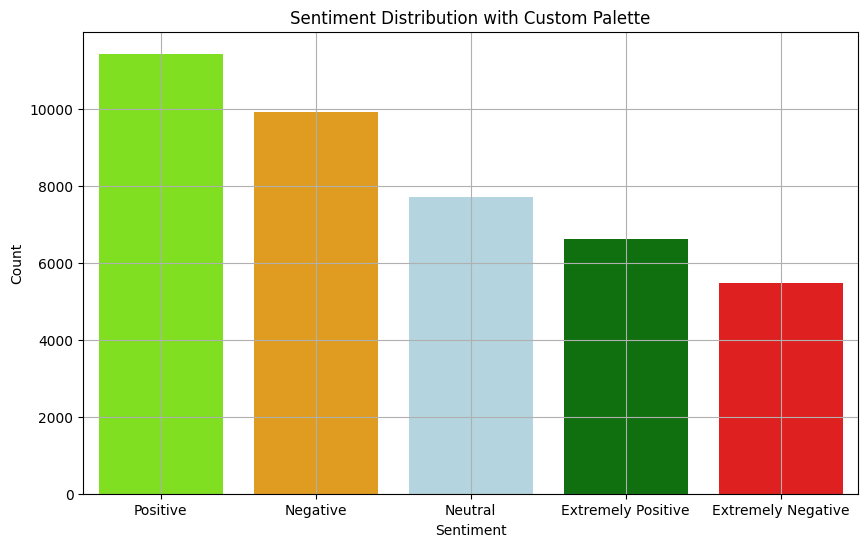

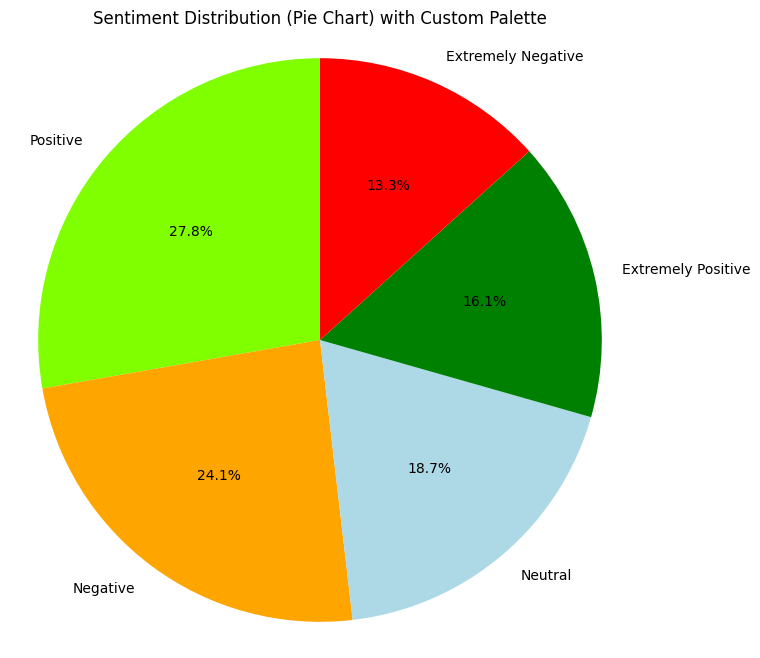

In [7]:
# 1. Count the number of occurrences for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# 2. Display the sentiment distribution as a table
print("Sentiment Distribution (Counts):")
display(sentiment_counts)

# 3. Define the custom color palette based on your description
custom_palette = {
    'Extremely Positive': '#008000',  # Saturated Green
    'Positive': '#7FFF00',  # Light Green (Salad)
    'Neutral': '#ADD8E6',  # Light Blue (can also use White: '#FFFFFF')
    'Negative': '#FFA500',  # Orange
    'Extremely Negative': '#FF0000'  # Red
}

# 4. Prepare the data for plotting
df_sentiment_plot = pd.DataFrame({'sentiment': sentiment_counts.index, 'count': sentiment_counts.values})

# 5. Plot the sentiment distribution using a bar chart with the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sentiment_plot, x='sentiment', y='count', hue='sentiment', palette=custom_palette, dodge=False)
plt.title('Sentiment Distribution with Custom Palette')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()

# 6. Optional: Plot the distribution as a pie chart using the same color palette
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=[custom_palette[sentiment] for sentiment in sentiment_counts.index])
plt.title('Sentiment Distribution (Pie Chart) with Custom Palette')
plt.axis('equal')
plt.show()

✅ Распределение тональностей сообщений демонстрирует доминирование положительных настроений в анализируемом корпусе       данных. Позитивные сообщения составляют 27.8%, в то время как негативные — 24.1%, что указывает на высокую поляризацию мнений среди пользователей. Нейтральные сообщения представлены на уровне 18.7%, что указывает на умеренное число сдержанных высказываний. Экстремально позитивные сообщения занимают 16.1%, в то время как экстремально негативные составляют 13.3%. Эти данные позволяют сделать вывод о сбалансированном распределении тональностей с заметным преобладанием позитивных и умеренно негативных сообщений.

### 3. Анализ характеристик текстов

In [8]:
# Analyze Text Column

# Ensure the text column has only valid strings and handle non-string values
df['text'] = df['text'].astype(str)  # Convert all entries to string
df['text'] = df['text'].replace('nan', '')  # Replace 'nan' strings if conversion introduced any

# Calculate text length (number of characters) and word count (number of words)
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

#### 3.1 Общий анализ

Total Text Length Statistics:


count    41159.000000
mean       204.190335
std         68.667665
min          0.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: text_length, dtype: float64


Total Word Count Statistics:


count    41159.000000
mean        30.498846
std         11.592777
min          0.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: word_count, dtype: float64

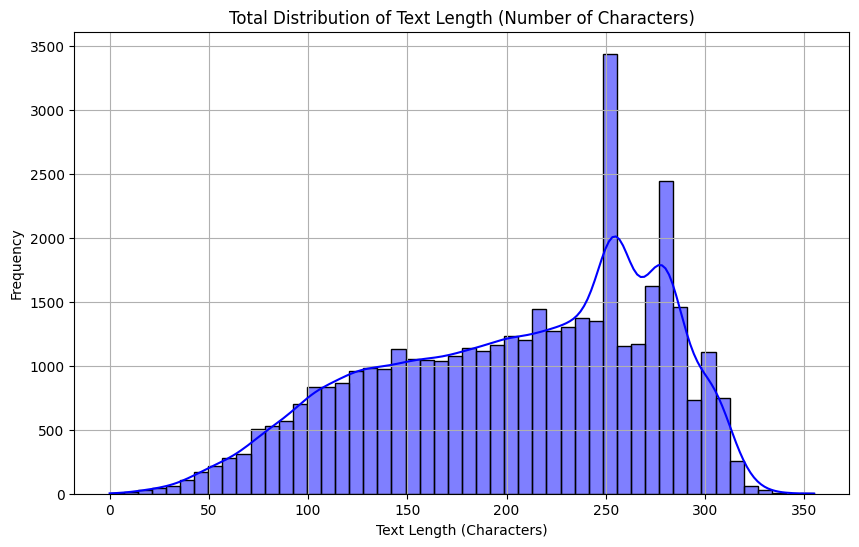

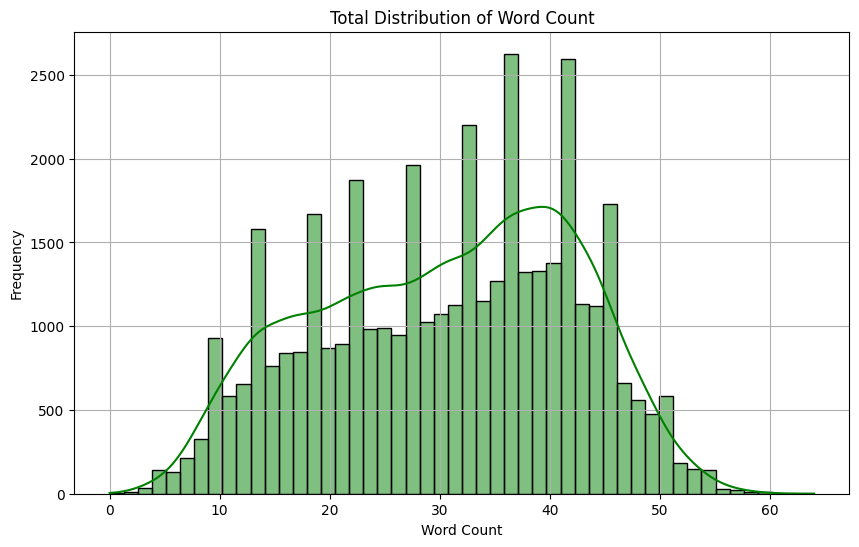

In [9]:
# ====== Total Statistics ======
# Total statistics for text length and word count
text_length_stats_total = df['text_length'].describe()
word_count_stats_total = df['word_count'].describe()

print("Total Text Length Statistics:")
display(text_length_stats_total)

print("\nTotal Word Count Statistics:")
display(word_count_stats_total)

# Visualize total text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue', fill=True)
plt.title('Total Distribution of Text Length (Number of Characters)')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize total word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='green', fill=True)
plt.title('Total Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



✅ Распределение длин текстов и количества слов в представленных данных демонстрирует широкий диапазон вариативности. 

Средняя длина текста составляет 204 символа, при этом среднее количество слов — около 30. В то же время распределение текстов по длине и количеству слов показывает характерные пики на отметке около 250 символов и 40 слов, что может указывать на особенности структуры данных, вероятно обусловленные ограничениями платформы или стандартами написания сообщений. 

Эта информация важна для последующего анализа и обработки данных, так как позволяет оценить характер текстов, что может оказать влияние на последующие этапы анализа, включая обработку текста, извлечение признаков и моделирование.

#### 3.2 По семантическим категориям

Text Length Statistics by Sentiment:


count        mean        std   min    25%    50%    75%  \
sentiment                                                                       
Extremely Negative   5481.0  221.479839  59.985132  14.0  181.0  237.0  271.0   
Extremely Positive   6624.0  228.237470  58.390527  19.0  192.0  241.0  275.0   
Negative             9917.0  203.334174  67.117114  18.0  151.0  212.0  257.0   
Neutral              7711.0  168.138374  72.644797  11.0  109.0  160.0  229.0   
Positive            11422.0  207.056558  66.651587  11.0  156.0  218.0  259.0   

                      max  
sentiment                  
Extremely Negative  355.0  
Extremely Positive  338.0  
Negative            331.0  
Neutral             325.0  
Positive            350.0


Word Count Statistics by Sentiment:


count       mean        std  min   25%   50%   75%   max
sentiment                                                                     
Extremely Negative   5481.0  34.461412  10.471913  2.0  27.0  36.0  42.0  61.0
Extremely Positive   6624.0  34.845864   9.729232  2.0  28.0  36.0  42.0  62.0
Negative             9917.0  30.647676  11.340885  2.0  22.0  32.0  40.0  64.0
Neutral              7711.0  23.136299  11.211189  1.0  14.0  21.0  31.0  59.0
Positive            11422.0  30.922693  11.172897  1.0  22.0  32.0  40.0  60.0

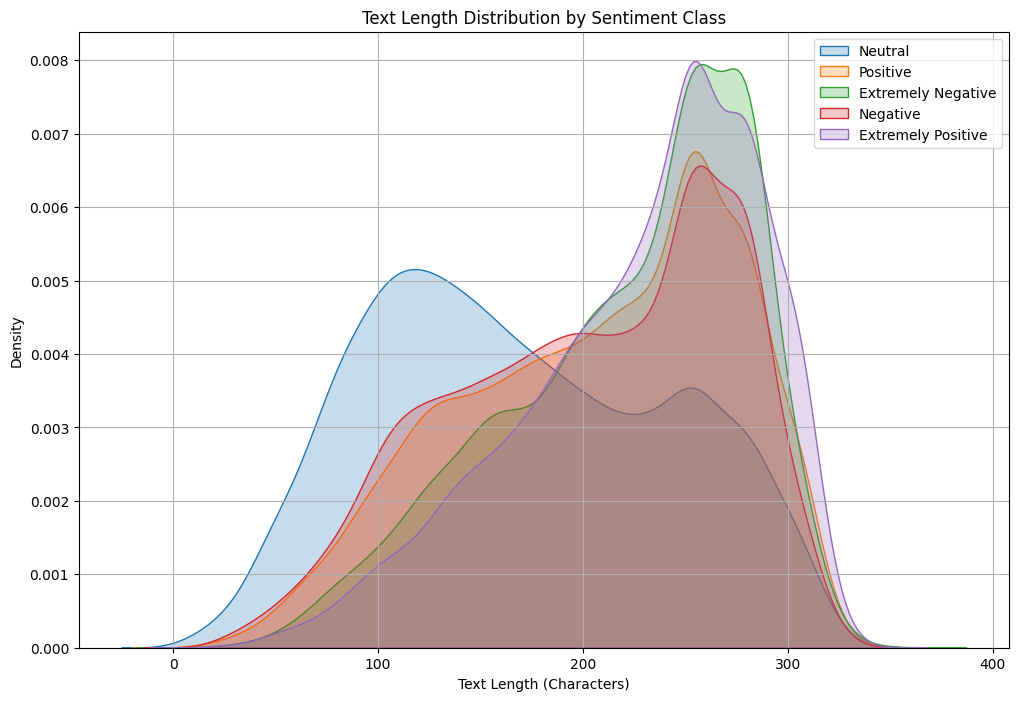

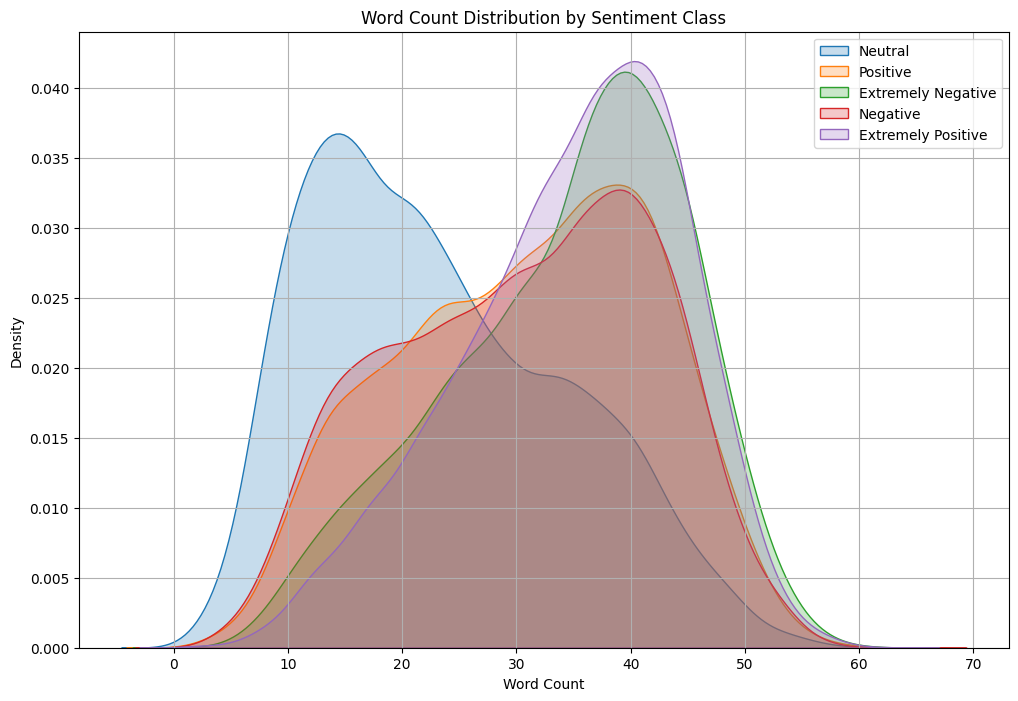

In [10]:

# ====== Sentiment-Based Statistics ======
# Group by sentiment and calculate descriptive statistics
text_length_stats_by_sentiment = df.groupby('sentiment')['text_length'].describe()
word_count_stats_by_sentiment = df.groupby('sentiment')['word_count'].describe()

print("Text Length Statistics by Sentiment:")
display(text_length_stats_by_sentiment)

print("\nWord Count Statistics by Sentiment:")
display(word_count_stats_by_sentiment)

# Visualize text length distribution by sentiment
plt.figure(figsize=(12, 8))
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    sns.kdeplot(subset['text_length'], label=sentiment, fill=True)
plt.title('Text Length Distribution by Sentiment Class')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Visualize word count distribution by sentiment
plt.figure(figsize=(12, 8))
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    sns.kdeplot(subset['word_count'], label=sentiment, fill=True)
plt.title('Word Count Distribution by Sentiment Class')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

✅ Анализ распределения длины текста и количества слов по различным семантическим категориям (сентиментам) выявил следующие ключевые особенности. 

+ Тексты с экстремально положительными и экстремально отрицательными сентиментами, как правило, имеют большую длину по сравнению с нейтральными текстами, что может свидетельствовать о более эмоционально насыщенных или развернутых обсуждениях в этих категориях. 

+ Анализ распределения количества слов по категориям показывает аналогичную тенденцию: нейтральные тексты содержат меньше слов, тогда как более эмоционально окрашенные тексты (как положительные, так и отрицательные) включают большее количество слов. 

+ Визуализация в виде графиков распределения (KDE) подтвердила эти различия, демонстрируя явные смещения в длине текста и количестве слов между категориями. Для точного ответа на вопрос, являются ли эти результаты статистически значимыми, требуется проведение статистических тестов. Мы проводим только разведывательный анализ данных, как раз являющийся предварительным этапом для точного и углубленного исследования.

### 4. Предварительная обработка данных (Preprocessing)

На данном этапе мы планируем выполнить серию операций для приведения текста в унифицированный формат, пригодный для дальнейшего анализа. Ключевые шаги предварительной обработки будут включать:

Удаление пунктуации и специальных символов: Мы уберем все знаки препинания и специальные символы из текста, чтобы минимизировать влияние шума на последующие результаты анализа.

Приведение текста к нижнему регистру: Все слова будут приведены к нижнему регистру, чтобы избежать разделения одинаковых слов, написанных с разным регистром.

Удаление стоп-слов: Мы исключим "стоп-слова" (артикли, предлоги и другие вспомогательные части речи), которые не несут смысловой нагрузки. Это позволит сосредоточиться на значимых словах.

Токенизация: Текст будет разбит на отдельные слова (токены), что облегчит подсчет частоты слов и дальнейший лексический анализ.

Лемматизация: Мы преобразуем слова в их начальные формы (леммы). Лемматизация сгруппирует различные формы одного и того же слова, что повысит точность анализа.

Эти шаги предварительной обработки помогут очистить и структурировать данные, что облегчит их последующий анализ и улучшит качество получаемых результатов.

In [11]:
# Download the stopwords dataset (only need to run once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Define the list of stopwords
stop_words = set(stopwords.words('english'))

# Function for text cleaning and preprocessing
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions, hashtags, numbers, and punctuation
    text = re.sub(r'\@\w+|\#\w+', '', text)  # Mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Punctuation
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print("Sample Cleaned Text Data:")
display(df[['text', 'cleaned_text']].head())

Sample Cleaned Text Data:


text  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                        cleaned_text  
0                                                     
1  advice talk neighbours family exchange phone n...  
2  coronavirus australia woolworths give elderly ...  
3  food stock one empty please dont panic enough ...  
4  ready go supermarket outbreak im paranoid food...

### 5. Анализ частоты слов

#### 5.1 Общий анализ

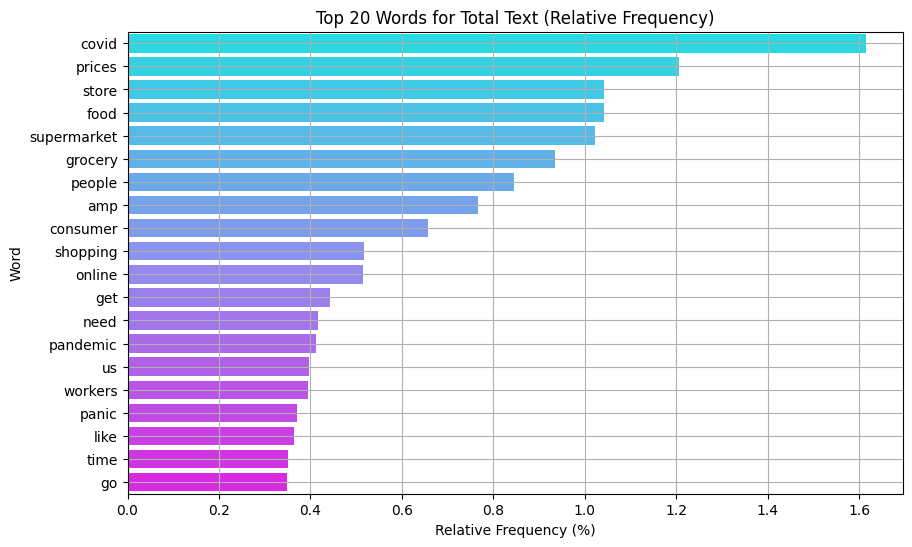

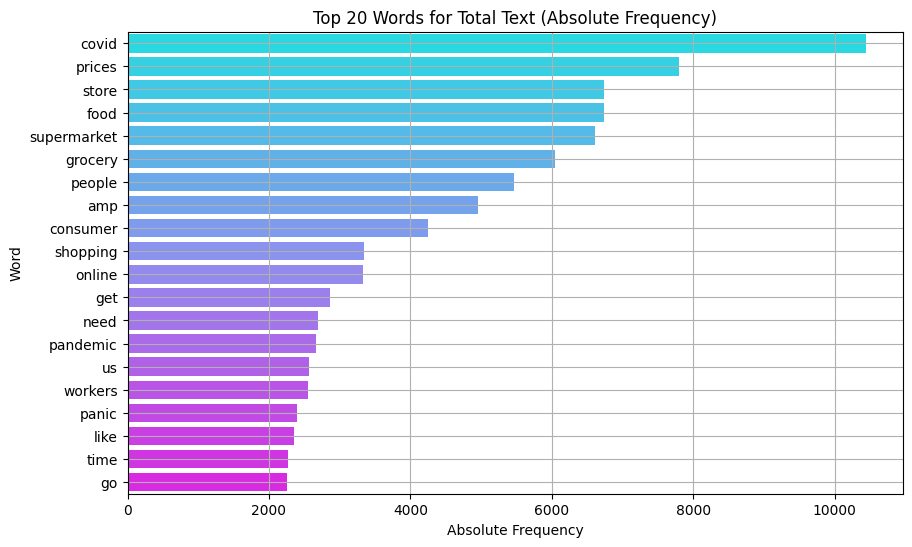

In [12]:
# Calculate word frequencies for the entire dataset (both relative and absolute)
text_data_total = ' '.join(df['cleaned_text'])
word_list_total = text_data_total.split()
word_freq_total = Counter(word_list_total)

# Total words in the entire dataset
total_words = sum(word_freq_total.values())

# Get the top N most common words with both absolute and relative frequencies
top_n = 20
most_common_words_total = [(word, count, (count / total_words) * 100) for word, count in word_freq_total.most_common(top_n)]

# Convert to DataFrame
word_freq_total_df = pd.DataFrame(most_common_words_total, columns=['word', 'absolute_frequency', 'relative_frequency'])

# Plot the top frequent words with both absolute and relative frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='relative_frequency', y='word', data=word_freq_total_df,  hue='word', palette="cool", dodge=False, legend=False)
plt.title(f'Top {top_n} Words for Total Text (Relative Frequency)')
plt.xlabel('Relative Frequency (%)')
plt.ylabel('Word')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='absolute_frequency', y='word', data=word_freq_total_df,  hue='word', palette="cool", dodge=False, legend=False)
plt.title(f'Top {top_n} Words for Total Text (Absolute Frequency)')
plt.xlabel('Absolute Frequency')
plt.ylabel('Word')
plt.grid(True)
plt.show()


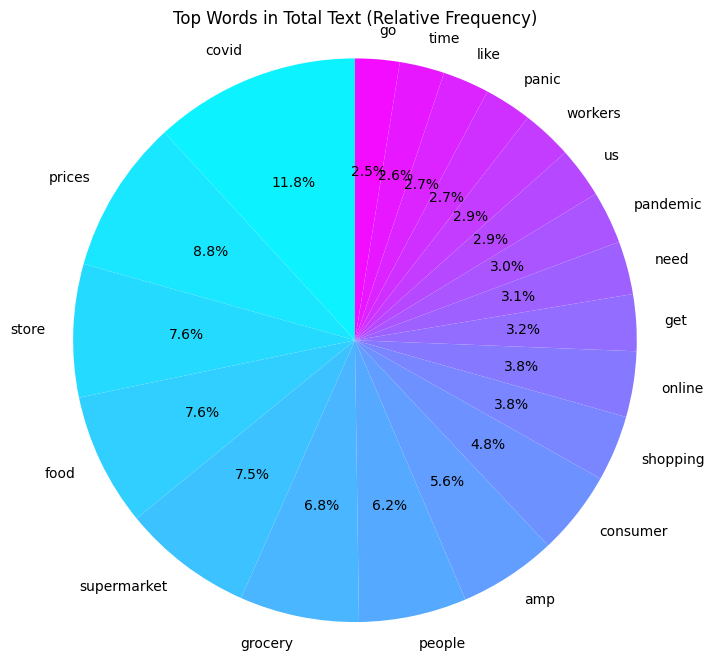

In [13]:
# Function to create pie chart for word frequencies
def create_pie_chart(frequencies, labels, title):
    plt.figure(figsize=(8, 8))
    plt.pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("cool", len(labels)))
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Pie chart for relative frequency in total text
create_pie_chart(word_freq_total_df['relative_frequency'], word_freq_total_df['word'], 'Top Words in Total Text (Relative Frequency)')

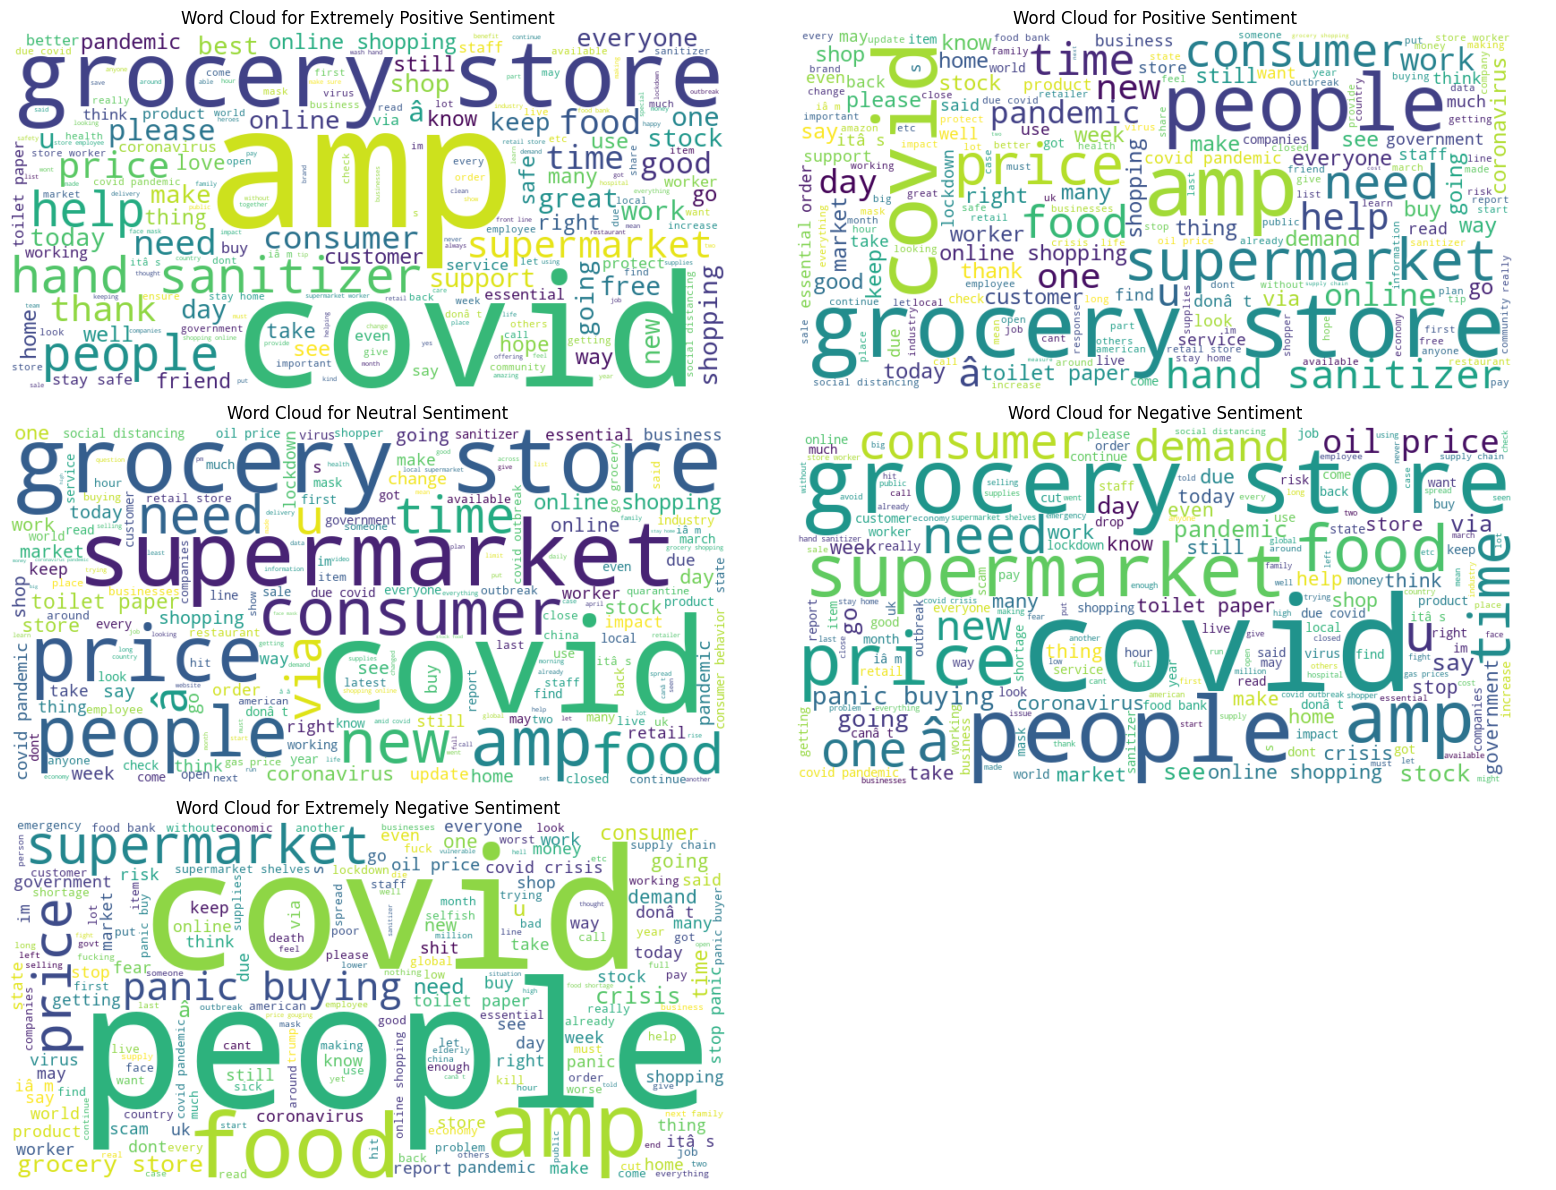

In [14]:
# Function to generate a word cloud for each sentiment
def generate_wordcloud_by_sentiment(sentiment):
    subset = df[df['sentiment'] == sentiment]
    sentiment_text = ' '.join(subset['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    return wordcloud

# Create subplots for word clouds
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# List of sentiments
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

# Plot word clouds for each sentiment
for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    wordcloud = generate_wordcloud_by_sentiment(sentiment)
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Word Cloud for {sentiment} Sentiment')

# Turn off extra subplot
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

#### 📊 Анализ частоты слов в тексте (всего):

- **Наиболее частотные слова**:
  - "covid" 🦠
  - "prices" 💲
  - "store" 🏬
  - "food" 🍽️
  - "supermarket" 🛒
  - "grocery" 🥦

- 🔎 **Частотный анализ слов** выявил ключевые термины, наиболее часто встречающиеся в текстах, связанные с пандемией и повседневной жизнью. Наиболее популярным словом оказалось "covid", что подчеркивает центральную роль пандемии в обсуждениях.
  
- 📊 **Относительная частота** и **абсолютная частота** показали схожие результаты, где наряду с "covid" часто упоминаются такие слова, как "prices" и "store", что указывает на экономические и потребительские аспекты обсуждений.

- 🛒 **Термины, связанные с покупками**, такие как "supermarket", "grocery", "shopping", также занимают значительное место в текстах, что отражает важность тем, связанных с покупками и продуктами питания в период пандемии.

- 😷 **Лексика, относящаяся к пандемии**, включая такие слова, как "amp", "consumer", "online", также оказалась распространенной, что подчеркивает важность цифровых технологий и потребительского поведения в условиях ограничений.

- 🗣 **Эмоциональная окраска** некоторых часто используемых слов указывает на смесь нейтральных и тревожных тем, таких как "panic" и "need", что демонстрирует баланс между информативными и эмоциональными реакциями в текстах.

- **Основные выводы**:
  1. Слова, связанные с пандемией (например, "covid" 🦠), ценами и магазинами, доминируют в тексте.
  2. Темы, затрагивающие **цены** и **питание**, оказываются наиболее обсуждаемыми.
  
- **Важные наблюдения**:
  - Эти слова встречаются как в **абсолютных** 📈, так и в **относительных** 📊 значениях с наибольшей частотой.
  - Темы, связанные с **продуктами питания** и **пандемией**, явно имеют значительное влияние на обсуждения.

- **Заключение**:
  Эти темы могут оказать ключевое влияние на дальнейший анализ тональности текстов, так как они наиболее часто обсуждаются в контексте рассматриваемых данных.
  
💡 Таким образом, проведенный частотный анализ позволяет выделить основные темы, связанные с пандемией COVID-19, экономикой и потребительским поведением, а также эмоциональные реакции пользователей на происходящие события.


#### 5.2 По семантическим категориям

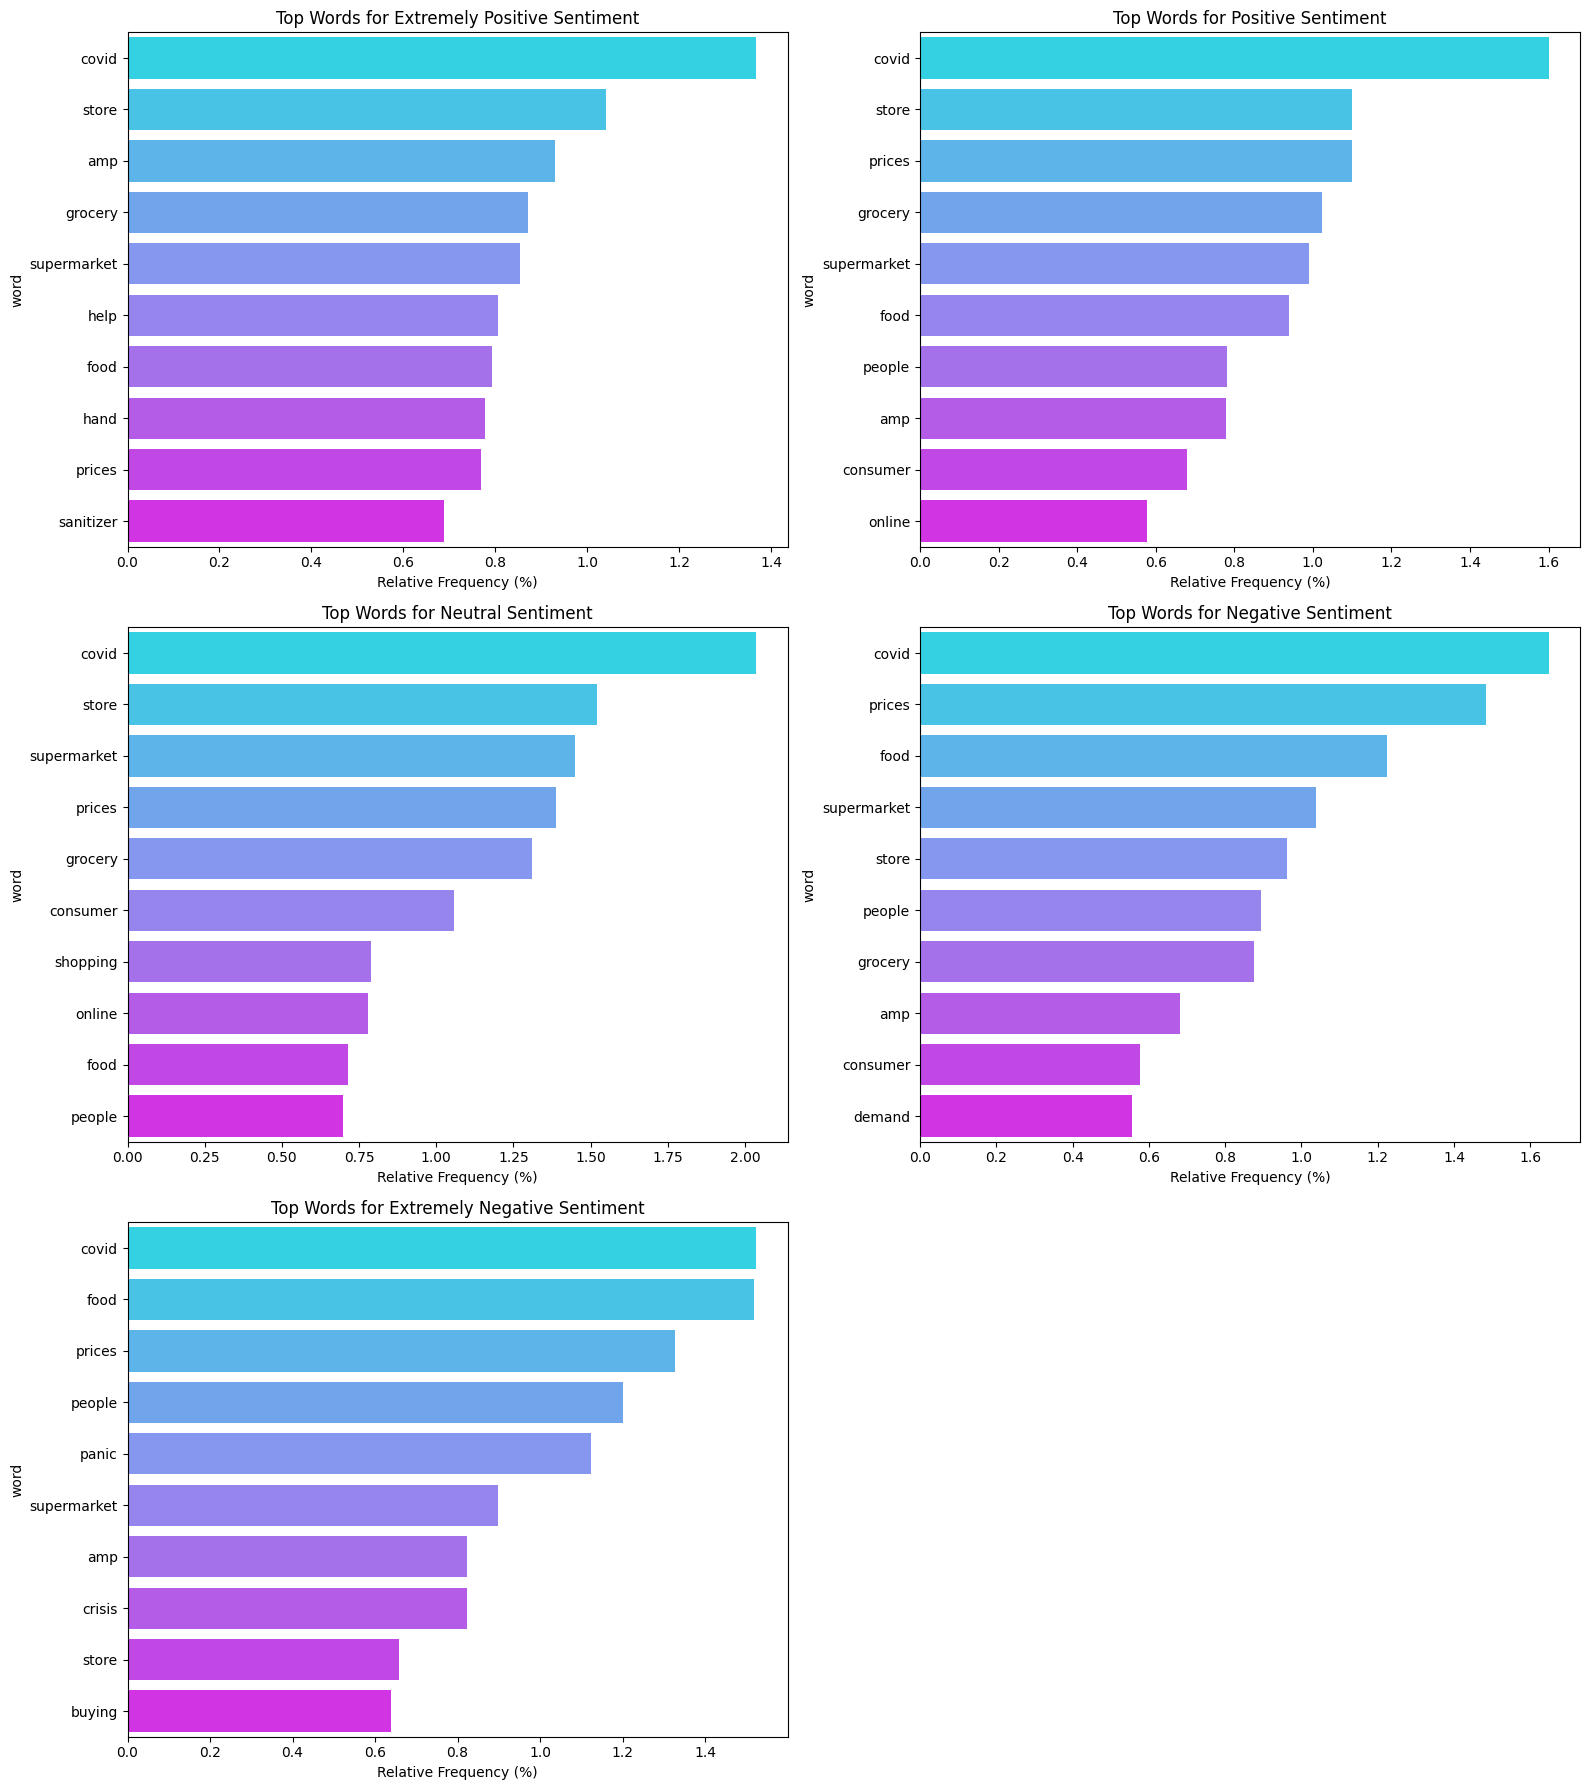

In [15]:
# Function to calculate top words and their relative frequencies by sentiment category
def top_words_by_sentiment(sentiment, top_n=10):
    subset = df[df['sentiment'] == sentiment]
    text_data = ' '.join(subset['cleaned_text'])
    
    # Calculate word frequencies
    word_list = text_data.split()
    word_freq = Counter(word_list)
    
    # Total words in this sentiment category
    total_words = sum(word_freq.values())
    
    # Get the top N most common words and their relative frequencies
    most_common_words = [(word, count, (count / total_words) * 100) for word, count in word_freq.most_common(top_n)]
    
    # Convert to DataFrame
    return pd.DataFrame(most_common_words, columns=['word', 'count', 'relative_frequency'])

# Prepare top frequent words for all sentiment categories
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']
top_words_by_category = {}

for sentiment in sentiments:
    top_words_by_category[sentiment] = top_words_by_sentiment(sentiment)

# Plot the top frequent words for all categories in a boxplot layout
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    sns.barplot(x='relative_frequency', y='word', data=top_words_by_category[sentiment], ax=axes[row, col], hue='word', palette="cool", dodge=False, legend=False)
    axes[row, col].set_title(f'Top Words for {sentiment} Sentiment')
    axes[row, col].set_xlabel('Relative Frequency (%)')

# Turn off extra subplot
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()


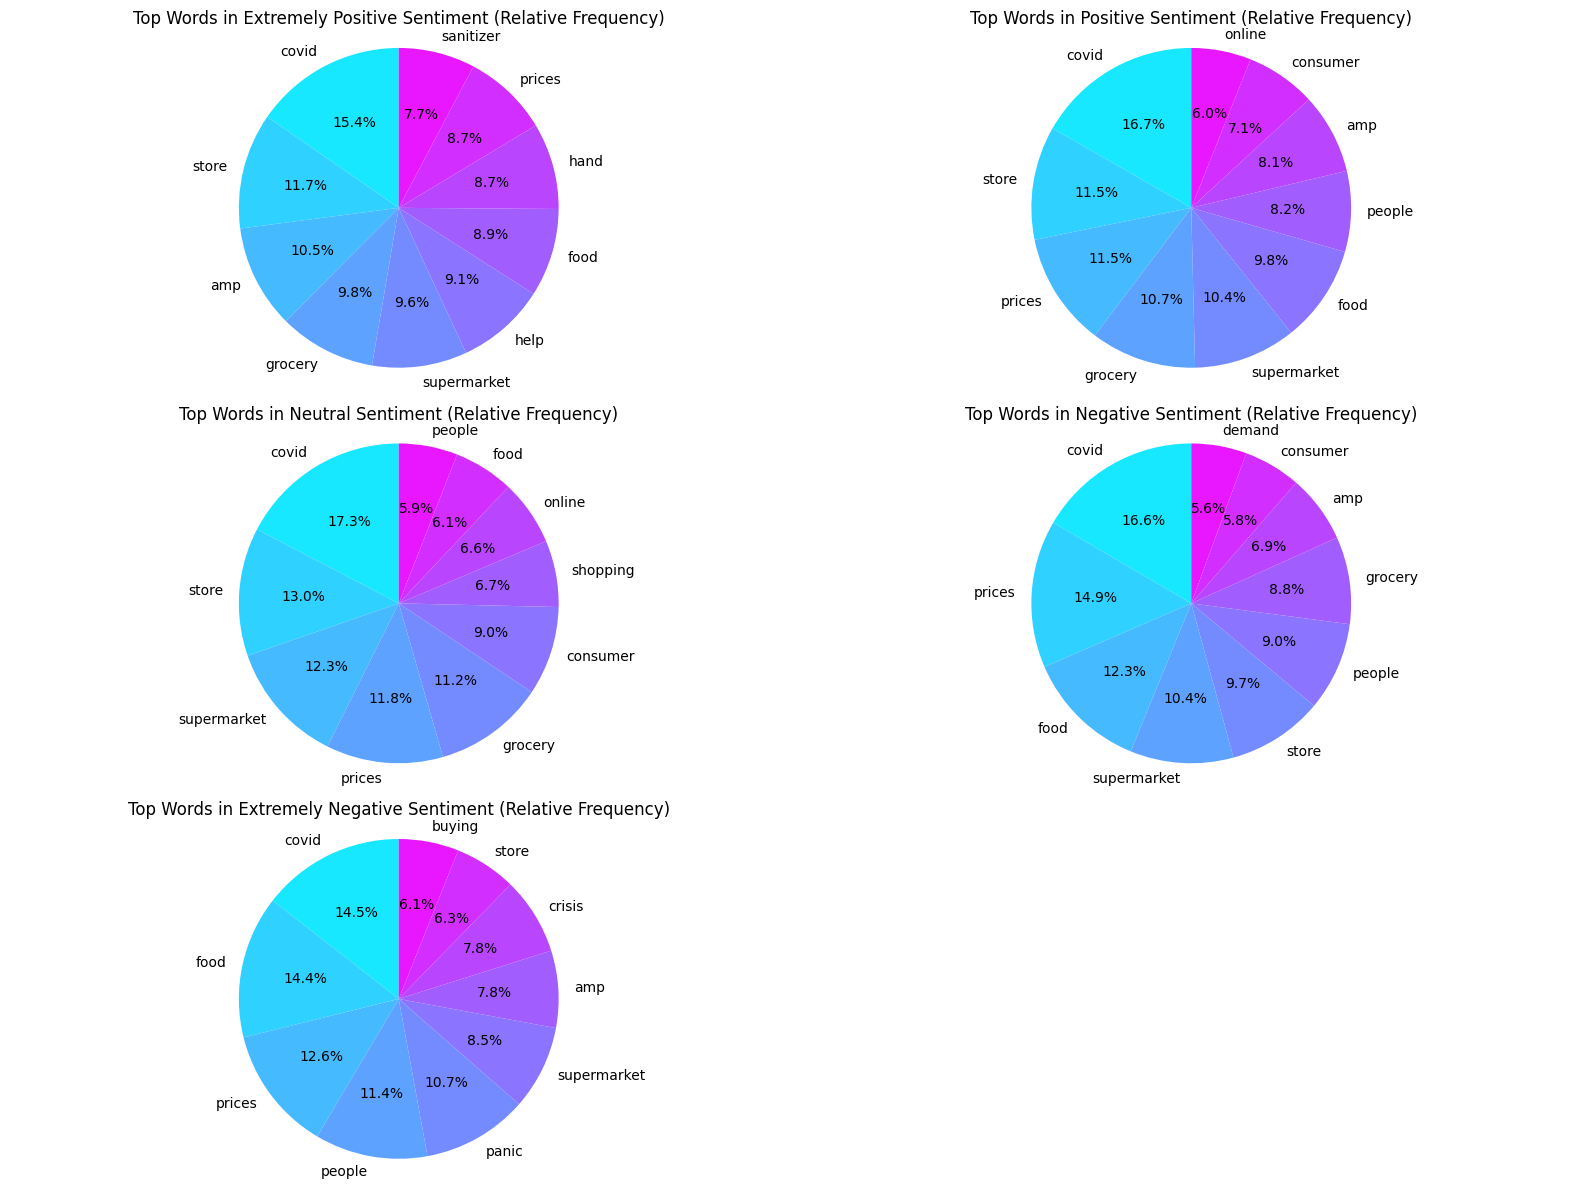

In [16]:
# Function to create pie charts for each sentiment category
def create_pie_chart_subplot(axes, row, col, frequencies, labels, title):
    axes[row, col].pie(frequencies, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("cool", len(labels)))
    axes[row, col].set_title(title)
    axes[row, col].axis('equal')

# Create subplots for pie charts
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# List of sentiments
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

# Generate pie charts for each sentiment category
for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    create_pie_chart_subplot(
        axes, 
        row, 
        col, 
        top_words_by_category[sentiment]['relative_frequency'], 
        top_words_by_category[sentiment]['word'], 
        f'Top Words in {sentiment} Sentiment (Relative Frequency)'
    )

# Turn off extra subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#### 📊 5.2: Анализ частоты слов по семантическим категориям

- 🌟 **Анализ чрезвычайно позитивных текстов**:
  - Наиболее частотные слова: **"covid"**, **"store"**, **"amp"**, **"grocery"**, **"supermarket"**, **"help"**.
  - Эти тексты часто касаются тем, связанных с продуктами питания, магазинами и пандемией.
  - Отражают оптимизм в преодолении трудностей, вызванных пандемией.

- 😊 **Позитивные тексты**:
  - Ключевые слова: **"covid"**, **"store"**, **"prices"**, **"grocery"**.
  - Фокусируются на аспектах удовлетворенности потребителей и благополучия.

- 😐 **Нейтральные тексты**:
  - Основные слова: **"covid"**, **"store"**, **"supermarket"**, **"prices"**.
  - Включают также такие термины, как **"shopping"** и **"online"**, указывая на информативное и нейтральное описание событий.

- 😟 **Негативные тексты**:
  - Чаще всего встречаются: **"covid"**, **"prices"**, **"food"**, **"supermarket"**, **"people"**.
  - Эти тексты акцентируют внимание на беспокойствах по поводу цен, покупок и пандемии.

- 🔴 **Чрезвычайно негативные тексты**:
  - Основные слова: **"covid"**, **"food"**, **"prices"**, **"people"**, **"panic"**.
  - Отражают кризисные аспекты пандемии: дефицит товаров, повышение цен, паника.

💡 **Вывод**:
- Анализ частоты слов по категориям выявил ключевые термины, связанные с пандемией COVID-19, продуктами питания и покупками. 
- Различия в частоте и контексте использования этих слов позволяют выделить разные эмоциональные окраски, от оптимистичных до кризисных. 😊➡️😟


#### 5.3 Исследование наиболее характерных слов при помощи метрики tf-idf

#### 5.3.1 Общий анализ

C:\Users\master\AppData\Local\Temp\ipykernel_48136\55262083.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_tfidf_avg.values, y=word_tfidf_avg.index, palette="cool")


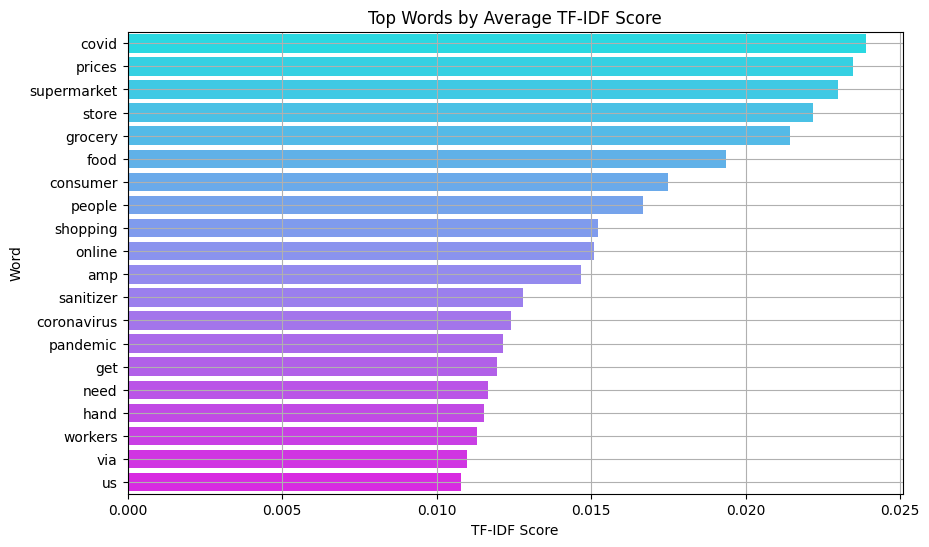

In [66]:
# Function to calculate Term Frequency (TF)
def compute_tf(word_dict, total_words):
    tf_dict = {}
    for word, count in word_dict.items():
        tf_dict[word] = count / total_words
    return tf_dict

# Function to calculate Inverse Document Frequency (IDF)
def compute_idf(documents):
    N = len(documents)
    idf_dict = {}
    all_words = set([word for doc in documents for word in doc])
    
    for word in all_words:
        containing_docs = sum([1 for doc in documents if word in doc])
        idf_dict[word] = math.log(N / (1 + containing_docs))  # Smoothing added
    return idf_dict

# Function to calculate TF-IDF using numpy for efficiency
def compute_tfidf(tf_dict, idf_dict):
    tfidf_dict = {}
    for word, tf_val in tf_dict.items():
        tfidf_dict[word] = tf_val * idf_dict.get(word, 0)
    return tfidf_dict

# Convert cleaned text data into list of lists (each document as list of words)
documents = [text.split() for text in df['cleaned_text']]

# Step 1: Calculate TF for each document using numpy arrays for faster computation
tf_list = []
for doc in documents:
    word_count = len(doc)
    word_freq = Counter(doc)
    tf = compute_tf(word_freq, word_count)
    tf_list.append(tf)

# Step 2: Calculate IDF for the entire corpus
idf_dict = compute_idf(documents)

# Step 3: Precompute the TF-IDF scores using numpy for speedup
word_tfidf_matrix = []
all_words = list(idf_dict.keys())

for tf_dict in tf_list:
    tfidf = compute_tfidf(tf_dict, idf_dict)
    word_tfidf_matrix.append([tfidf.get(word, 0) for word in all_words])

# Convert the TF-IDF matrix to a numpy array for faster operations
tfidf_matrix_np = np.array(word_tfidf_matrix)

# Step 4: Average the TF-IDF scores across all documents
average_tfidf = tfidf_matrix_np.mean(axis=0)
word_tfidf_avg = pd.Series(average_tfidf, index=all_words).sort_values(ascending=False).head(20)

# Step 5: Visualize the top words based on their average TF-IDF scores
plt.figure(figsize=(10, 6))
sns.barplot(x=word_tfidf_avg.values, y=word_tfidf_avg.index, palette="cool", hue=word_tfidf_avg.index)
plt.title('Top Words by Average TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.grid(True)
plt.show()


#### 5.3.2 По семантическим катеориям

In [18]:
from multiprocessing import Pool

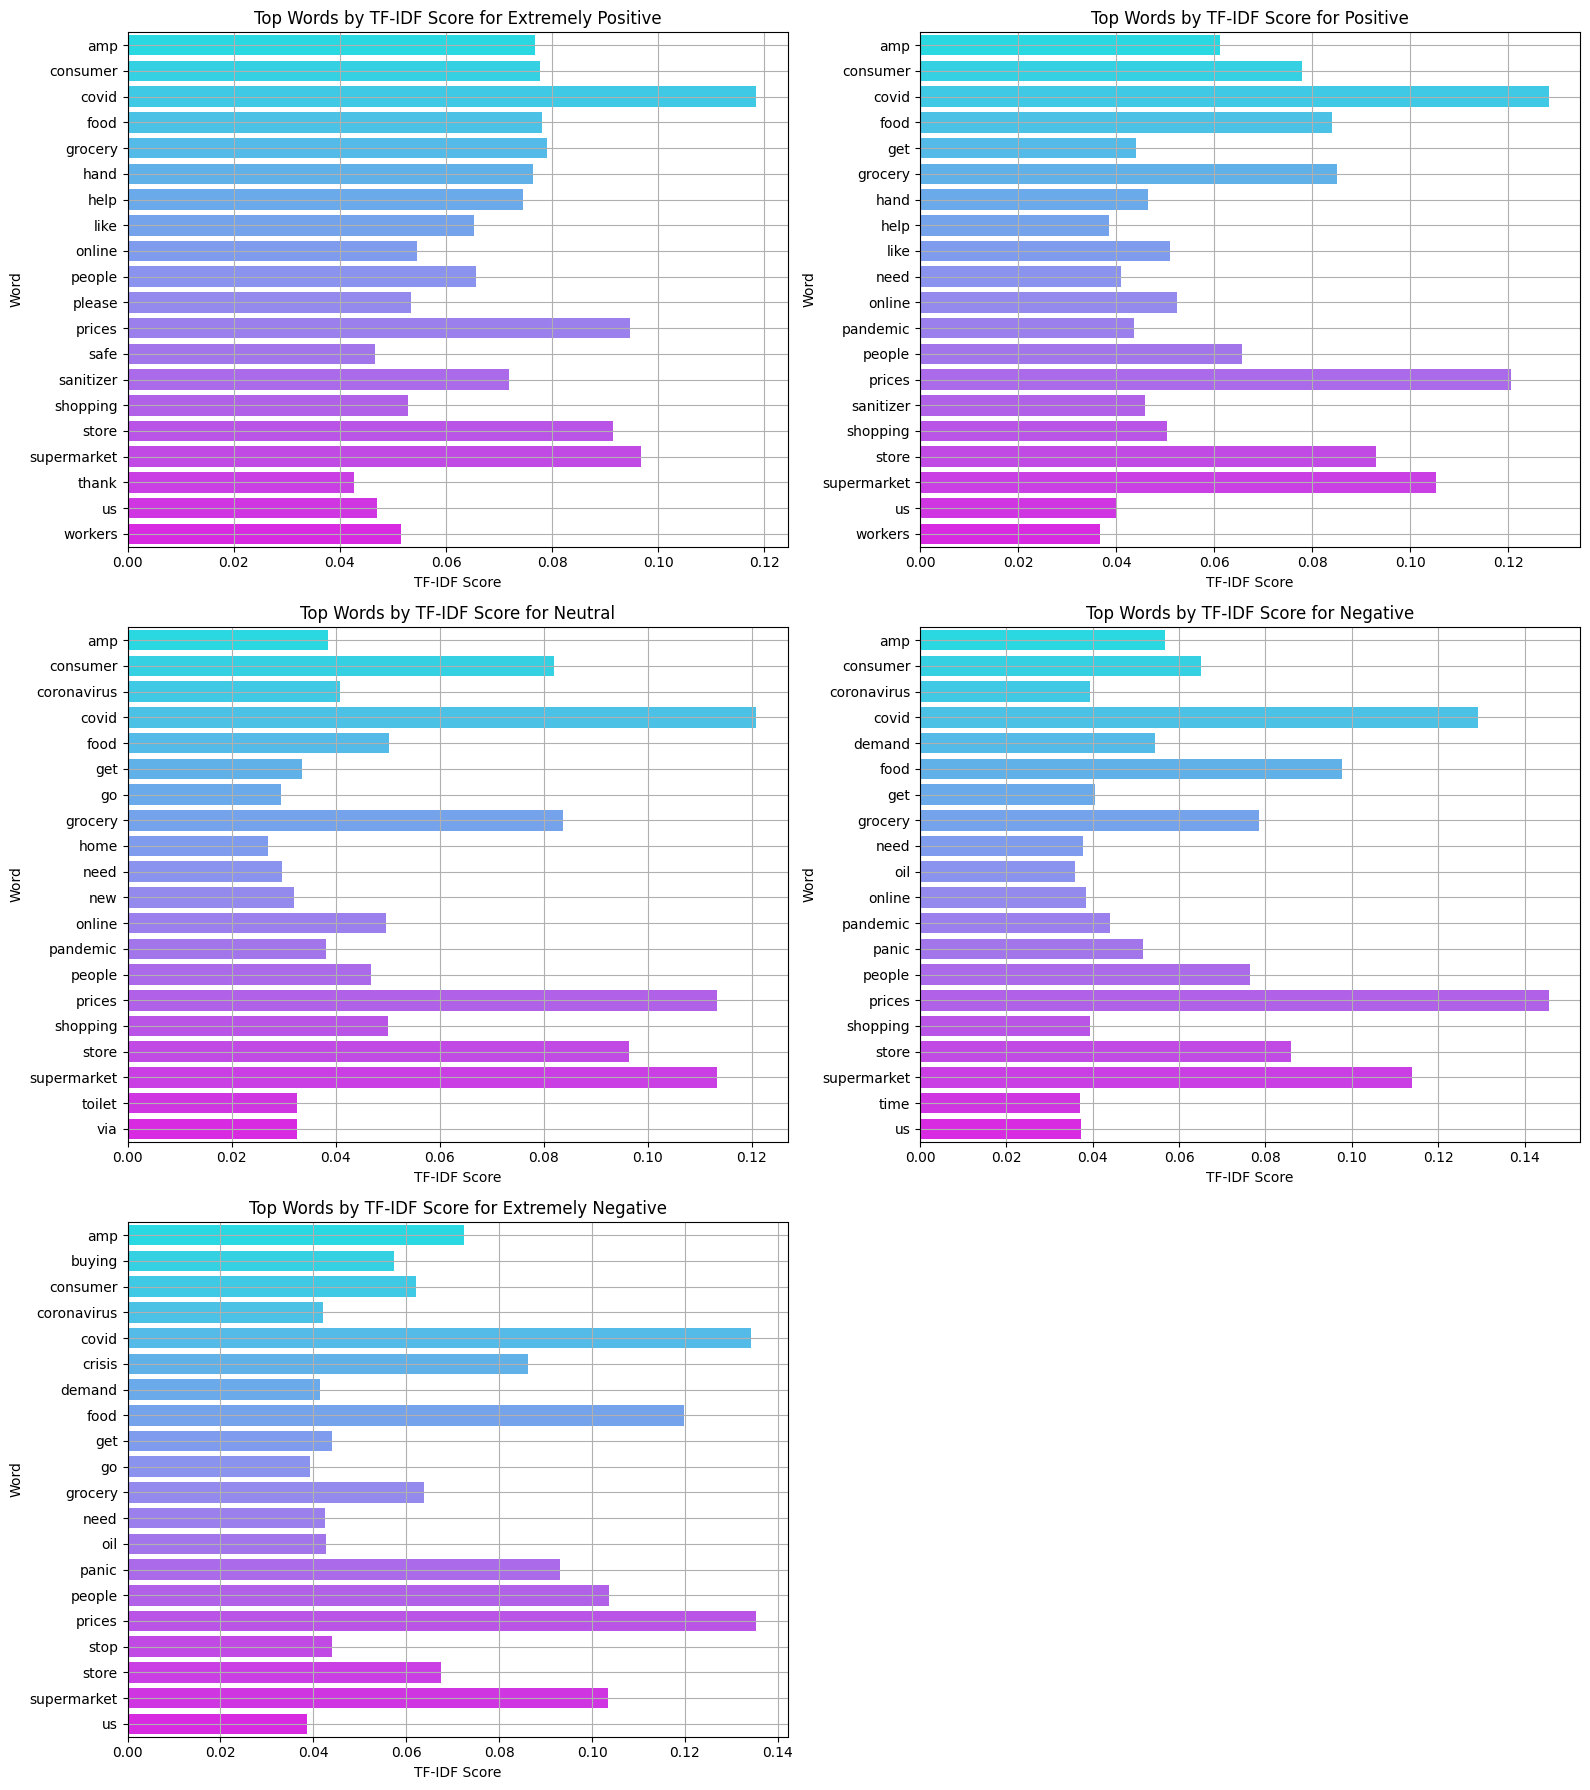

In [18]:
# Function to calculate TF-IDF for a specific sentiment category
def calculate_tfidf_for_sentiment_parallel(sentiment, idf_dict, all_words):
    subset = df[df['sentiment'] == sentiment]['cleaned_text']
    documents = [text.split() for text in subset]
    
    tf_list = []
    for doc in documents:
        word_count = len(doc)
        word_freq = Counter(doc)
        tf = compute_tf(word_freq, word_count)
        tf_list.append(tf)

    # Calculate TF-IDF for the sentiment
    word_tfidf_matrix = []
    for tf_dict in tf_list:
        tfidf = compute_tfidf(tf_dict, idf_dict)
        word_tfidf_matrix.append([tfidf.get(word, 0) for word in all_words])
    
    # Convert to numpy array and return average TF-IDF scores
    tfidf_matrix_np = np.array(word_tfidf_matrix)
    average_tfidf = tfidf_matrix_np.mean(axis=0)
    return pd.DataFrame({'word': all_words, 'tfidf_score': average_tfidf}).sort_values(by='tfidf_score', ascending=False).head(20)

# The previous steps and another required functions are defined from the previous cell containing step 5.3.1

# Step 4: List of sentiments for analysis
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

# Step 5: Calculate TF-IDF for each sentiment using multiprocessing
def process_sentiment(sentiment):
    return calculate_tfidf_for_sentiment_parallel(sentiment, idf_dict, all_words)

# Step 6: Parallelize the TF-IDF calculation across all sentiment categories
with Pool(len(sentiments)) as pool:
    tfidf_by_sentiment = pool.map(process_sentiment, sentiments)

# Step 7: Visualize the top words by TF-IDF score for each sentiment
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Loop over each sentiment to plot TF-IDF scores
for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    tfidf_df_sentiment = tfidf_by_sentiment[i]
    
    sns.barplot(x='tfidf_score', y='word', hue='word', data=tfidf_df_sentiment, ax=axes[row, col], palette="cool", dodge=False, legend=False)
    axes[row, col].set_title(f'Top Words by TF-IDF Score for {sentiment}')
    axes[row, col].set_xlabel('TF-IDF Score')
    axes[row, col].set_ylabel('Word')
    axes[row, col].grid(True)

# Turn off the extra empty subplot (bottom-right corner)
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### 📊 Заключение по шагу 5.3: Анализ частоты слов на основе TF-IDF (коэффициент терм частоты - обратной частоты документа)

### Основные моменты:

- **COVID-19** 📈 - наивысший TF-IDF балл был зафиксирован для термина "covid" в текстах по всем категориям тональности, что подчеркивает его значимость в обсуждениях 🦠.
- **Экономика и цены** 💰 - слова "prices" и "store" занимают высокие позиции, что указывает на значительное количество разговоров, связанных с ценами и экономическими последствиями.
- **Продукты питания и ритейл** 🛒 - ключевые слова "supermarket", "grocery", и "food" свидетельствуют о том, что пользователи активно обсуждают темы, связанные с покупками и продовольствием.
- **Повседневная жизнь** 🏠 - слова "people", "online", "get", "need" выделяются как важные для отражения изменений в образе жизни и повседневных потребностях в условиях пандемии.

### Распределение TF-IDF по категориям тональности:

- **Экстремально позитивная** 😊 - ключевые слова включают "amp", "grocery", и "sanitizer". Это подчеркивает акцент на поддержке, помощи и мерах безопасности.
- **Позитивная** 😃 - высокие TF-IDF баллы наблюдаются для слов "covid", "store", и "prices", что отражает позитивное обсуждение вызовов пандемии и экономических условий.
- **Нейтральная** 😐 - в нейтральных текстах доминируют термины "supermarket", "shopping", и "consumer", что подчеркивает важность логистики и покупок.
- **Негативная** 😟 - слова "prices", "food", и "demand" выделяются, подчеркивая обеспокоенность по поводу экономических аспектов.
- **Экстремально негативная** 😡 - доминируют слова "panic", "prices", и "crisis", отражающие общественную напряженность и беспокойство в разгар пандемии.

### Общие выводы:

💡 Анализ TF-IDF позволил выделить ключевые слова и темы, характерные для каждой категории тональности. Высокие баллы TF-IDF указывают на значимость тех или иных терминов в текстах, связанных с пандемией, экономикой и социальными изменениями. Тексты, относящиеся к различным тональностям, показывают, как изменились приоритеты и фокус внимания пользователей в контексте обсуждений COVID-19.


### 6. Анализ биграмм

Загрузка библиотек и импорт модулей

In [19]:
import nltk

In [18]:
# Download necessary resources from NLTK

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### 6.1 Общий анализ

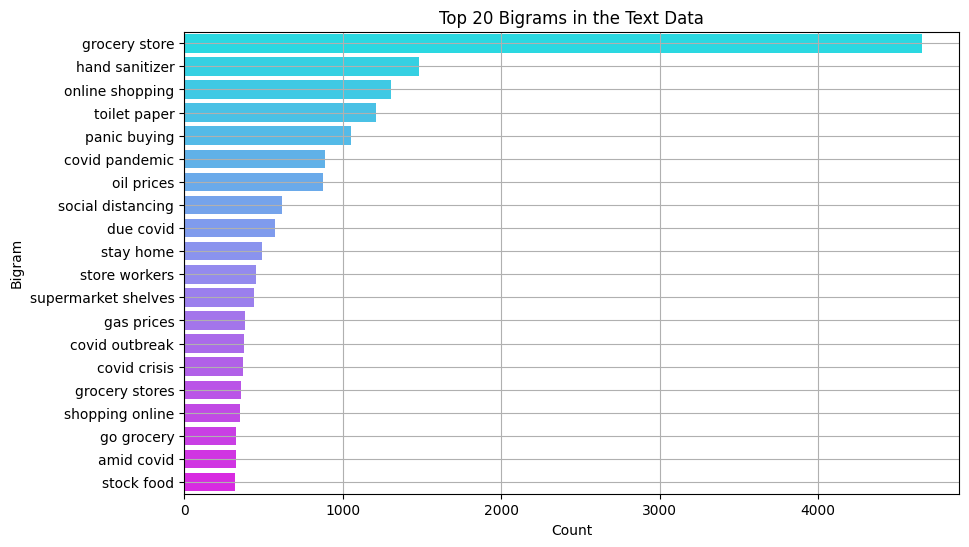

In [22]:
# Step 1: Tokenize the text data
def get_bigrams(text):
    tokens = nltk.word_tokenize(text)
    bigrams = list(nltk.bigrams(tokens))
    return bigrams

# Step 2: Create bigrams for the entire dataset
all_bigrams = []
for text in df['cleaned_text']:
    all_bigrams.extend(get_bigrams(text))

# Step 3: Count the most common bigrams
bigram_counts = Counter(all_bigrams)

# Step 4: Get the top 20 most common bigrams
top_bigrams = bigram_counts.most_common(20)

# Convert the bigrams into a DataFrame for easier plotting
bigram_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Step 5: Visualize the top bigrams, fixing the warning by setting 'hue' and disabling the legend
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y=[f'{b[0]} {b[1]}' for b in bigram_df['bigram']], hue=[f'{b[0]} {b[1]}' for b in bigram_df['bigram']], data=bigram_df, palette="cool", dodge=False, legend=False)
plt.title('Top 20 Bigrams in the Text Data')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.grid(True)
plt.show()

#### 6.2 По семантически категориям

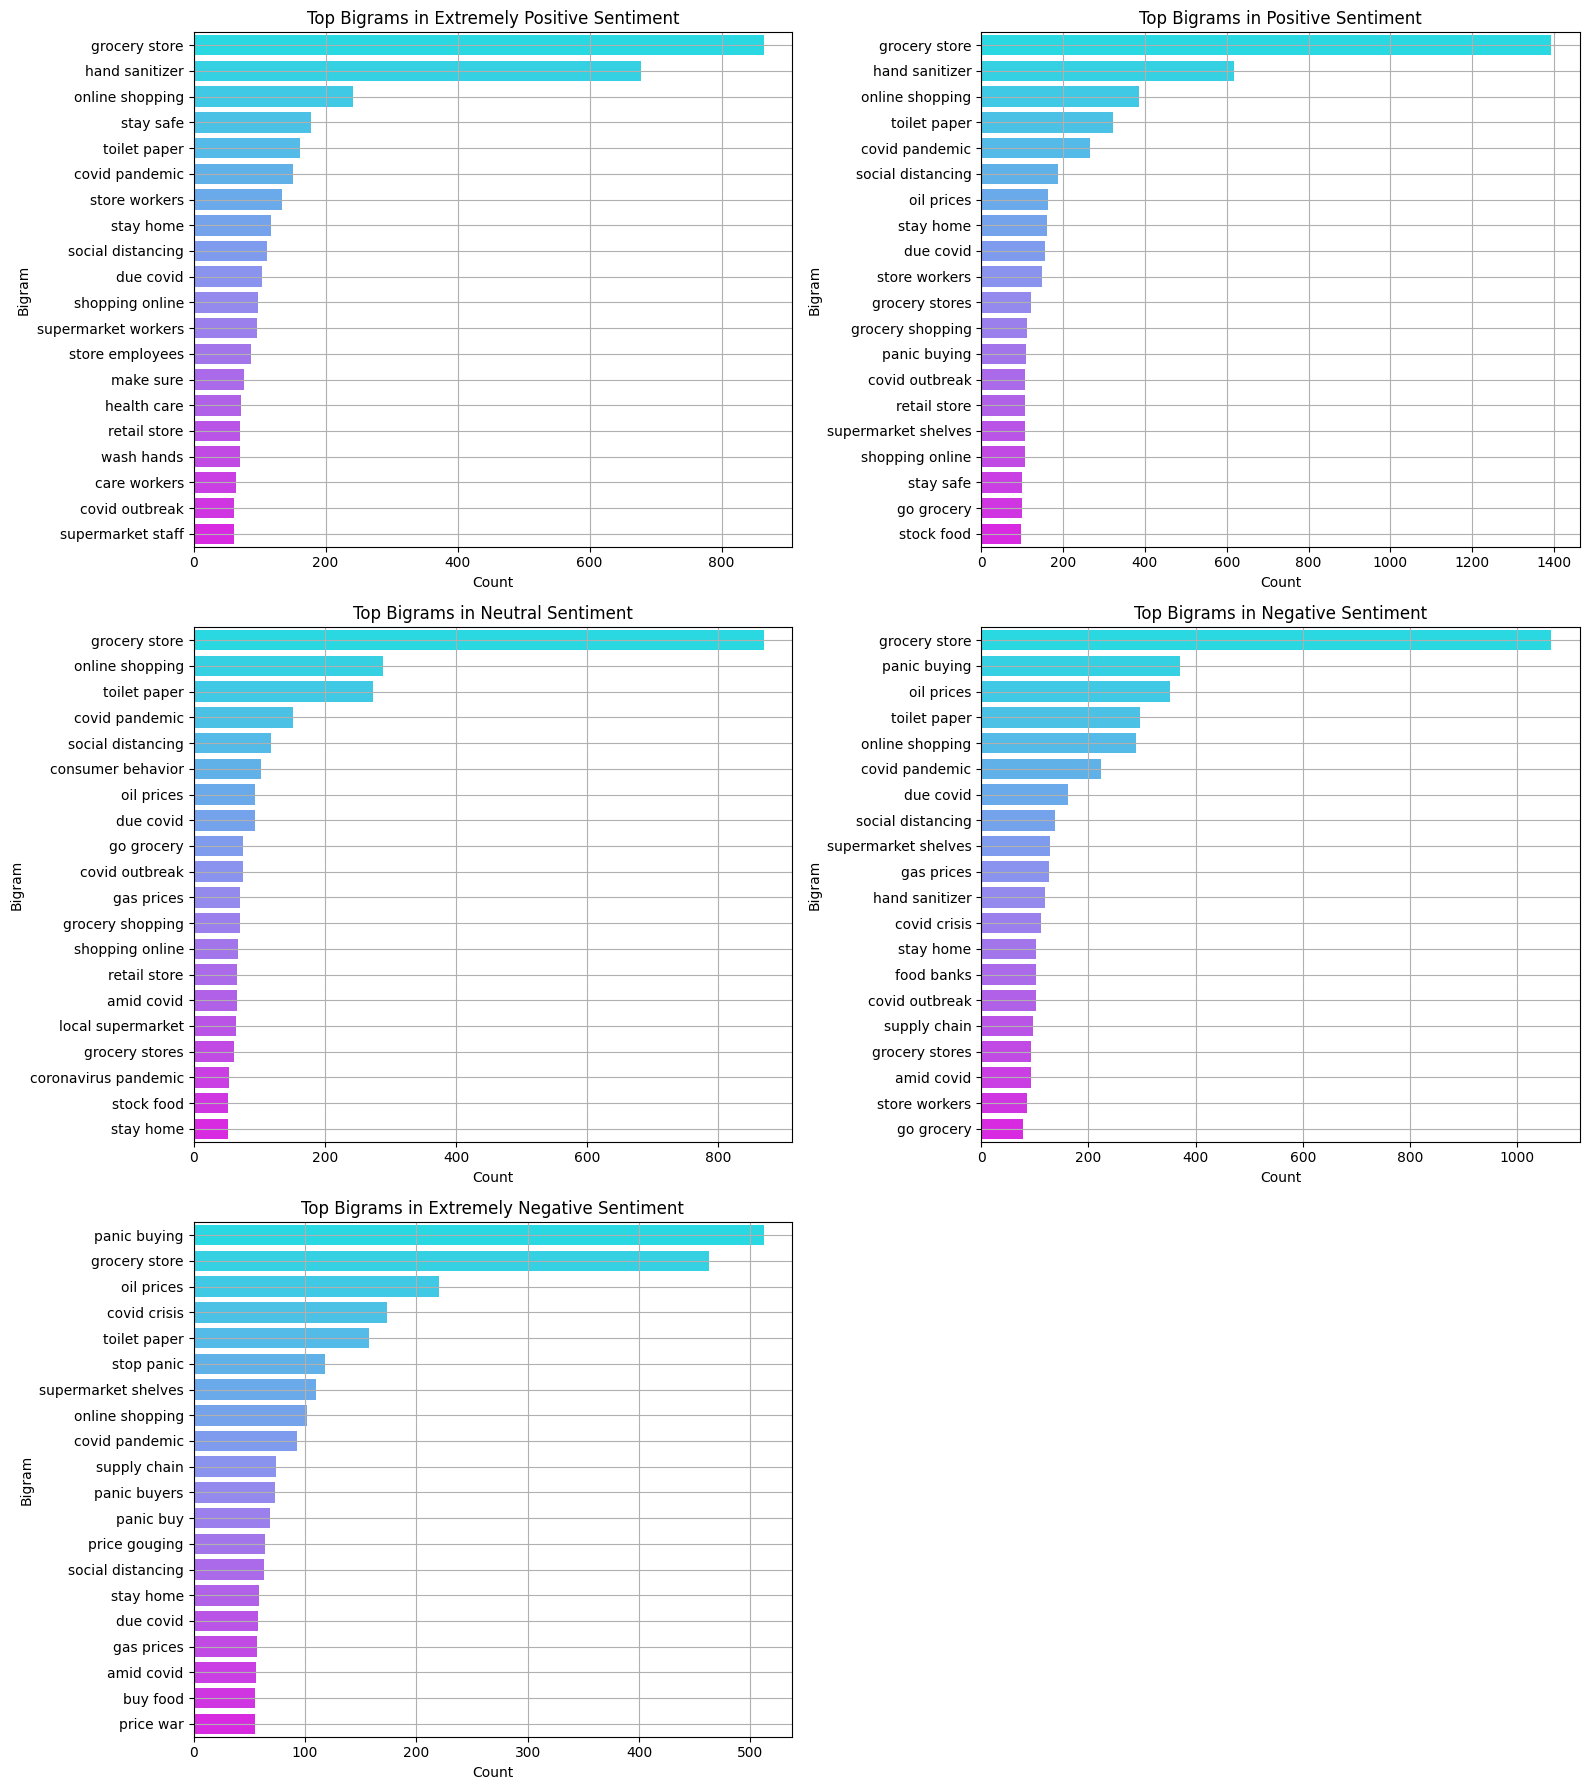

In [23]:
# Step 1: Tokenize the text data
def get_bigrams(text):
    tokens = nltk.word_tokenize(text)
    bigrams = list(nltk.bigrams(tokens))
    return bigrams

# Function to calculate bigrams for each sentiment
def calculate_bigrams_for_sentiment(sentiment):
    subset = df[df['sentiment'] == sentiment]['cleaned_text']
    
    # Create bigrams for the sentiment-specific text
    sentiment_bigrams = []
    for text in subset:
        sentiment_bigrams.extend(get_bigrams(text))
    
    # Count the most common bigrams
    sentiment_bigram_counts = Counter(sentiment_bigrams)
    
    # Get the top 20 most common bigrams
    top_bigrams_sentiment = sentiment_bigram_counts.most_common(20)
    
    # Convert the bigrams into a DataFrame for easier plotting
    bigram_df_sentiment = pd.DataFrame(top_bigrams_sentiment, columns=['bigram', 'count'])
    return bigram_df_sentiment

# List of sentiments
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

# Prepare a subplot with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Loop over each sentiment to calculate and plot bigrams
for i, sentiment in enumerate(sentiments):
    row = i // 2
    col = i % 2
    bigram_df_sentiment = calculate_bigrams_for_sentiment(sentiment)
    
    # Fix the warning by assigning 'hue' and disabling the legend
    sns.barplot(
        x='count', 
        y=[f'{b[0]} {b[1]}' for b in bigram_df_sentiment['bigram']], 
        hue=[f'{b[0]} {b[1]}' for b in bigram_df_sentiment['bigram']], 
        data=bigram_df_sentiment, 
        ax=axes[row, col], 
        palette="cool", 
        dodge=False, 
        legend=False
    )
    axes[row, col].set_title(f'Top Bigrams in {sentiment} Sentiment')
    axes[row, col].set_xlabel('Count')
    axes[row, col].set_ylabel('Bigram')
    axes[row, col].grid(True)

# Turn off the extra empty subplot (bottom-right corner)
axes[2, 1].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


#### 📊 **Результаты анализа биграмм**

- **Основные биграммы в общем тексте**:
  - 📈 **Лидеры**: биграммы **"grocery store"** и **"hand sanitizer"** встречаются наиболее часто. Это свидетельствует о важности этих тем в анализируемом корпусе.
  - **Другие частотные биграммы**: **"online shopping"**, **"toilet paper"**, **"panic buying"** также демонстрируют высокую частоту, отражая значимость тем, связанных с пандемией.

- **Анализ по категориям сентимента**:
  - 😄 **Экстремально позитивный сентимент**:
    - Популярные биграммы: **"grocery store"**, **"hand sanitizer"**, **"stay safe"**, что показывает положительное восприятие безопасности и мер по защите здоровья.
  - 🙂 **Позитивный сентимент**:
    - Включает такие биграммы, как **"grocery store"**, **"hand sanitizer"**, **"online shopping"**, что подчеркивает поддержку ключевых аспектов общественной жизни.
  - 😐 **Нейтральный сентимент**:
    - В нейтральных текстах лидируют биграммы **"grocery store"**, **"toilet paper"**, **"covid pandemic"**, что отражает нейтральное отношение к повседневным заботам.
  - 😟 **Негативный сентимент**:
    - **"panic buying"**, **"grocery store"**, **"oil prices"** являются важными темами, указывающими на проблемы, вызывающие беспокойство.
  - 😠 **Экстремально негативный сентимент**:
    - В текстах с негативной окраской доминируют такие биграммы, как **"panic buying"**, **"grocery store"**, **"covid crisis"**, подчеркивающие глубокое недовольство и страх.

- **Общие выводы**:
  - 😊 **Поддержка и безопасность** доминируют в позитивных и экстремально позитивных текстах.
  - 😨 **Страх и кризис** преобладают в негативных и экстремально негативных обсуждениях, что ясно показывает эмоциональную реакцию на сложные ситуации.


### 7. Связь длины текста и количества слов в тексте с его эмоциональной окраской.

### 7.1 Длина текста

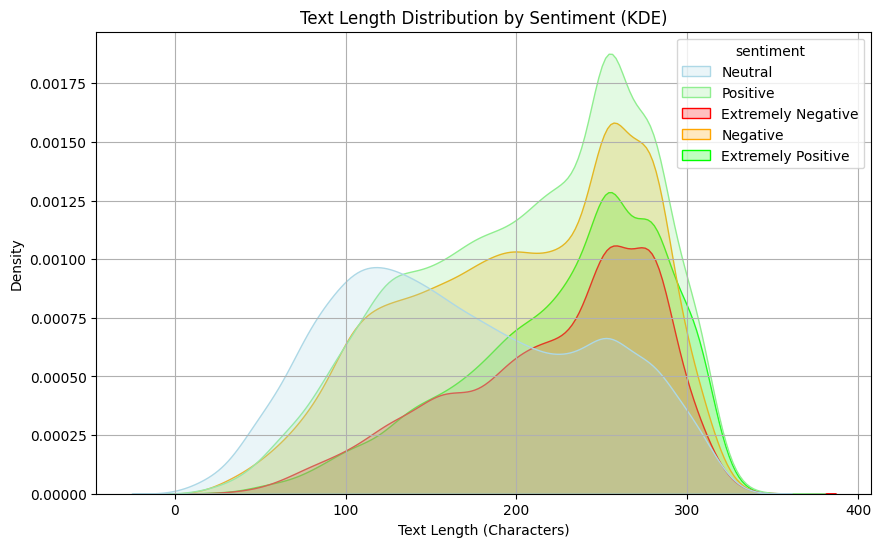

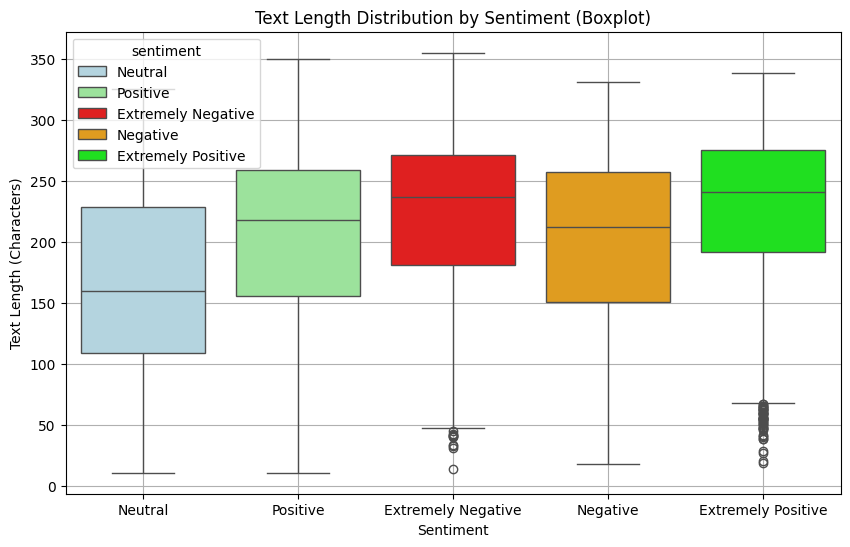

In [24]:
custom_palette = {
    'Extremely Positive': '#00FF00',  # Saturated Green
    'Positive': '#90EE90',            # Light Green
    'Neutral': '#ADD8E6',             # Light Blue
    'Negative': '#FFA500',            # Orange
    'Extremely Negative': '#FF0000'   # Red
}

# Step 1: KDE plot for text length distribution by sentiment with custom palette
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='text_length', hue='sentiment', palette=custom_palette, fill=True)
plt.title('Text Length Distribution by Sentiment (KDE)')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Step 2: Boxplot for text length distribution by sentiment with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', hue='sentiment',  data=df, palette=custom_palette)
plt.title('Text Length Distribution by Sentiment (Boxplot)')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (Characters)')
plt.grid(True)
plt.show()

#### # 📊 7.1. Длина текста и семантика:

- 📈 **Исследование распределения длины текста по категориям сентимента показало**, что экстремально положительные и экстремально негативные тексты имеют наибольшую среднюю длину (примерно 250-300 символов).
- 💬 **Положительные и негативные тексты** также демонстрируют высокие показатели, однако, в среднем, их длина немного ниже, чем у экстремальных категорий.
- 📉 **Нейтральные тексты** оказываются наименее длинными среди всех категорий сентимента, что может свидетельствовать о более сдержанном или кратком выражении.
- 📊 **Графики плотности и ящичные диаграммы показывают** некоторое расхождение в длинах текстов между различными сентиментальными категориями, что может свидетельствовать о корреляции между длиной текста и его эмоциональной насыщенностью.

🧐 Этот анализ дает основание полагать, что длина текста может быть полезным предсказателем сентимента, особенно в сочетании с другими характеристиками. Длина текста оказывает влияние на классификацию сентимента, что может быть использовано в качестве важной характеристики при дальнейшем построении модели.


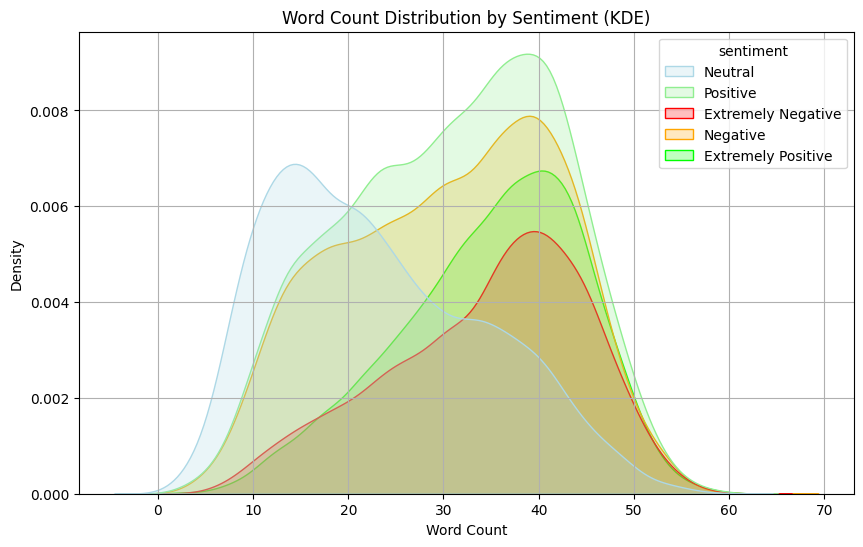

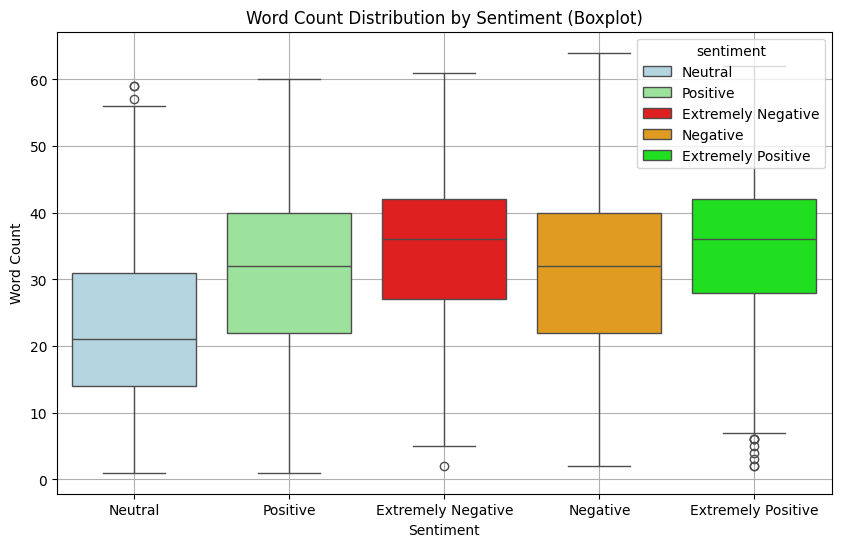

In [25]:
# Step 3: KDE plot for word count distribution by sentiment with custom palette
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='word_count', hue='sentiment', palette=custom_palette, fill=True)
plt.title('Word Count Distribution by Sentiment (KDE)')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Step 4: Boxplot for word count distribution by sentiment with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='word_count', hue='sentiment', data=df, palette=custom_palette)
plt.title('Word Count Distribution by Sentiment (Boxplot)')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()


#### 7.2. Распределение числа слов в зависимости от тональности текста

- 📊 На графиках распределения числа слов (KDE и Boxplot) мы видим, что средняя длина текста по количеству слов существенно различается в зависимости от тональности. 📉
- 📏 **Нейтральные тексты** обладают меньшим средним числом слов, чем тексты с выраженными положительными или отрицательными эмоциями.
- 🌟 **Тексты с экстремально положительной** и **экстремально отрицательной** тональностью имеют тенденцию быть длиннее, что может свидетельствовать о более эмоционально насыщенном содержании. 🚀
- 📦 На **boxplot графике** можно также заметить несколько выбросов в категориях нейтральных и крайне положительных текстов, что указывает на наличие коротких или очень длинных сообщений в этих категориях.



➡️ Вспомним, что анализ данных признаков (зависимость эмоциональной окраски от длины текста & количества слов) уже был проведен нами ранее -- для непредобработанного текста. 

Вспомним те результаты и сопоставим с новыми на данном шаге:

+ ***длина текста в символах***

   - *оригинальных текстов* ▶️    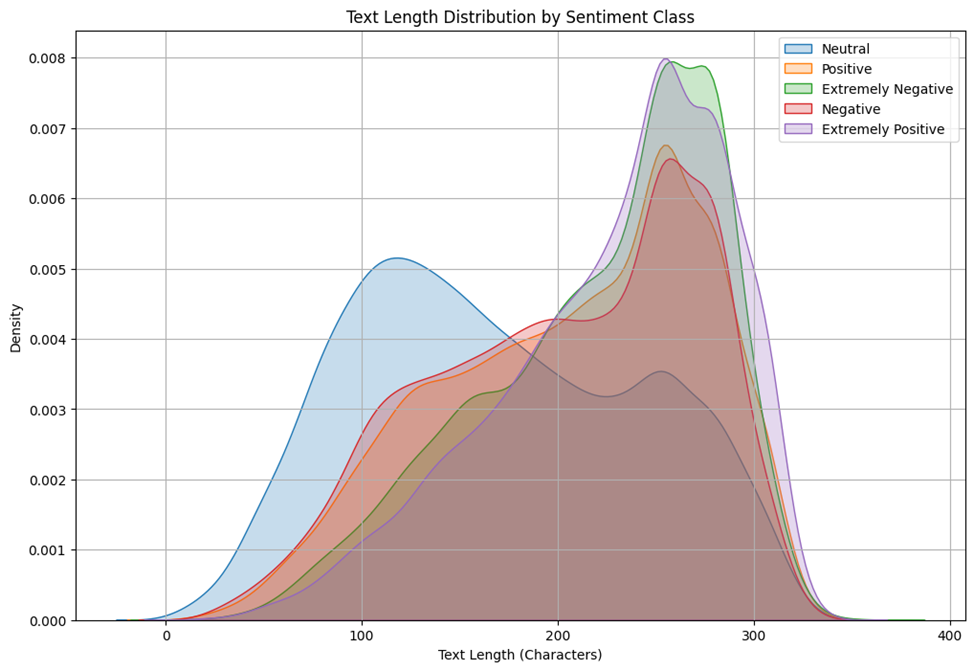 
   - *очищенных текстов* ▶️     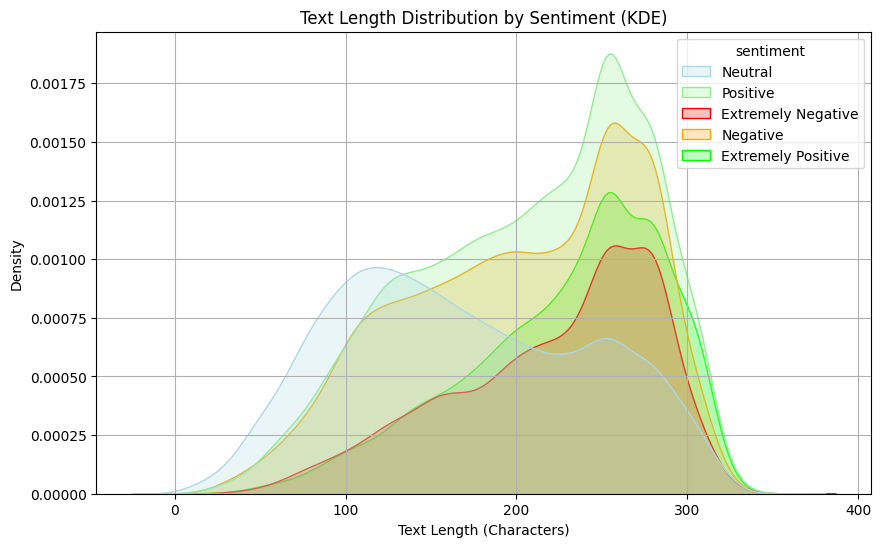


+ ***количество слов***

   - *оригинальных текстов* ▶️    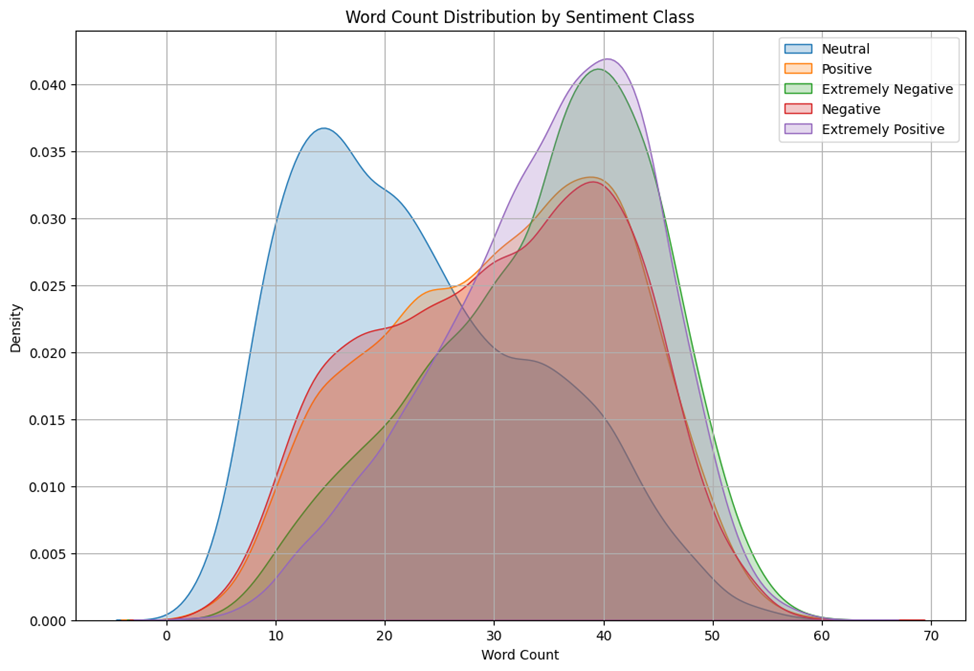
   - *очищенных текстов* ▶️     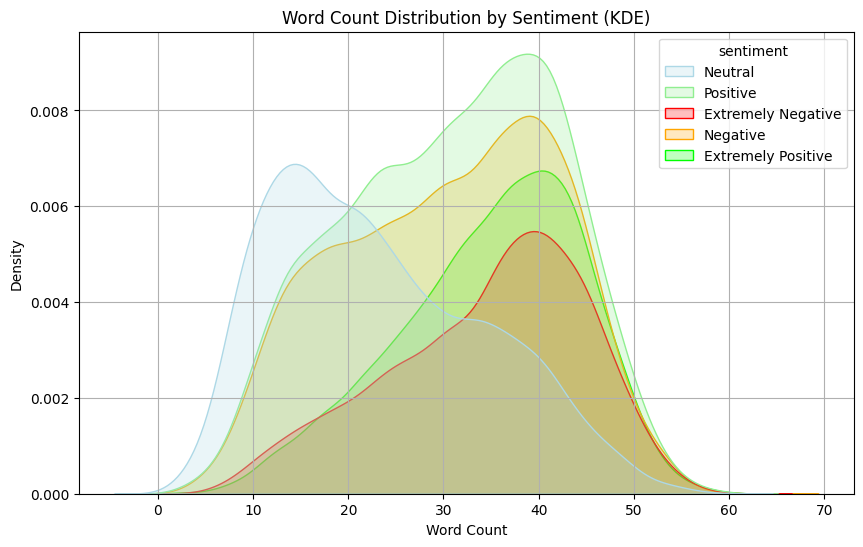

❇️ И вот теперь, когда мы очистили текст от пунктуационнных знаков, хештегов, -- всего кроме букв и цифр, а все буквы привели к нижнему регистру, мы выполнили этот анализ вновь. Зачем это сделано? 

✳️ Интересен вопрос -- **может ли, и если да, то насколько, предобработка текста исказить признаки стилистического (в нашем случае -- эмоционального) окраса текста?**
*Мы сделали выводы.*

### Заключение 📊

В ходе проведенного анализа распределений длины текста и количества слов до и после предобработки текста можно сделать следующие выводы:

🔹 **Снижение шума**: Предобработка текста существенно уменьшает шумовые компоненты, такие как стоп-слова, пунктуация и незначительные символы. Это позволяет сосредоточиться на более информативных признаках, что делает модель более устойчивой к внешним факторам.

🔹 **Стабильность признаков**: Сравнение распределений показывает, что в некоторых случаях длина текста и количество слов сохраняют свою значимость как признак для классификации сентимента. Важно отметить, что предобработка помогает выровнять эти распределения, устраняя потенциальные искажения, вызванные шумом.

🔹 **Длина текста как индикатор сентимента**: После предобработки становится более очевидно, что тексты с выраженным эмоциональным окрасом (например, очень положительные или очень отрицательные) имеют тенденцию быть длиннее по сравнению с нейтральными текстами. Это подтверждает гипотезу о том, что длина текста может служить полезным признаком для анализа сентимента.

🔹 **Количество слов как сигнал**: В обработанном тексте распределение количества слов по сентиментам становится более четким. Это свидетельствует о том, что определенные сентименты могут выражаться с определенным диапазоном количества слов, что делает этот признак более информативным для моделей машинного обучения.

🔹 **Практическое значение**: Сравнительный анализ до и после обработки помогает уточнить выбор признаков для обучения моделей. После предобработки сентиментальные паттерны становятся более явными, что может способствовать улучшению производительности моделей при классификации сентиментов.

🎯 Таким образом, предобработка текста играет ключевую роль в улучшении качества анализа сентимента, устраняя шум и делая признаки более выразительными и полезными для машинного обучения.

### Сравнение результатов анализа длины текста, количества слов и семантического анализа для предобработанных и непредобработанных текстов 📝

#### Длина текста и количество слов 🔍

🔹 **Непредобработанные тексты**: 
   - В исходных текстах наблюдается более широкое распределение длины и количества слов. Это связано с присутствием стоп-слов, пунктуации и нерелевантных символов, которые увеличивают длину текста и количество слов, не добавляя семантической ценности. Например, нейтральные тексты показали значительное количество коротких и менее информативных сообщений.
   - Графики распределения длины текста и количества слов показывают меньшую разницу между сентиментальными классами, что затрудняет выявление явных закономерностей.

🔹 **Предобработанные тексты**: 
   - После предобработки текста (удаление стоп-слов, пунктуации, приведение к нижнему регистру) распределения длины текста и количества слов стали более компактными и выразительными. Сокращение «шума» позволило выделить более релевантные лексемы.
   - Для обработанных текстов различия между сентиментальными классами стали более очевидными. Например, тексты с выраженным сентиментом, такие как "очень положительные" и "очень отрицательные", показывают более длинные сообщения, чем нейтральные, что можно использовать как признак для модели классификации.

#### Семантический анализ (частотность слов) 📊

🔹 **Непредобработанные тексты**: 
   - В непредобработанных текстах доминируют такие часто встречающиеся слова, как предлоги и связки ("the", "and", "is"). Эти слова встречаются во всех сентиментальных классах с практически одинаковой частотой, что усложняет их использование в качестве признаков для анализа сентимента.
   - Например, в непредобработанных текстах частотность таких слов, как "covid" и "prices", была высока, но из-за наличия нерелевантных слов и шумов было сложно определить точное влияние этих слов на сентимент.

🔹 **Предобработанные тексты**: 
   - После предобработки текста семантический анализ показал, что ключевые слова для каждого сентимента стали более различимыми и информативными. Стоп-слова и нерелевантные символы были удалены, и такие слова, как "covid", "prices", "grocery store" приобрели более четкое значение в контексте сентимента.
   - Для каждого сентиментального класса определились четкие лидеры среди слов: например, для очень негативных текстов чаще встречаются слова "panic buying", "oil prices", "grocery store", тогда как для очень позитивных текстов — "thank", "help", "support". Это делает семантические паттерны более ясными и способствует улучшению классификации сентимента.

### Выводы 🏁
🔸 **Длина текста и количество слов** в предобработанных текстах становятся более релевантными признаками для анализа сентимента. Уменьшение шумов помогает моделям точнее интерпретировать сентимент.

🔸 **Семантический анализ** после предобработки стал более эффективным. Мы можем лучше различать ключевые слова, характерные для разных сентиментальных классов, что улучшает обучение модели и ее способность классифицировать тексты по сентименту.

🎯 Таким образом, предобработка текста не только уменьшает объем данных, но и улучшает их качество, делая признаки более четкими и информативными для дальнейшего анализа.
 
❗️ **Важно**
+ ⚠️ Данные выводы, основанные на анализе диаграмм и boxplot, носят предварительный характер. Для подтверждения или опроержения того, являются ли эти выводы (статистически-) значимыми, требуется использование статистических тестов.

### 8. Анализ доплнительных признаков

#### 8.1 Связь длины слов в тексте 

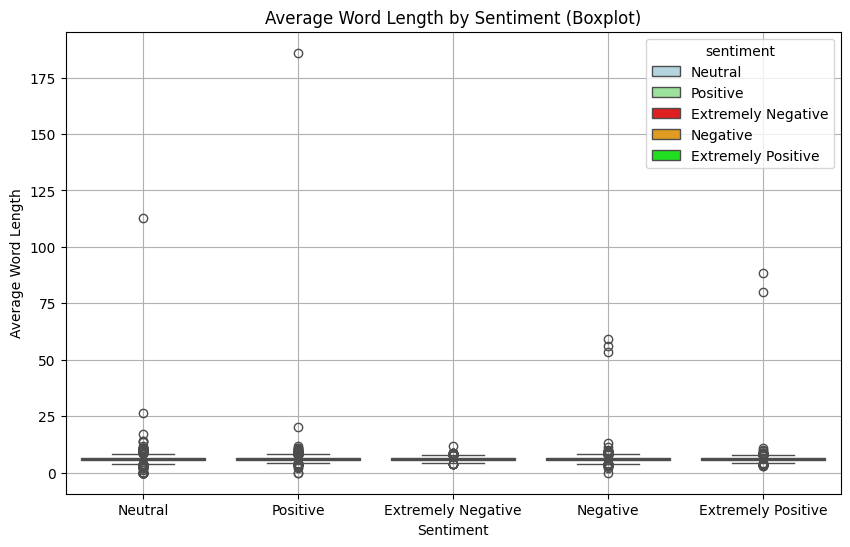

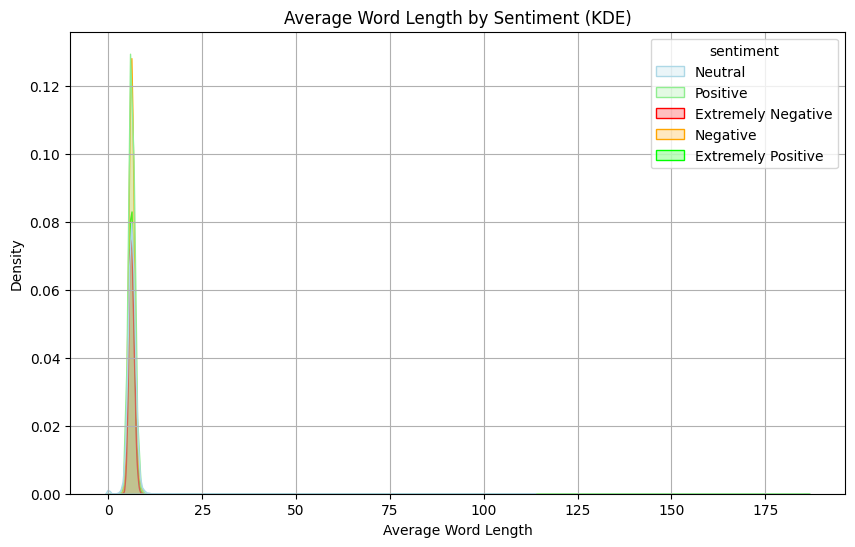

In [26]:
# Average word length
df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)

# Boxplot for average word length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='avg_word_length', data=df, hue='sentiment', palette=custom_palette)
plt.title('Average Word Length by Sentiment (Boxplot)')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Length')
plt.grid(True)
plt.show()

# KDE plot for average word length
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='avg_word_length', hue='sentiment', palette=custom_palette, fill=True)
plt.title('Average Word Length by Sentiment (KDE)')
plt.xlabel('Average Word Length')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### 📊 **Анализ средней длины слова в зависимости от сентимента (8.1)**

1. **Общая картина**:  
   📉 Все категории сентиментов показывают схожие значения средней длины слов. Это означает, что средняя длина слов, используемых в текстах, не сильно варьируется в зависимости от сентимента.

2. **Аномалии и выбросы**:  
   🔍 На диаграмме размаха (boxplot) можно увидеть несколько выбросов, особенно в категории *Positive* и *Extremely Positive*. Эти выбросы могут указывать на наличие некорректных данных или слов с непропорциональной длиной, которые требуют дополнительной проверки.

3. **Отсутствие значимых различий**:  
   ❗️ В распределении длины слов по сентиментам не наблюдается существенных отличий. Это говорит о том, что средняя длина слов не является ключевым фактором, влияющим на сентимент текстов. 

4. **KDE**:  
   📈 KDE также подтверждают, что средняя длина слов по сентиментам имеет почти идентичные формы и пик на низких значениях, что логично для большинства текстов, использующих короткие слова.



#### 8.2 Анализ связи количества знаков препинания эмоцинальног окраса 

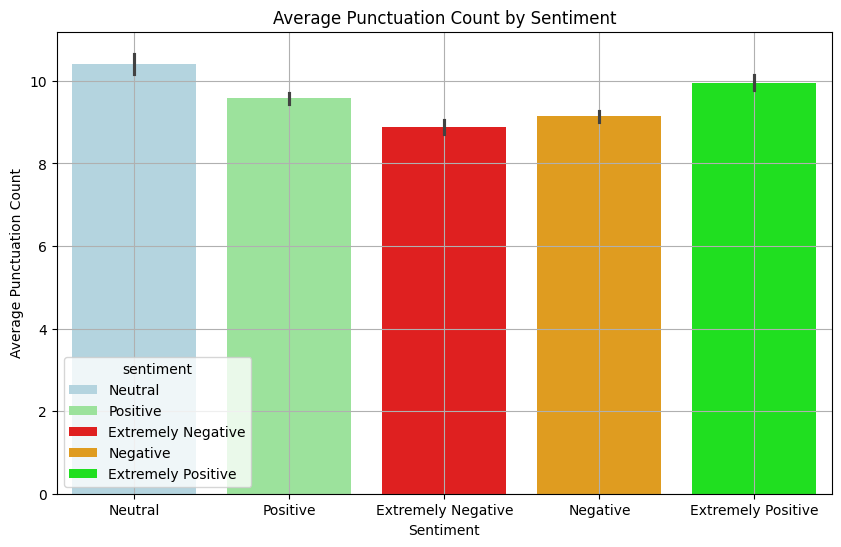

In [27]:
import string

# Count punctuation marks in each text
df['punctuation_count'] = df['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Bar plot for punctuation count by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='punctuation_count', data=df, hue='sentiment', palette=custom_palette)
plt.title('Average Punctuation Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Punctuation Count')
plt.grid(True)
plt.show()


#### 📝 **Анализ связи количества знаков препинания эмоцинальног окраса**

1. **Общее наблюдение**:  
   🔍 Тексты с *Neutral* сентиментом имеют наибольшее среднее количество знаков препинания по сравнению с остальными сентиментами. Это может свидетельствовать о более детализированной или структурированной форме изложения в нейтральных текстах.

2. **Одинаковое количество знаков препинания в других сентиментах**:  
   📊 Тексты с сентиментами *Positive*, *Negative*, *Extremely Negative* и *Extremely Positive* имеют примерно одинаковое количество знаков препинания, что указывает на схожесть структуры предложений и использования пунктуации.

3. **Различия в нейтральных текстах**:  
   ❗️ Относительно высокий уровень пунктуации в *Neutral* текстах может быть связан с формальностью или нейтральностью подачи информации, где требуется более четкая структура текста, чего нет в текстах с выраженными эмоциональными оценками.

4. **Использование пунктуации как потенциального индикатора сентимента**:  
   📈 Несмотря на незначительные различия, количество знаков препинания может использоваться как дополнительная характеристика при анализе сентиментов, особенно для выделения нейтральных текстов.



#### 8.3 Анализ связи количества слов-сaps и эмоционального окраса

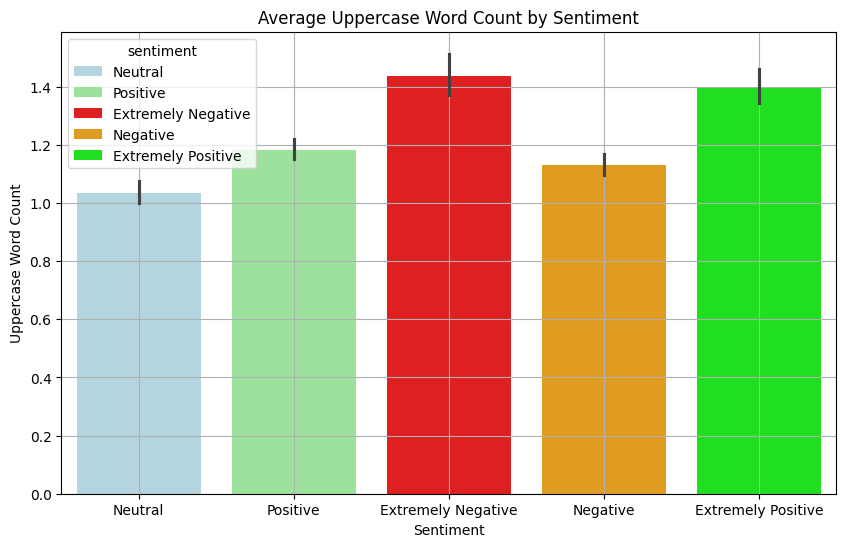

In [28]:
# Count uppercase words
df['uppercase_word_count'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Bar plot for uppercase word count by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='uppercase_word_count', data=df, hue='sentiment', palette=custom_palette)
plt.title('Average Uppercase Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Uppercase Word Count')
plt.grid(True)
plt.show()


#### 🔠 **Анализ связи количества слов-сaps и сентимента**

1. **Наибольшее количество слов в верхнем регистре**:  
   🔴 Тексты с *Extremely Negative* сентиментом имеют наибольшее количество слов, написанных в верхнем регистре. Это может свидетельствовать о повышенной эмоциональной напряженности и акцентировании на некоторых словах.

2. **Высокие показатели в *Extremely Positive* и *Positive* текстах**:  
   🟢 *Extremely Positive* и *Positive* сентименты также показывают высокие значения, что может быть связано с использованием верхнего регистра для выражения положительных эмоций или акцента.

3. **Низкие значения для *Neutral* сентимента**:  
   🔵 *Neutral* тексты имеют наименьшее количество слов в верхнем регистре, что соответствует их характеру — отсутствие выраженных эмоциональных акцентов.

4. **Использование верхнего регистра как эмоционального индикатора**:  
   💬 Количество слов в верхнем регистре может являться полезной характеристикой для различения сентиментов, особенно при анализе сильных эмоциональных реакций, таких как *Extremely Negative* и *Extremely Positive*.



#### 8.4 Анализ связи количества хэштегов и упоминаний и эмоционального окраса

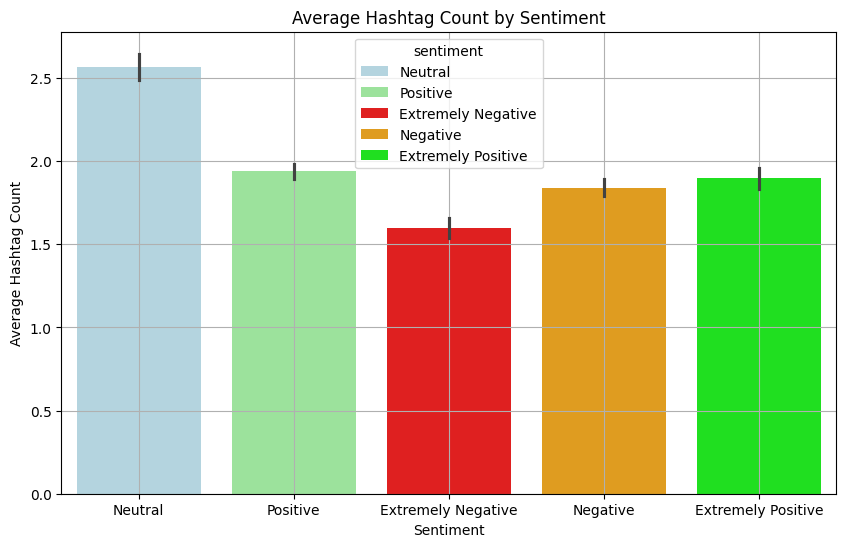

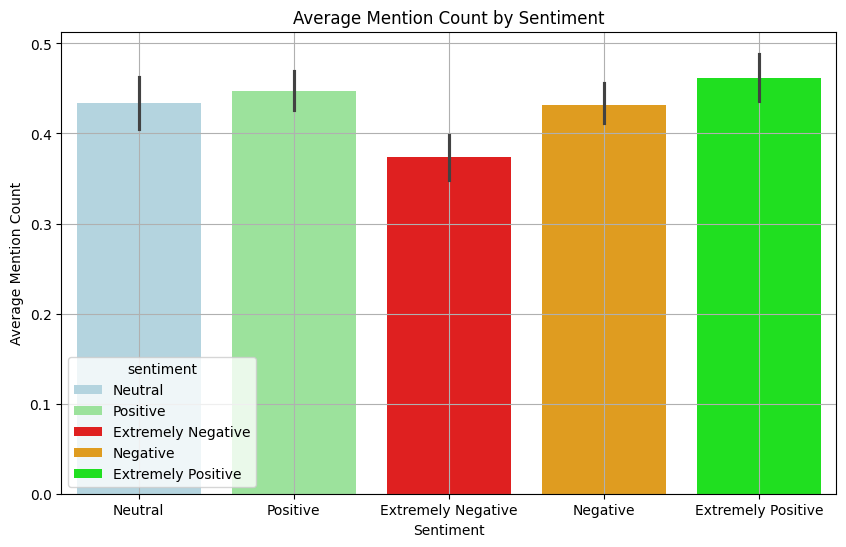

In [29]:
# Count hashtags and mentions in the text
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))

# Bar plot for hashtag count by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='hashtag_count', data=df, hue='sentiment', palette=custom_palette)
plt.title('Average Hashtag Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Hashtag Count')
plt.grid(True)
plt.show()

# Bar plot for mention count by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='mention_count', data=df, hue='sentiment', palette=custom_palette)
plt.title('Average Mention Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Mention Count')
plt.grid(True)
plt.show()


#### Анализ хэштегов и упоминаний по категориям сентимента 😊

- 🔷 **Хэштеги:**
  - **Нейтральный** сентимент демонстрирует наибольшее количество хэштегов, что может говорить о большей популярности нейтральных сообщений для привлечения внимания 🏷️.
  - В категориях **позитивного** и **экстремально негативного** сентимента наблюдается несколько более низкая частота хэштегов, что может отражать меньшее использование этой функции в таких сообщениях 📝.
  - **Экстремально позитивные** сообщения содержат чуть больше хэштегов по сравнению с негативными, что может свидетельствовать о более активной социальной активности в таких постах 📊.

- 🔶 **Упоминания:**
  - **Экстремально позитивный** сентимент имеет самые высокие показатели упоминаний, что может свидетельствовать о большем вовлечении аудитории и стремлении авторов таких сообщений к большей интерактивности 📢.
  - **Позитивный** сентимент также содержит относительно высокое количество упоминаний, что может говорить о тенденции к общению и вовлечению пользователей в позитивном контексте 😄.
  - **Экстремально негативный** сентимент демонстрирует несколько ниже частоту упоминаний, что может говорить о меньшей склонности к вовлечению других пользователей в негативные сообщения 🚫.
  
  📈 Такой анализ позволяет более глубоко понимать, как пользователи используют хэштеги и упоминания в зависимости от эмоциональной окраски сообщений. Эти факторы могут стать полезными признаками для дальнейшего прогнозирования сентимента.


#### 8.5 Дополнительно: polarity и эмоциональный окрас

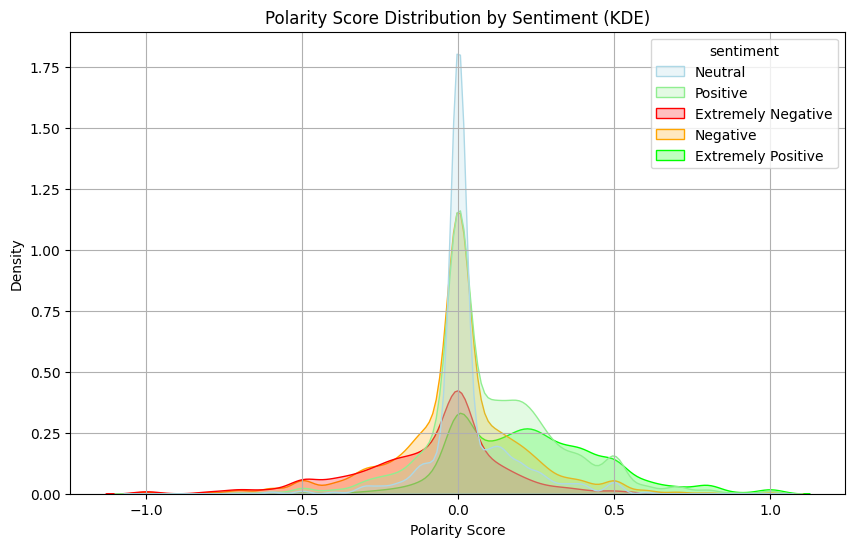

In [30]:
from textblob import TextBlob

# Polarity score using TextBlob
df['polarity_score'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# KDE plot for polarity score by sentiment
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='polarity_score', hue='sentiment', palette=custom_palette, fill=True)
plt.title('Polarity Score Distribution by Sentiment (KDE)')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


В ходе проведенного анализа текста были получены следующие результаты. Основной задачей являлось исследование распределения длины текста, количества слов, средней длины слов, частоты использования символов и упоминаний в зависимости от эмоциональной окраски текста (sentiment). Было выявлено, что различия в текстах с разной эмоциональной окраской заметны по многим характеристикам.

Тексты с нейтральной окраской, как правило, короче, содержат меньшее количество слов и имеют более низкие значения среднего количества символов. В то время как тексты с экстремально негативной и экстремально позитивной окраской, напротив, характеризуются большими значениями этих параметров. Аналогичные тенденции были замечены и для среднего количества прописных слов: тексты с выраженной эмоциональной окраской включают больше таких слов.

Кроме того, исследования частоты употребления хэштегов и упоминаний показали, что тексты с нейтральной окраской чаще содержат хэштеги, тогда как тексты с позитивной или негативной окраской больше склонны содержать упоминания. Интересно, что тексты с негативной окраской имеют тенденцию к более высоким показателям по ряду характеристик, включая длину слов и количество пунктуации, что может свидетельствовать о большем уровне экспрессивности.

Исследование также показало, что распределение полярности (по шкале от -1 до 1) в зависимости от эмоциональной окраски текста ожидаемо отражает эту окраску. Так, тексты с положительной и экстремально положительной окраской демонстрируют положительные значения полярности, в то время как тексты с негативной окраской имеют отрицательные значения полярности.

Таким образом, выявленные закономерности могут быть полезны для дальнейшего анализа и создания более сложных моделей для классификации текста по эмоциональной окраске, а также для разработки методов обработки естественного языка, учитывающих характеристики текста в зависимости от его тональности.

In [50]:
df.head(10)

text           sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   
5  As news of the regionÂs first confirmed COVID...            Positive   
6  Cashier at grocery store was sharing his insig...            Positive   
7  Was at the supermarket today. Didn't buy toile...             Neutral   
8  Due to COVID-19 our retail store and classroom...            Positive   
9  For corona prevention,we should stop to buy th...            Negative   

   text_length  word_count                                       cleaned_text  \
0          111           8                                                      
1          237          38  advice talk neighbours family exchange phone n...   
2          131          14  coronavirus australia woolworths give elderly ...   
3          306          42  food stock one empty please dont panic enough ...   
4          310          40  ready go supermarket outbreak im paranoid food...   
5          250          36  news regionâs first confirmed covid case came...   
6          180          28  cashier grocery store sharing insights prove c...   
7          119          13           supermarket today didnt buy toilet paper   
8          280          45  due covid retail store classroom atlanta open ...   
9          267          42  corona preventionwe stop buy things cash use o...   

   avg_word_length  punctuation_count  uppercase_word_count  hashtag_count  \
0         0.000000                 19                     0              0   
1         6.296296                  0                     1              0   
2         7.333333                  8                     1              0   
3         4.625000                 22                    10              7   
4         5.882353                 23                     1              6   
5         5.960000                 13                     1              0   
6         6.071429                 12                     1              1   
7         5.833333                 12                     0              3   
8         6.166667                 12                     1              0   
9         5.571429                  8                     1              2   

   mention_count  polarity_score  
0              3        0.000000  
1              0        0.166667  
2              0       -0.200000  
3              0        0.175000  
4              0       -0.077778  
5              1        0.154167  
6              0        0.000000  
7              0       -0.033333  
8              0        0.006250  
9              0        0.000000

#### 8.6 Дополнительно: корреляция всех рассмотренных признаков с включением эмоционального окраса

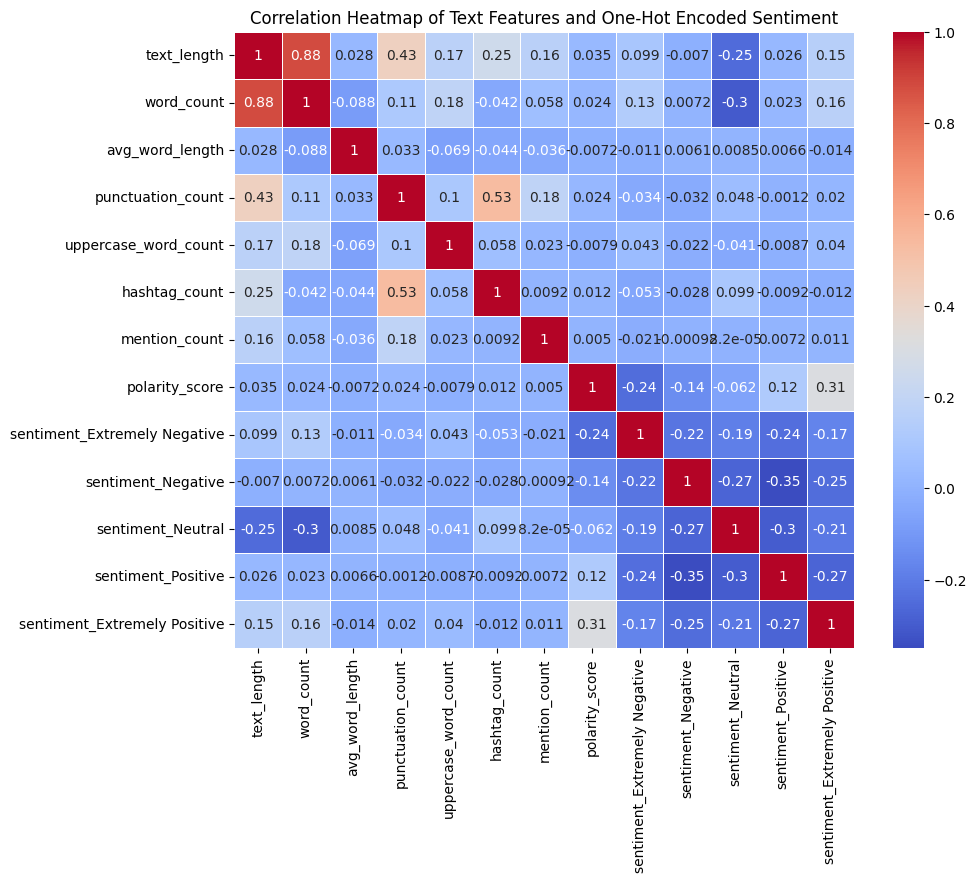

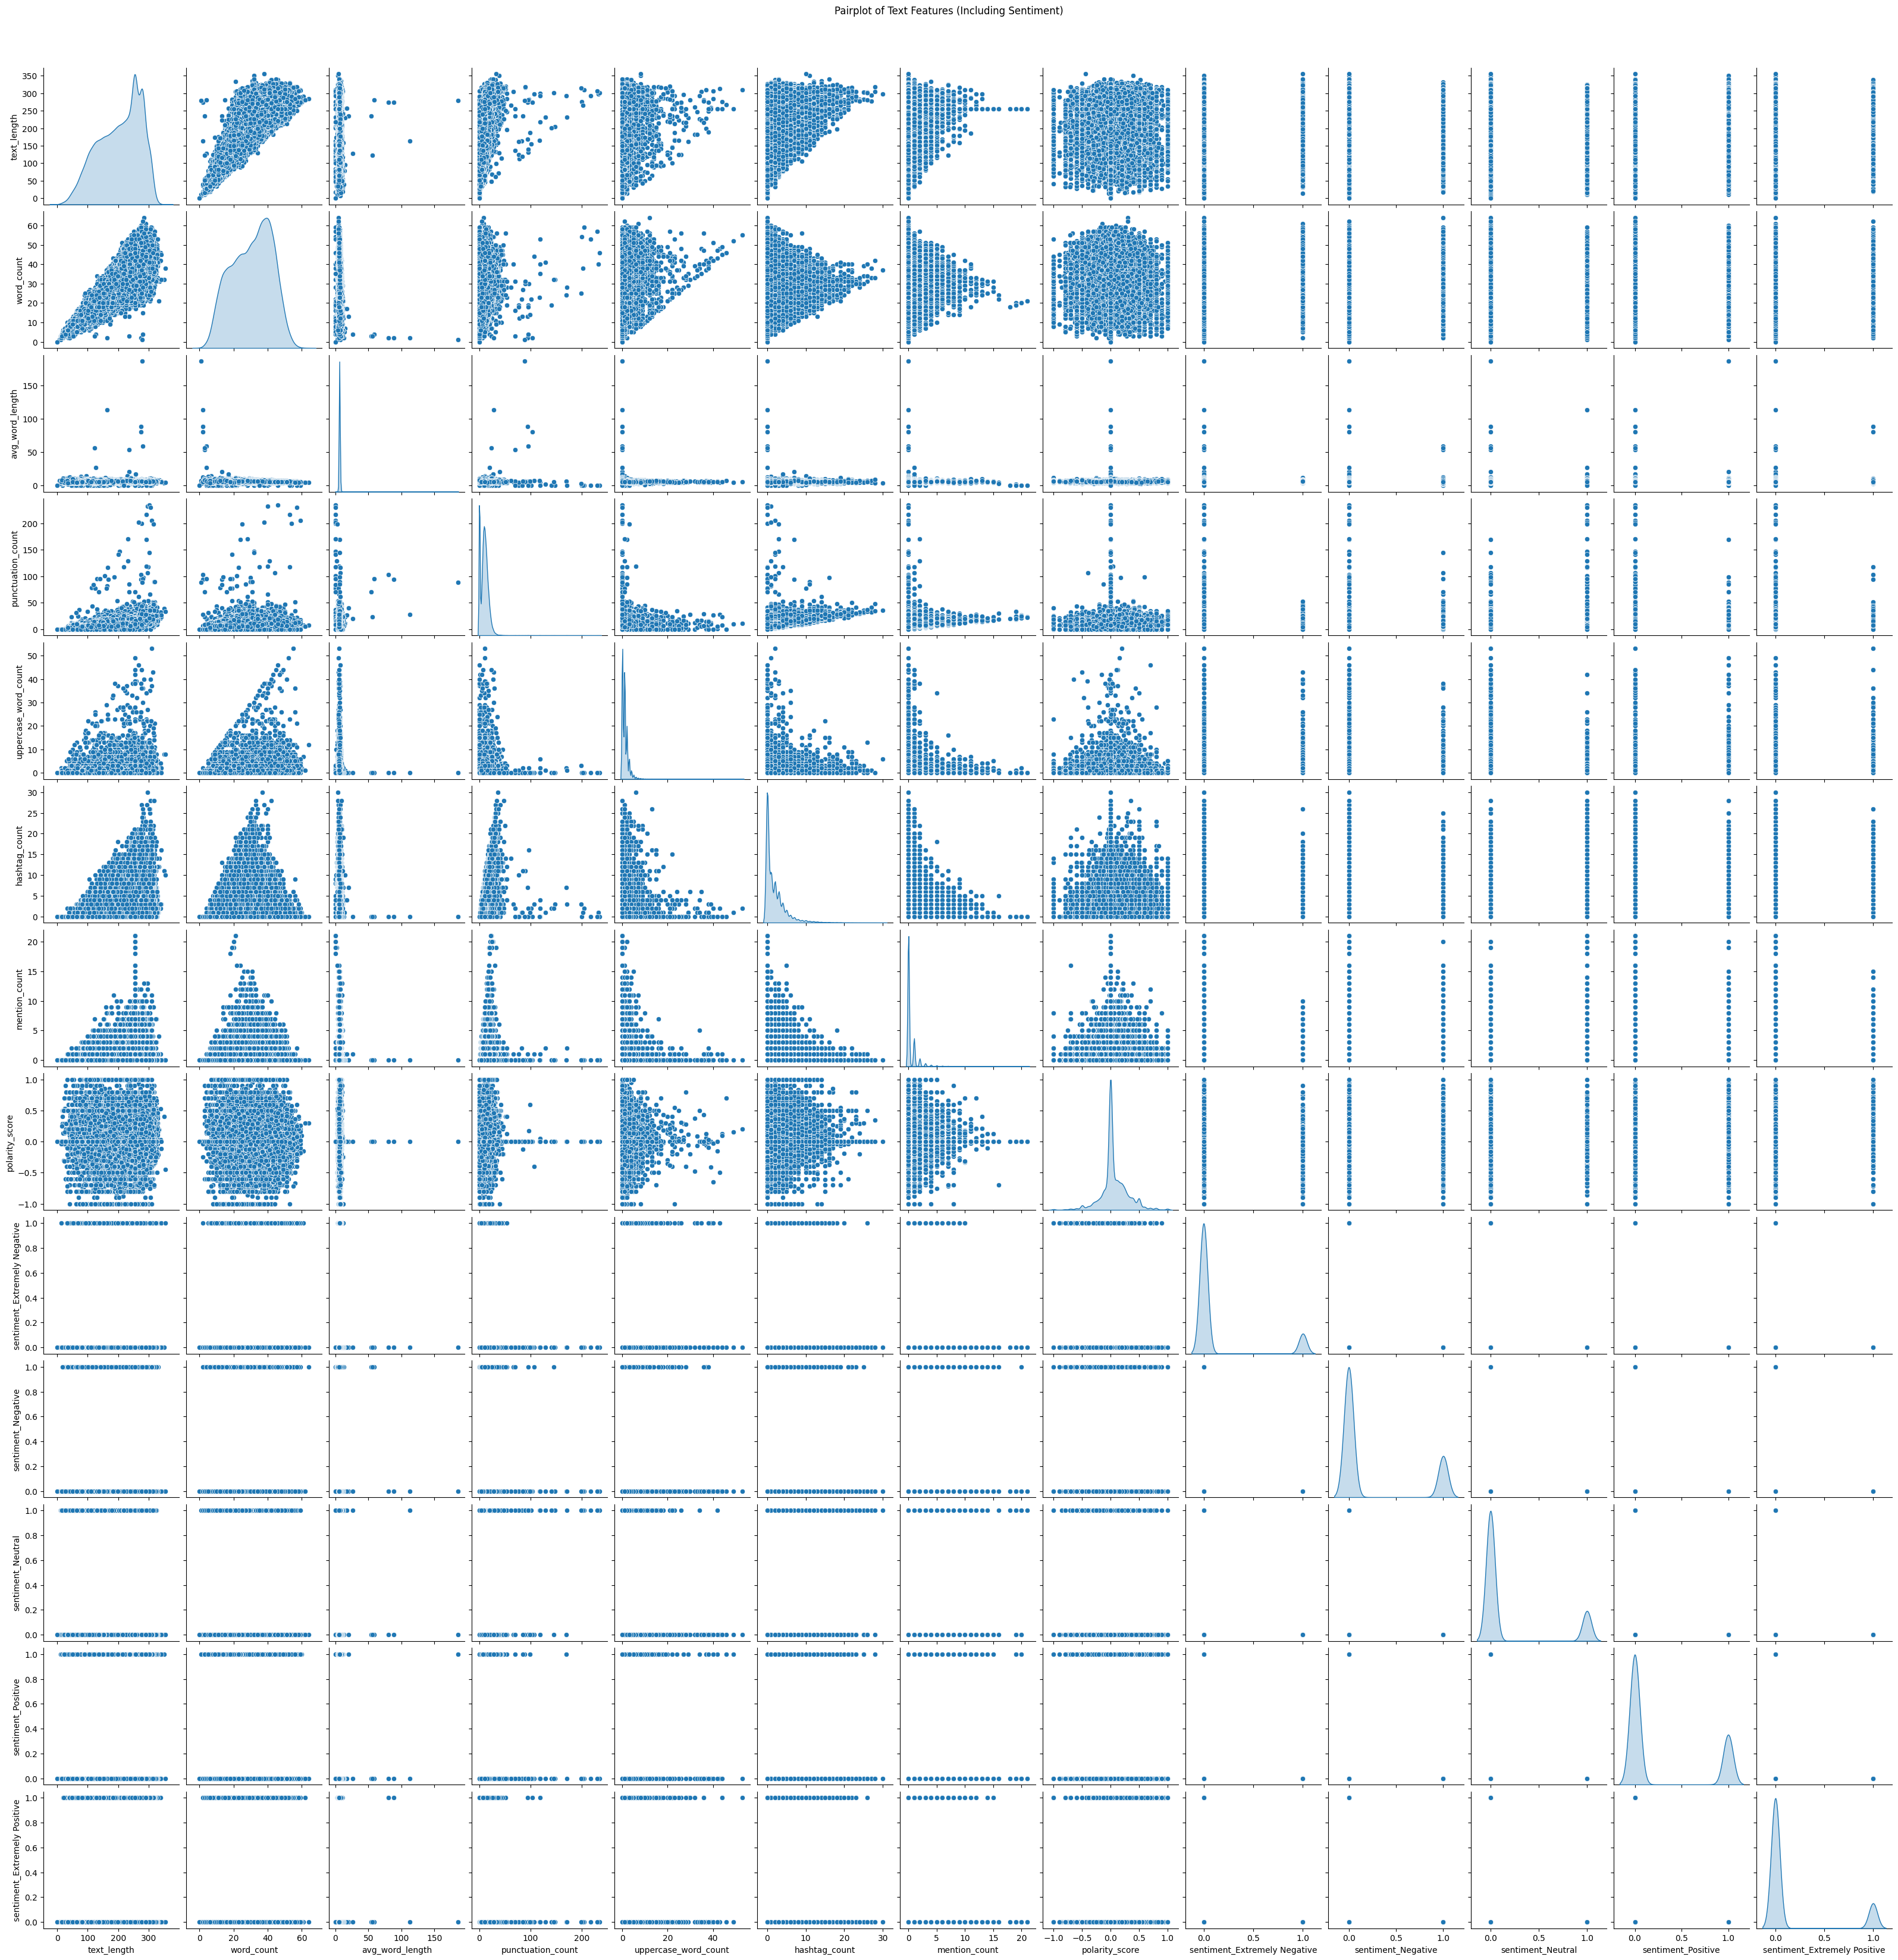

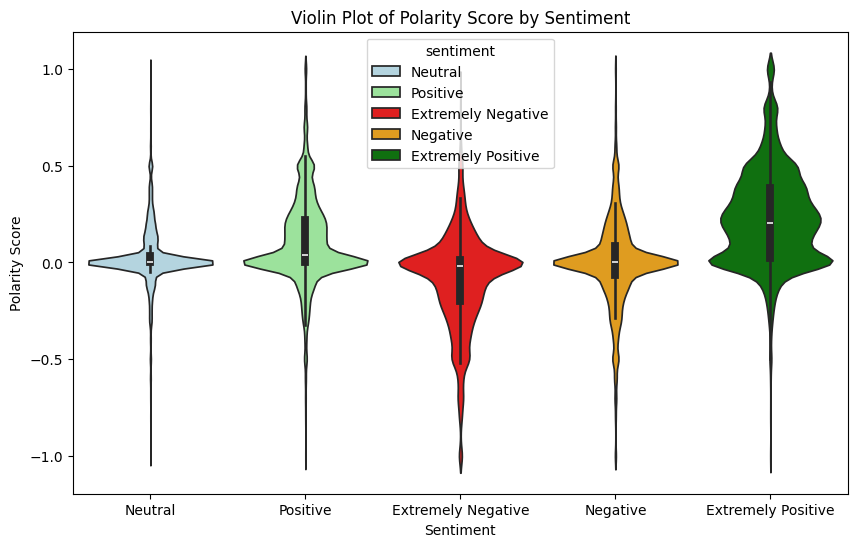

In [31]:

# Perform One-Hot Encoding for the 'sentiment' column
one_hot_encoded_sentiment = pd.get_dummies(df['sentiment'], prefix='sentiment')

# Concatenate the original dataframe with the one-hot encoded sentiment columns
df_with_one_hot = pd.concat([df, one_hot_encoded_sentiment], axis=1)

# Define the features to include in the correlation analysis
correlation_features = df_with_one_hot[['text_length', 'word_count', 'avg_word_length',
                                        'punctuation_count', 'uppercase_word_count',
                                        'hashtag_count', 'mention_count', 'polarity_score',
                                        'sentiment_Extremely Negative', 'sentiment_Negative',
                                        'sentiment_Neutral', 'sentiment_Positive',
                                        'sentiment_Extremely Positive']]

# Compute the correlation matrix
correlation_matrix = correlation_features.corr()

# Visualization: Plot the correlation heatmap including one-hot encoded sentiment columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Text Features and One-Hot Encoded Sentiment')
plt.show()

# Additional Pairplot for visual inspection
sns.pairplot(correlation_features, kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Text Features (Including Sentiment)', y=1.02)
plt.show()

# Visualize correlation between sentiment polarity and sentiment categories
plt.figure(figsize=(10, 6))
# Define the custom color palette for the sentiment categories
custom_palette = {
    'Neutral': 'lightblue',
    'Positive': 'lightgreen',
    'Extremely Negative': 'red',
    'Negative': 'orange',
    'Extremely Positive': 'green'
}

# Create the violin plot with the custom color palette
sns.violinplot(x='sentiment', y='polarity_score', data=df, hue='sentiment', palette=custom_palette)
plt.title('Violin Plot of Polarity Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.show()



Анализ корреляции между различными текстовыми характеристиками и закодированной переменной "Sentiment" позволил выявить определённые зависимости. В частности, положительные корреляции были замечены между длиной текста и количеством слов, что ожидаемо. 

**С таргетом (эмоциональной окраской текста) все признаки продемонстрировали связь не выше слабой. Т.е убедительно значимым сам по себе по результатом корреляционного анализа не является ни один признак. Даннная гипотеза, однако требует проверки более точными методами, например, статистическими  тестами.**

Полярность текста также демонстрирует умеренную связь с эмоциональной окраской: чем более положительной является эмоциональная окраска текста, тем выше значение полярности. Отдельные текстовые характеристики, такие как количество заглавных слов, знаков пунктуации и хэштегов, также показали слабую корреляцию с эмоциональной окраской текста. 
Наиболее выраженные зависимости наблюдаются у таких характеристик, как количество слов и длина текста, с различными категориями эмоциональной окраски, где, например, нейтральные тексты имеют тенденцию быть короче и менее эмоционально насыщенными. 

Violin plot для полярности показал, что крайние значения полярности соответствуют крайне положительным и крайне негативным эмоциям, что подтверждает значимость этой характеристики для оценки эмоциональной окраски текста.

## Issue 2. Придумайте эвристику для предсказания целевого класса.

In [48]:
df

text           sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41154  Airline pilots offering to stock supermarket s...             Neutral   
41155  Response to complaint not provided citing COVI...  Extremely Negative   
41156  You know itÂs getting tough when @KameronWild...            Positive   
41157  Is it wrong that the smell of hand sanitizer i...             Neutral   
41158  @TartiiCat Well new/used Rift S are going for ...            Negative   

       text_length  word_count  \
0              111           8   
1              237          38   
2              131          14   
3              306          42   
4              310          40   
...            ...         ...   
41154          102          12   
41155          138          23   
41156          136          18   
41157          111          18   
41158          255          46   

                                            cleaned_text  avg_word_length  \
0                                                                0.000000   
1      advice talk neighbours family exchange phone n...         6.296296   
2      coronavirus australia woolworths give elderly ...         7.333333   
3      food stock one empty please dont panic enough ...         4.625000   
4      ready go supermarket outbreak im paranoid food...         5.882353   
...                                                  ...              ...   
41154  airline pilots offering stock supermarket shel...         7.428571   
41155  response complaint provided citing covid relat...         5.933333   
41156  know itâs getting tough rationing toilet pape...         5.900000   
41157           wrong smell hand sanitizer starting turn         5.833333   
41158  well newused rift going amazon rn although nor...         5.333333   

       punctuation_count  uppercase_word_count  hashtag_count  mention_count  \
0                     19                     0              0              3   
1                      0                     1              0              0   
2                      8                     1              0              0   
3                     22                    10              7              0   
4                     23                     1              6              0   
...                  ...                   ...            ...            ...   
41154                  8                     2              2              0   
41155                  4                     2              0              0   
41156                  7                     0              2              2   
41157                  4                     1              3              0   
41158                 10                     3              0              1   

       polarity_score  
0            0.000000  
1            0.166667  
2           -0.200000  
3            0.175000  
4           -0.077778  
...               ...  
41154        0.000000  
41155       -0.150000  
41156       -0.211111  
41157       -0.250000  
41158       -0.162857  

[41159 rows x 11 columns]

In [60]:
# Assuming 'df' is a DataFrame with a column 'cleaned_text'
# Step 1: Define the heuristic function based on text length
def predict_sentiment_by_text_length(text):
    text_length = len(text)  # Calculate the length of the text
    
    # Heuristic Rules
    if text_length <= 150:
        return 'Neutral'  # Rule 1: Neutral if text length <= 150 characters
    elif 150 < text_length <= 250:
        return 'Positive'  # Rule 2: Positive sentiment if text length is between 151 and 250 characters
    else:
        return 'Extremely Positive'  # Rule 3: Extremely Positive if text length > 250 characters


In [61]:
# Step 2: Apply the heuristic function to the DataFrame
df['predicted_sentiment'] = df['cleaned_text'].apply(predict_sentiment_by_text_length)

In [64]:
# Step 3: Review the predicted results
display(df[['cleaned_text', 'predicted_sentiment', 'sentiment']].head(20))

cleaned_text predicted_sentiment  \
0                                                                 Neutral   
1   advice talk neighbours family exchange phone n...            Positive   
2   coronavirus australia woolworths give elderly ...             Neutral   
3   food stock one empty please dont panic enough ...             Neutral   
4   ready go supermarket outbreak im paranoid food...             Neutral   
5   news regionâs first confirmed covid case came...            Positive   
6   cashier grocery store sharing insights prove c...             Neutral   
7            supermarket today didnt buy toilet paper             Neutral   
8   due covid retail store classroom atlanta open ...            Positive   
9   corona preventionwe stop buy things cash use o...             Neutral   
10  month hasnt crowding supermarkets restaurants ...             Neutral   
11  due covid situation increased demand food prod...             Neutral   
12  caring community letâs look less capable vill...            Positive   
13  dont need stock food ill amazon deliver whatev...             Neutral   
14  adara releases covid resource center travel br...             Neutral   
15  lines grocery store unpredictable eating safe ...             Neutral   
16                                                                Neutral   
17  mar russia consumer surveillance watchdog repo...             Neutral   
18  amazon glitch stymies whole foods fresh grocer...            Positive   
19  arent struggling please consider donating food...             Neutral   

             sentiment  
0              Neutral  
1             Positive  
2             Positive  
3             Positive  
4   Extremely Negative  
5             Positive  
6             Positive  
7              Neutral  
8             Positive  
9             Negative  
10             Neutral  
11  Extremely Positive  
12  Extremely Positive  
13            Positive  
14            Positive  
15            Positive  
16             Neutral  
17             Neutral  
18  Extremely Positive  
19            Positive

## Issue 3. Реализуйте один из методов векторизации текста и обучите одну из моделей классического ML для данной задачи.

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [134]:
# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # adjust the max_features
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])  # Convert cleaned text to TF-IDF features


In [135]:
# Label Encoding for 'sentiment' column (Converting sentiment to numerical format)
y = df['sentiment'].astype('category').cat.codes  # Convert sentiment labels to numerical format

In [136]:
#  Splitting the dataset into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
#  Define the Logistic Regression Model with 'saga' solver and 'multinomial' for multi-class classification
logistic_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000)
logistic_model

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [138]:
# Step 6: Train the model
logistic_model.fit(X_train, y_train)
logistic_model

c:\Users\master\Documents\MIPT_MAGISTER\SEMESTER_3\NLP\HW\HW_1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [150]:
# Make predictions on the test set
ml_predictions = logistic_model.predict(X_val)

## Issue 4. Предложите метрику, 
разбейте обучающую выборку на обучающую и валидационную и посчитайте её значение для методов, реализованных в пункте 2 и 3.

Будем опираться на признаки, просмотренные в ходе EDA. Выберем признак из тех характеристик текстов, которые наиболее показали тенденцию к связи с семантической окраской. Пусть это будет длина текста.

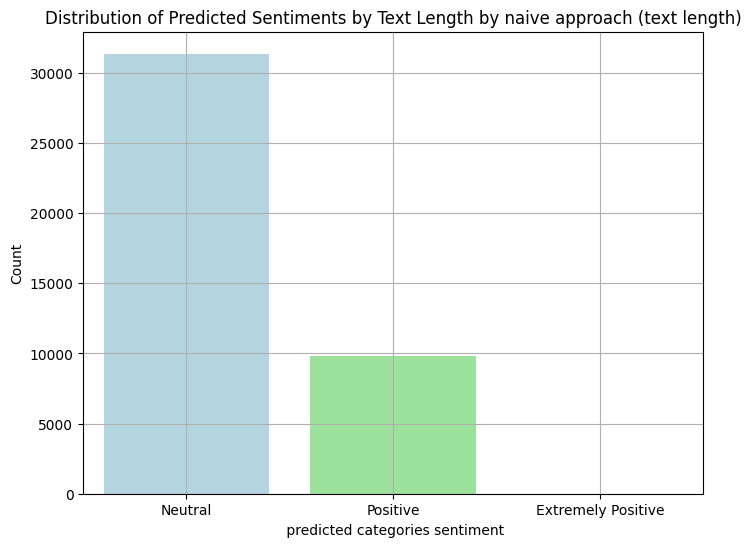

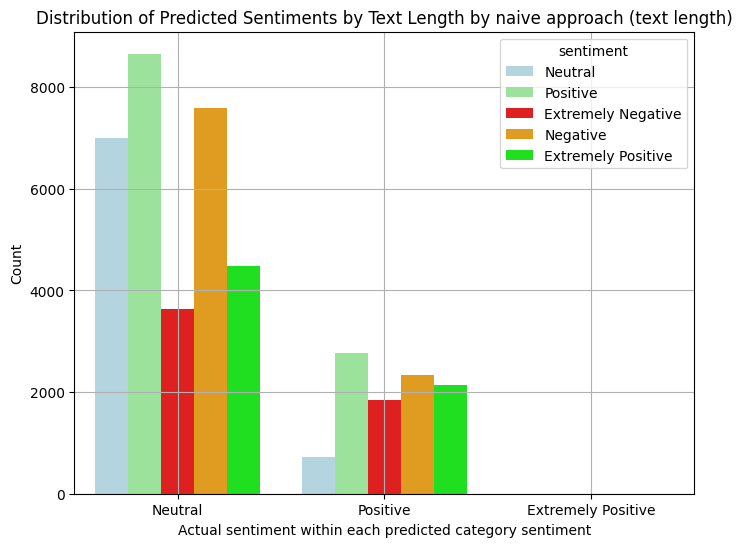

In [182]:
custom_palette = {
    'Extremely Positive': '#00FF00',  # Saturated Green
    'Positive': '#90EE90',            # Light Green
    'Neutral': '#ADD8E6',             # Light Blue
    'Negative': '#FFA500',            # Orange
    'Extremely Negative': '#FF0000'   # Red
}

# Plot the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, hue='predicted_sentiment', palette=custom_palette)
plt.title('Distribution of Predicted Sentiments by Text Length by naive approach (text length)')
plt.xlabel(' predicted categories sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, hue='sentiment', palette=custom_palette)
plt.title('Distribution of Predicted Sentiments by Text Length by naive approach (text length)') 
plt.xlabel('Actual sentiment within each predicted category sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [140]:
# Fit the label encoder on our sentiment data 
label_encoder = LabelEncoder()

# Fit on the original sentiment labels in our dataset 
label_encoder.fit(df['sentiment'])

# Now, you can retrieve the mapping
label_mapping = dict(enumerate(label_encoder.classes_))
print(label_mapping)

{0: 'Extremely Negative', 1: 'Extremely Positive', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: nan}


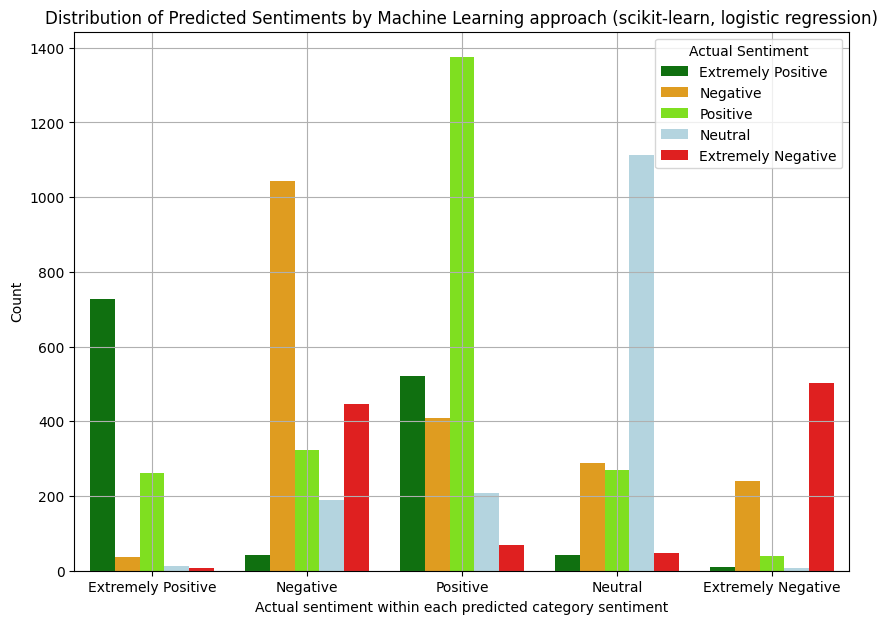

In [180]:
# Add the 'ml_predictions' to the DataFrame
df_ml = df.copy()  # Create a copy of the DataFrame for ML comparison
df_ml = df_ml.iloc[-len(ml_predictions):]  # Ensure the size matches with predictions (validation set only)

# Step 1: Decode the machine learning predictions and actual sentiment
df_ml['ml_predicted_sentiment'] = ml_predictions  # Use existing ml_predictions
df_ml['ml_predicted_sentiment'] = df_ml['ml_predicted_sentiment'].map(label_mapping)

df_ml['actual_sentiment'] = y_val.values  # Use existing y_val
df_ml['actual_sentiment'] = df_ml['actual_sentiment'].map(label_mapping)

# Step 2: Define the custom color palette based on your description
custom_palette_ml = {
    'Extremely Positive': '#008000',  # Saturated Green
    'Positive': '#7FFF00',  # Light Green (Salad)
    'Neutral': '#ADD8E6',  # Light Blue (can also use White: '#FFFFFF')
    'Negative': '#FFA500',  # Orange
    'Extremely Negative': '#FF0000'  # Red
}

# Step 3: Create the plot comparing predicted sentiment vs. actual sentiment
plt.figure(figsize=(10, 7))

sns.countplot(x='ml_predicted_sentiment', hue='actual_sentiment', data=df_ml, palette=custom_palette)

plt.title('Distribution of Predicted Sentiments by Machine Learning approach (scikit-learn, logistic regression)') 
plt.xlabel('Actual sentiment within each predicted category sentiment')
plt.ylabel('Count')
plt.legend(title='Actual Sentiment')
plt.grid(True)
plt.show()

### ✨ Оценка качества предсказаний ✨

#### 🔹 Наивный подход (основанный на длине текста)
- **Общая картина**: Предсказания по длине текста демонстрируют значительное смещение в сторону "нейтрального" и "положительного" классов.
- **Проблемы**: Категория "Экстремально Положительный" почти не была предсказана наивным методом, что указывает на ограниченность подхода при предсказании экстремальных категорий.
- **Вывод**: Хотя длина текста может быть показателем, её недостаточно для точного определения всех возможных категорий сентимента. 😕

---

#### 🔹 Машинное обучение (логистическая регрессия)
- **Общая картина**: Метод машинного обучения продемонстрировал более сбалансированное распределение предсказанных классов. Модель точно предсказывала все категории, включая экстремальные значения.
- **Точность**: Модель лучше определяет как позитивные, так и негативные эмоции, а также справляется с предсказанием экстремальных значений сентимента. 🎯
- **Вывод**: Машинное обучение значительно повышает точность предсказаний, используя более сложные закономерности в данных. 💡

##### Заключение по результатам предсказания настроений с использованием метода машинного обучения

- **Модель машинного обучения**, основанная на логистической регрессии, продемонстрировала удовлетворительные результаты в предсказании классов настроений.
  - 🟢 **Классы "Очень положительный" и "Очень отрицательный"** предсказаны с высокой точностью, что отражает способность модели хорошо распознавать крайние категории. Это видно по ярким зеленым и красным столбцам на графике.
  - 😇 **Класс "Положительный"** также предсказан с высокой степенью точности. Большинство случаев, классифицированных как положительные, совпадают с истинными положительными значениями, что доказывает правильность работы модели для данной категории.
- **Сложности в предсказаниях нейтральных настроений**:
  - 🔵 **Нейтральные** настроения оказались наиболее трудными для модели. В результате наблюдается некоторое количество ошибочных предсказаний, когда нейтральные сообщения были отнесены к другим классам (например, положительным или отрицательным).
  - Это свидетельствует о трудности четкого разграничения между нейтральными и смежными классами настроений.
- **Ошибки в негативных классах**:
  - 🔴 В некоторых случаях модель путала **негативные** настроения с **очень негативными** и **положительными**, что указывает на необходимость дальнейшей доработки модели для повышения точности в этих категориях.
  
- **Общая оценка**:
  - В целом, модель продемонстрировала хорошую способность к предсказанию позитивных настроений, однако требует улучшений для лучшего различения нейтральных и негативных сообщений.

✅ Модель машинного обучения показала хороший потенциал, но для повышения точности следует рассмотреть возможность использования дополнительных характеристик и более сложных алгоритмов.

---

#### 📊 **Сравнение**:
- **Наивный подход** 📝: Прост в реализации, но серьёзно ограничен в точности предсказаний.
- **Машинное обучение** 💡: Более сложный подход, который охватывает больше контекстуальных признаков и значительно улучшает точность.

---

✅ **Заключение**: Использование машинного обучения даёт более точные и сбалансированные предсказания по сравнению с наивным методом, что подтверждает необходимость использования более сложных моделей для анализа сентимента текстов.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [83]:
#  Compare the predicted sentiment with the actual sentiment 

# Assuming 'sentiment' column in the DataFrame is the actual sentiment

df['correct_prediction'] = df['sentiment'] == df['predicted_sentiment']
naive_accuracy = df['correct_prediction'].mean()
print(f"Accuracy of the Naive Approach (based on text length): {naive_accuracy:.2%}")

Accuracy of the Naive Approach (based on text length): 23.70%


In [106]:
accuracy = accuracy_score(y_val, ml_predictions)
precision = precision_score(y_val, ml_predictions, average='weighted')
recall = recall_score(y_val, ml_predictions, average='weighted')
f1 = f1_score(y_val, ml_predictions, average='weighted')

# Step 9: Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_val, ml_predictions))

Accuracy: 0.5782
Precision: 0.5844
Recall: 0.5782
F1 Score: 0.5770

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.63      0.47      0.54      1071
           1       0.69      0.54      0.61      1341
           2       0.51      0.52      0.51      2020
           3       0.63      0.73      0.68      1530
           4       0.53      0.61      0.57      2269

    accuracy                           0.58      8232
   macro avg       0.50      0.48      0.48      8232
weighted avg       0.58      0.58      0.58      8232



c:\Users\master\Documents\MIPT_MAGISTER\SEMESTER_3\NLP\HW\HW_1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\master\Documents\MIPT_MAGISTER\SEMESTER_3\NLP\HW\HW_1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\master\Documents\MIPT_MAGISTER\SEMESTER_3\NLP\HW\HW_1\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

✅ По результатам сравнения метррик accuracy, видим, что модель машннного обучения показала значительно лучшую (> чем в 2 раза) точность. Однако также, учитывая, что точность современных моделей достигает значения более 90%, можем сказать, что наша модель является несовершенной.

# Part 2.

## Issue 1. 

## Обучите несколько моделей рекуррентных нейронных сетей 
например LSTM, GRU, Bidirectional-LSTM.

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report

### Модель 1. LSTM

In [15]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [16]:
# Make a copy of the dataset specifically for the LSTM model
df_rnn = df.copy()

In [17]:
df_rnn

text           sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41154  Airline pilots offering to stock supermarket s...             Neutral   
41155  Response to complaint not provided citing COVI...  Extremely Negative   
41156  You know itÂs getting tough when @KameronWild...            Positive   
41157  Is it wrong that the smell of hand sanitizer i...             Neutral   
41158  @TartiiCat Well new/used Rift S are going for ...            Negative   

       text_length  word_count  \
0              111           8   
1              237          38   
2              131          14   
3              306          42   
4              310          40   
...            ...         ...   
41154          102          12   
41155          138          23   
41156          136          18   
41157          111          18   
41158          255          46   

                                            cleaned_text  
0                                                         
1      advice talk neighbours family exchange phone n...  
2      coronavirus australia woolworths give elderly ...  
3      food stock one empty please dont panic enough ...  
4      ready go supermarket outbreak im paranoid food...  
...                                                  ...  
41154  airline pilots offering stock supermarket shel...  
41155  response complaint provided citing covid relat...  
41156  know itâs getting tough rationing toilet pape...  
41157           wrong smell hand sanitizer starting turn  
41158  well newused rift going amazon rn although nor...  

[41159 rows x 5 columns]

In [18]:
# Step 0.1 Tokeniation and padding -- will be universal for usage another following NN models

# Parameters for tokenization and padding
max_words = 10000  # Maximum number of words to consider in the vocabulary
max_len = 150      # Maximum sequence length (after padding)

# Initialize the tokenizer and fit on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_rnn['cleaned_text'])

# Convert texts to sequences (tokenized text)
X = tokenizer.texts_to_sequences(df_rnn['cleaned_text'])

# Pad sequences to ensure they are all the same length
X = pad_sequences(X, maxlen=max_len)

# Convert target labels into one-hot encoding (if not already done)
from keras.utils import to_categorical
y = pd.get_dummies(df_rnn['sentiment']).values  # One-hot encoding of sentiment labels



In [19]:
# Step 0.2 Train-test split -- will be universal for usage another following NN models 

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.shape, y_train.shape, X_val.shape, y_val.shape) # Check the shape of the training data and labels


(32927, 150)

(32927, 5)

(8232, 150)

(8232, 5)

In [23]:
# Step 1: Define the LSTM model
# Model Parameters
embedding_dim = 100  # Size of the word embedding vectors
lstm_units = 128     # Number of LSTM units
dropout_rate = 0.3   # Dropout rate to prevent overfitting

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))  # Embedding layer
model_lstm.add(LSTM(units=lstm_units, return_sequences=False))  # LSTM layer
model_lstm.add(Dropout(dropout_rate))  # Dropout layer
model_lstm.add(Dense(units=64, activation='relu'))  # Fully connected layer
model_lstm.add(Dense(units=y_train.shape[1], activation='softmax'))  # Output layer (softmax for multi-class)

In [24]:
# Step 2: Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Step 3: Train the model with training data and validation data
batch_size = 32
epochs = 5  # You can adjust the number of epochs

history_lstm = model_lstm.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_val, y_val), 
                    verbose=1)


Epoch 1/5
1029/1029 [==============================] - 87s 83ms/step - loss: 1.0276 - accuracy: 0.5783 - val_loss: 0.7268 - val_accuracy: 0.7397
Epoch 2/5
1029/1029 [==============================] - 85s 83ms/step - loss: 0.6021 - accuracy: 0.7896 - val_loss: 0.6651 - val_accuracy: 0.7737
Epoch 3/5
1029/1029 [==============================] - 86s 84ms/step - loss: 0.4832 - accuracy: 0.8369 - val_loss: 0.7077 - val_accuracy: 0.7664
Epoch 4/5
1029/1029 [==============================] - 85s 83ms/step - loss: 0.3988 - accuracy: 0.8697 - val_loss: 0.7581 - val_accuracy: 0.7578
Epoch 5/5
1029/1029 [==============================] - 86s 84ms/step - loss: 0.3258 - accuracy: 0.8936 - val_loss: 0.8257 - val_accuracy: 0.7466


In [93]:
# Define the plot for trainn-validation history display as a separate function to be avaliable for usage dealing with another NN models
def plot_model_history(history, model_name="Model"):
    """
    Universal function to plot training and validation accuracy and loss for any model.
    
    Args:
    - history: History object returned from model.fit()
    - model_name: Name of the model to display in the plot titles
    """
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy', markersize=10, marker='o')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', markersize=10, marker='o')
    plt.title(f'Model Accuracy - {model_name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss', markersize=10, marker='x')
    plt.plot(history.history['val_loss'], label='val_loss', markersize=10, marker='x')
    plt.title(f'Model Loss - {model_name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    # Adjust the layout to prevent overlapping
    plt.tight_layout()
    plt.show()


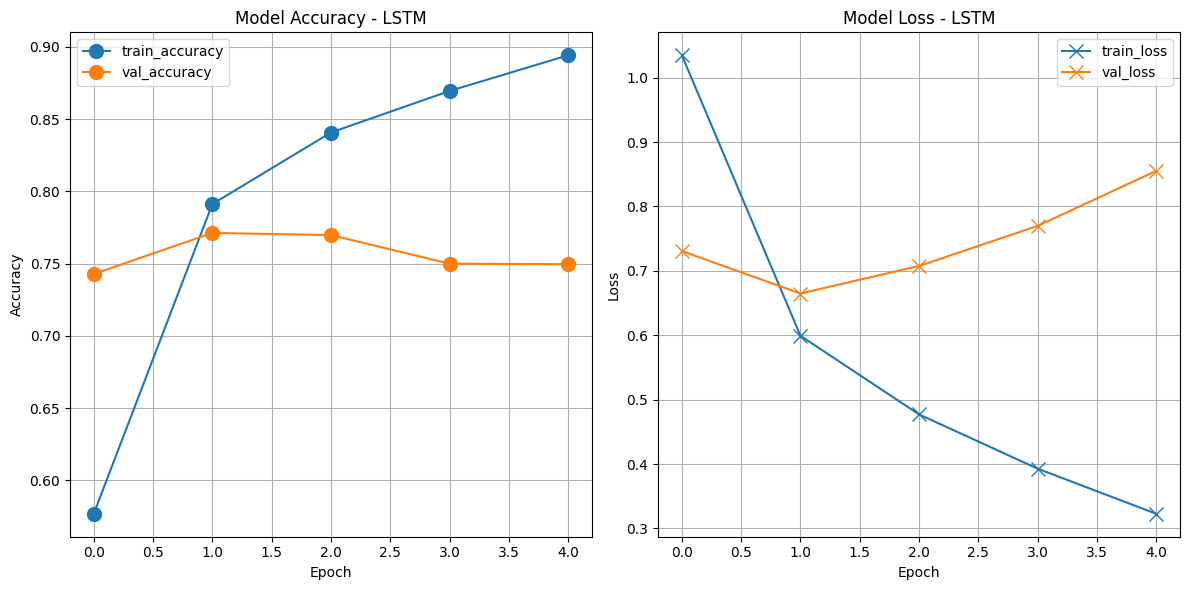

In [94]:
plot_model_history(history_lstm, model_name="LSTM")

In [95]:
# Step 4. Evaluate model performance on validation data

# Define the function to evaluate model performance and print validation loss and accuracy to be universal for usage
def evaluate_model_performance(model, X_val, y_val, model_name="Model"):
    """
    Universal function to evaluate model performance and print validation loss and accuracy.
    
    Args:
    - model: Trained model to evaluate
    - X_val: Validation input data
    - y_val: Validation target data (labels)
    - model_name: Name of the model for labeling the print statements
    """
    # Evaluate the model on validation data
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
    
    # Print the outcomes
    print(f"Evaluation for {model_name}:")
    print(f"Validation Loss: {val_loss:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")


In [96]:
evaluate_model_performance(model_lstm, X_val, y_val, model_name="LSTM")

258/258 [==============================] - 5s 19ms/step - loss: 0.8553 - accuracy: 0.7496
Evaluation for LSTM:
Validation Loss: 0.86
Validation Accuracy: 0.75


In [111]:
# Step 5. Make predictions, display classification report, and show confusion matrix in both absolute and relative (decimal) values

# Define the function to make predictions, display classification report, and show confusion matrix in both absolute and relative (decimal) values to be universal for usage
def evaluate_model_predictions(model, X_val, y_val, model_name="Model"):
    """
    Universal function to make predictions, display classification report, 
    and show confusion matrix in both absolute and relative (decimal) values.
    
    Args:
    - model: Trained model to make predictions
    - X_val: Validation input data
    - y_val: Validation target data (one-hot encoded)
    - class_labels: List of class labels (e.g., ["Neutral", "Positive", "Negative", etc.])
    - model_name: Name of the model for labeling the print statements
    """
    # ============================================================================================================================
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_val, axis=1)
    
    class_labels = ['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']

    # ============================================================================================================================

    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred_classes, target_names=class_labels))
    
    # ============================================================================================================================

    # Compute the confusion matrix (absolute values)
    cm_absolute = confusion_matrix(y_true, y_pred_classes)
    
    # Compute the confusion matrix (relative values as decimals)
    cm_relative = cm_absolute.astype('float') / cm_absolute.sum(axis=1)[:, np.newaxis]
    
    # ============================================================================================================================

    # Create a DataFrame to store actual and predicted classes
    df_predictions = pd.DataFrame({
        'Actual Sentiment': y_true,
        'Predicted Sentiment': y_pred_classes
    })

    # Map the integer labels back to class names
    df_predictions['Actual Sentiment'] = df_predictions['Actual Sentiment'].map(dict(enumerate(class_labels)))
    df_predictions['Predicted Sentiment'] = df_predictions['Predicted Sentiment'].map(dict(enumerate(class_labels)))

    
    # ============================================================================================================================
    # ============================================================================================================================

    # Plot the confusion matrix (absolute and relative) side by side
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot absolute confusion matrix
    sns.heatmap(cm_absolute, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=class_labels, yticklabels=class_labels)
    ax[0].set_title(f'Confusion Matrix (Absolute) for {model_name}')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')
    
    # ============================================================================================================================

    # Plot relative confusion matrix (values between 0 and 1)
    sns.heatmap(cm_relative, annot=True, fmt='.2f', cmap='Blues', ax=ax[1], xticklabels=class_labels, yticklabels=class_labels)
    ax[1].set_title(f'Confusion Matrix (Relative) for {model_name}')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('True')
    # ==========================================================
    plt.tight_layout()
    plt.show()
    # ============================================================================================================================

    # Plot the distribution of predicted sentiments by actual sentiment
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Actual Sentiment', hue='Predicted Sentiment', data=df_predictions, palette=custom_palette)
    plt.title('Distribution of Predicted Sentiments by Actual Sentiment (RNN Model)')
    plt.xlabel('Actual Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

258/258 [==============================] - 6s 23ms/step
Classification Report for LSTM:
                    precision    recall  f1-score   support

Extremely Negative       0.77      0.73      0.75      1072
Extremely Positive       0.79      0.77      0.78      1341
          Negative       0.68      0.73      0.71      2020
           Neutral       0.86      0.77      0.81      1530
          Positive       0.72      0.75      0.73      2269

          accuracy                           0.75      8232
         macro avg       0.76      0.75      0.76      8232
      weighted avg       0.75      0.75      0.75      8232



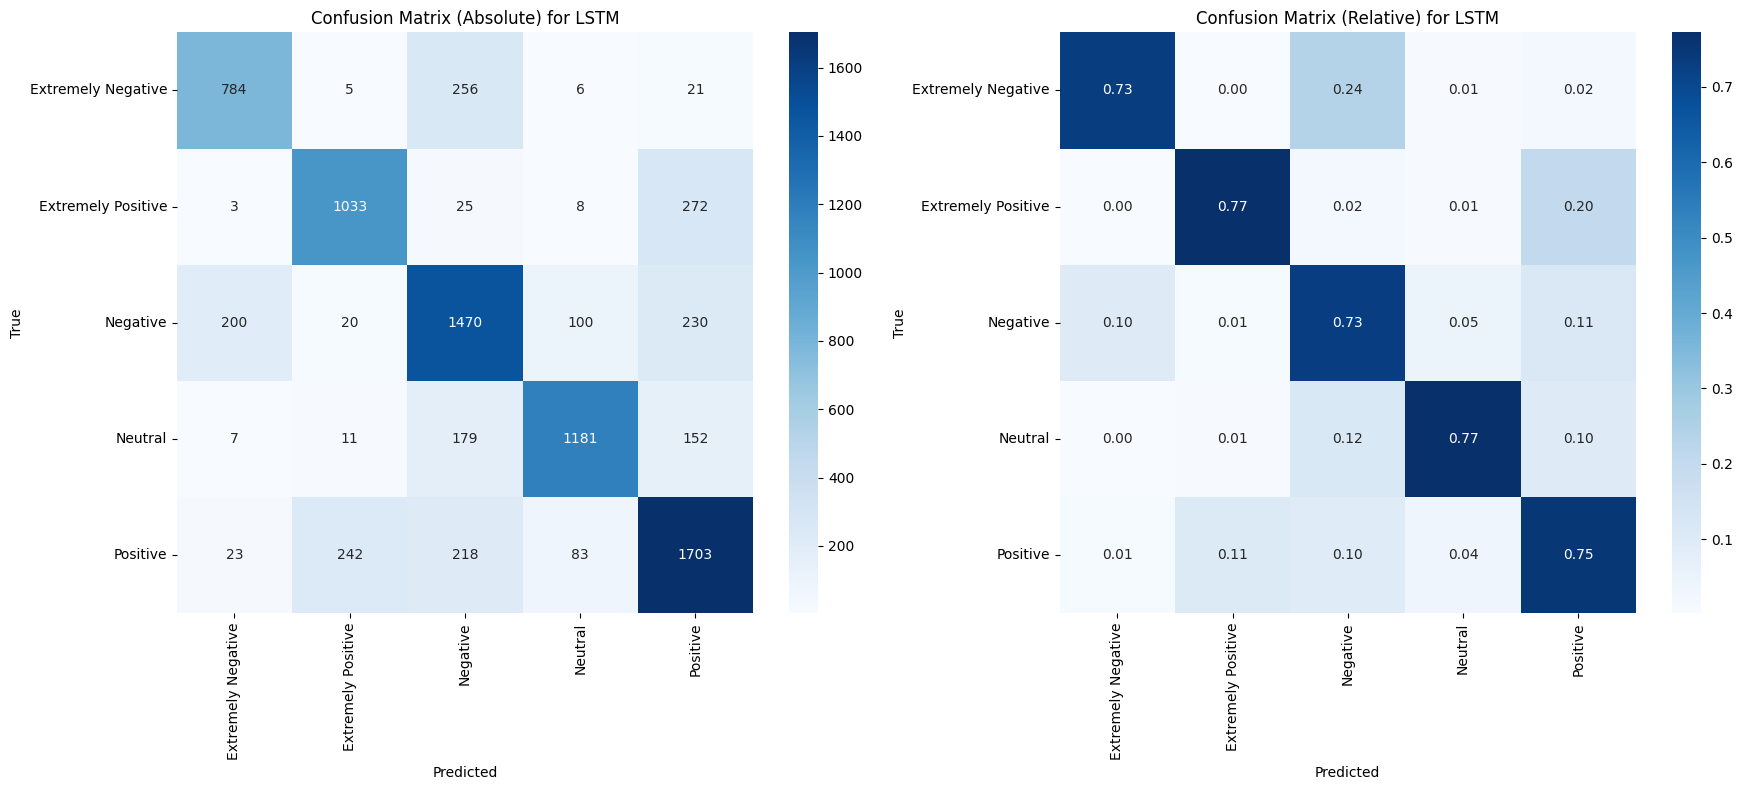

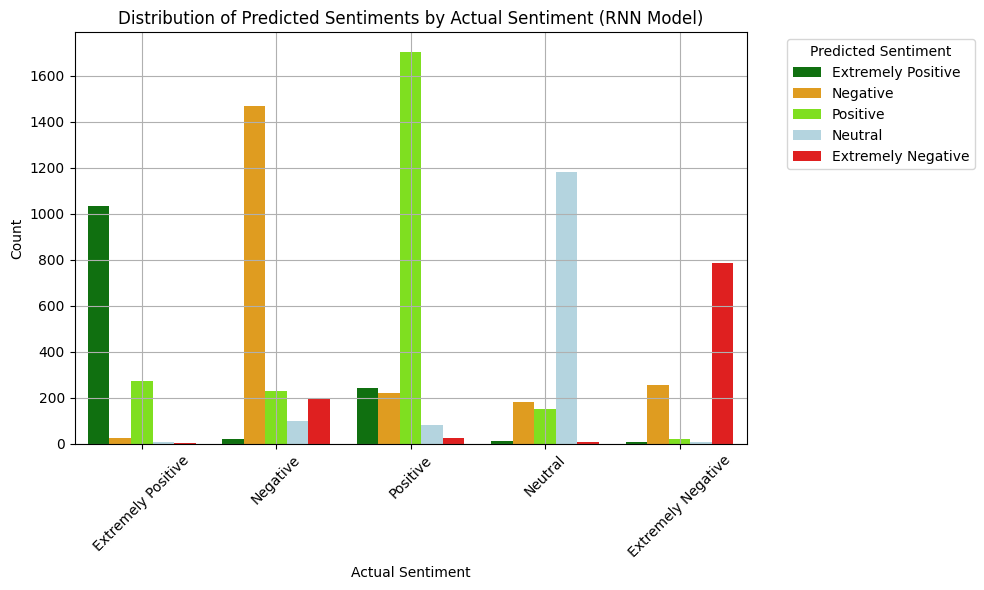

In [112]:
# Evaluate the LSTM model
evaluate_model_predictions(model_lstm, X_val, y_val, model_name="LSTM")

### Модель 2. BidLSTM

In [113]:
from keras.layers import Embedding, Bidirectional
from keras.optimizers import Adam

In [ ]:
# The tokenization, padding and train-test split use from the previous model: the 1st one, LSTM Model

In [114]:
# Step 1: Create the Bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=False)))  # Bidirectional LSTM layer
model_bi_lstm.add(Dropout(0.5))
model_bi_lstm.add(Dense(64, activation='relu'))
model_bi_lstm.add(Dense(5, activation='softmax'))  # 5 output units for 5 sentiment classes


In [115]:
# Step 2: Compile the model
model_bi_lstm.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [116]:
# Step 3: Train the model

# Set training parameters
epochs = 5
batch_size = 32

# Step 3: Train the model
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, 
                                    epochs=epochs, 
                                    batch_size=batch_size, 
                                    validation_data=(X_val, y_val))

Epoch 1/5
1029/1029 [==============================] - 159s 153ms/step - loss: 1.0685 - accuracy: 0.5577 - val_loss: 0.7415 - val_accuracy: 0.7329
Epoch 2/5
1029/1029 [==============================] - 163s 158ms/step - loss: 0.6295 - accuracy: 0.7778 - val_loss: 0.6777 - val_accuracy: 0.7615
Epoch 3/5
1029/1029 [==============================] - 165s 160ms/step - loss: 0.5055 - accuracy: 0.8306 - val_loss: 0.6973 - val_accuracy: 0.7637
Epoch 4/5
1029/1029 [==============================] - 165s 160ms/step - loss: 0.4218 - accuracy: 0.8610 - val_loss: 0.7447 - val_accuracy: 0.7581
Epoch 5/5
1029/1029 [==============================] - 166s 161ms/step - loss: 0.3495 - accuracy: 0.8869 - val_loss: 0.8379 - val_accuracy: 0.7524


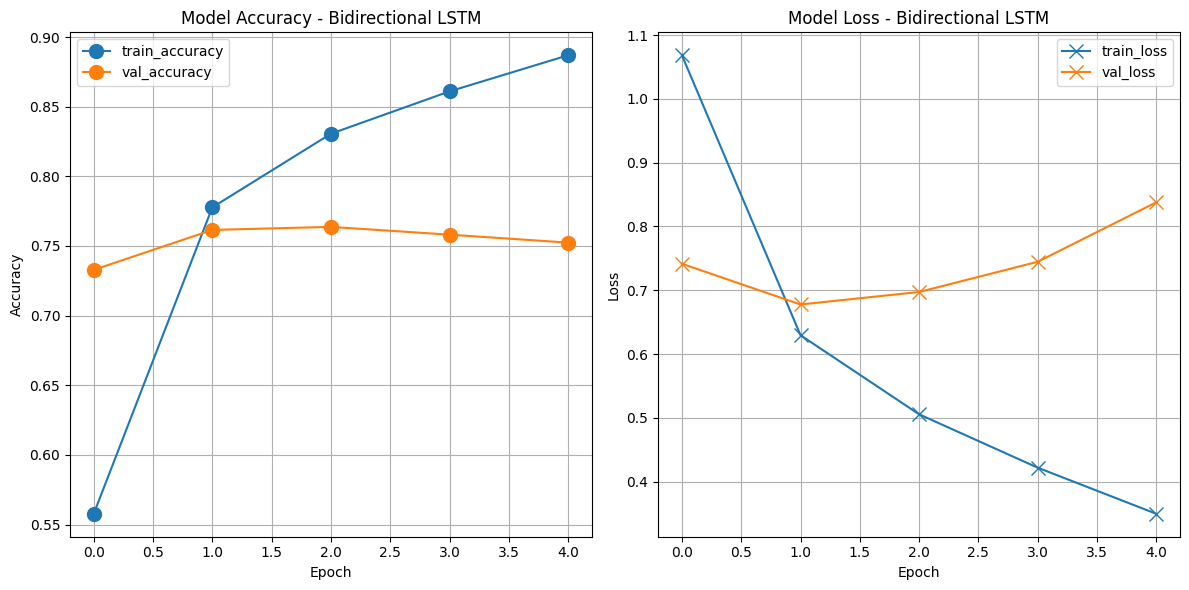

In [117]:
plot_model_history(history_bi_lstm, model_name="Bidirectional LSTM")
# The functional has been defined in the LSTM NN follows the 1st one 

258/258 [==============================] - 7s 26ms/step
Classification Report for Bidirectional LSTM:
                    precision    recall  f1-score   support

Extremely Negative       0.77      0.73      0.75      1072
Extremely Positive       0.79      0.77      0.78      1341
          Negative       0.68      0.73      0.71      2020
           Neutral       0.86      0.77      0.81      1530
          Positive       0.72      0.75      0.73      2269

          accuracy                           0.75      8232
         macro avg       0.76      0.75      0.76      8232
      weighted avg       0.75      0.75      0.75      8232



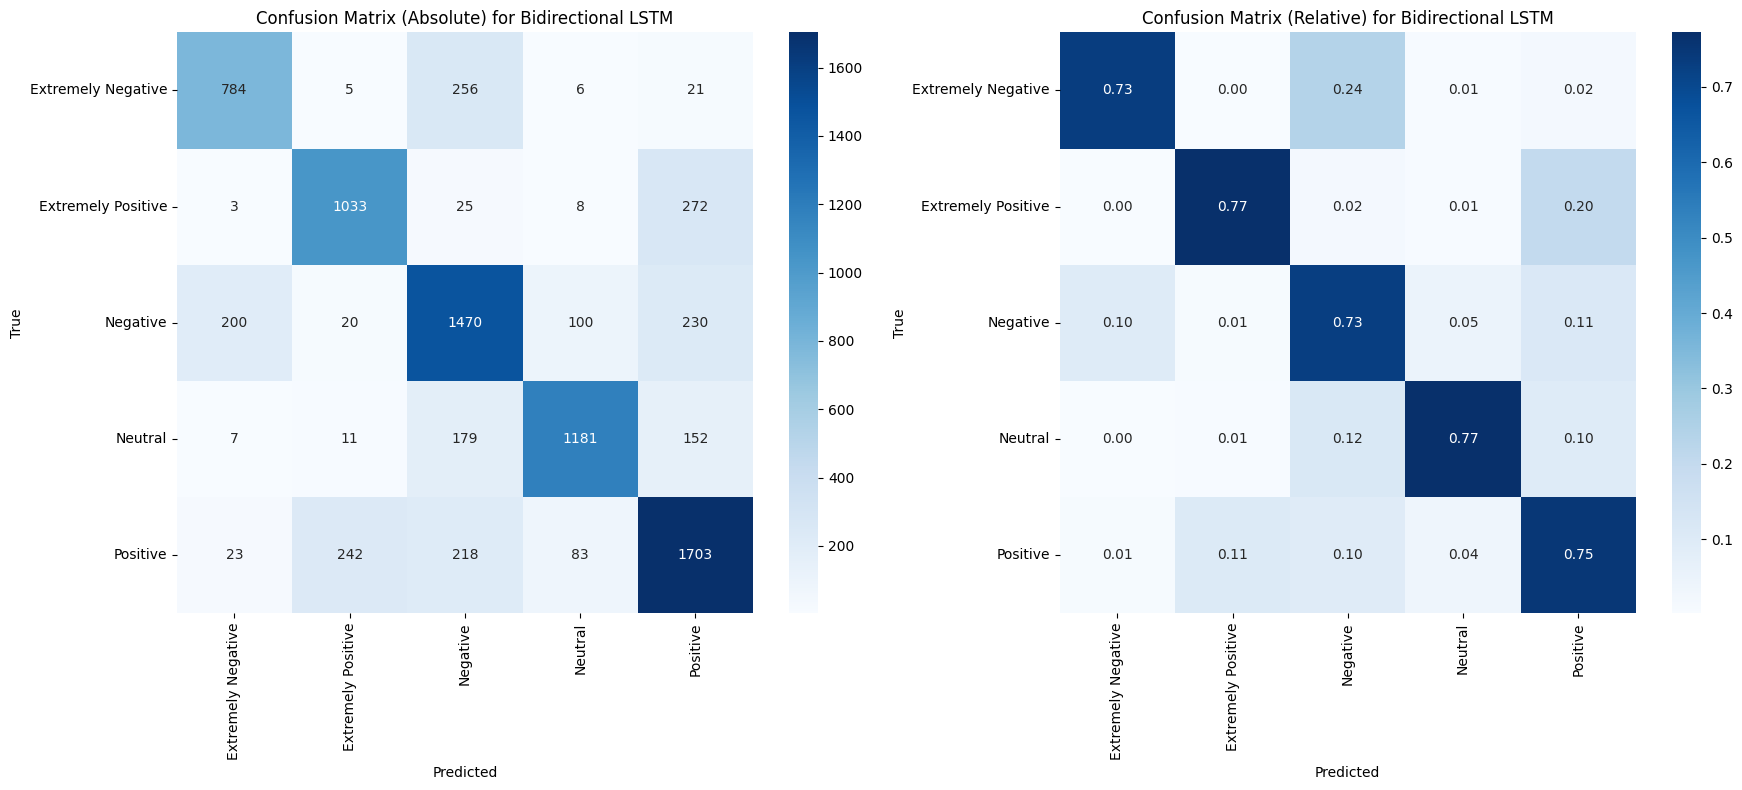

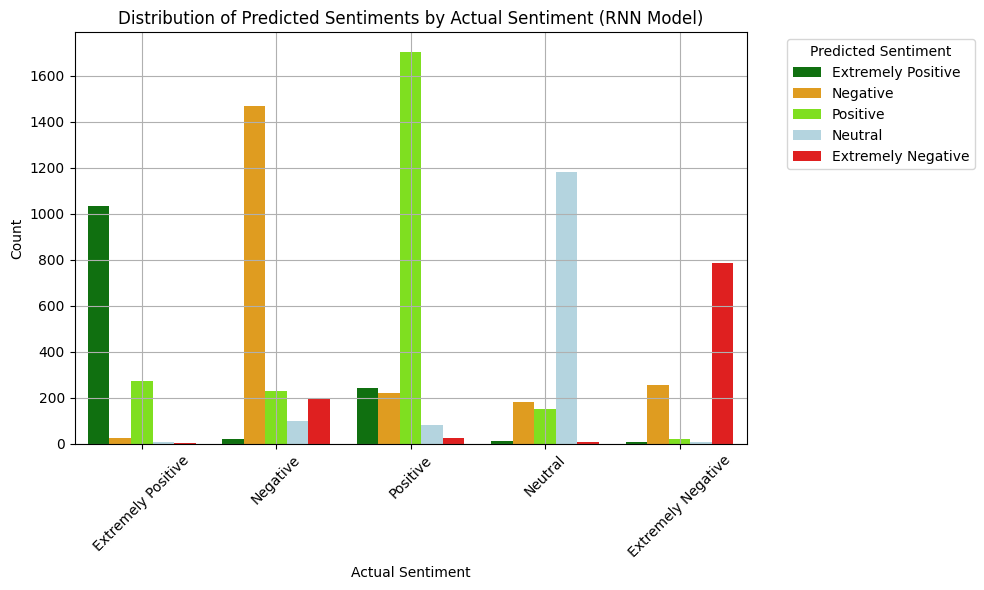

In [118]:
# Step 4. Evaluate the Bidirectional LSTM model
evaluate_model_predictions(model_lstm, X_val, y_val, model_name="Bidirectional LSTM")
# The functional has been defined in the LSTM NN follows the 1st one 

### Модель 3. GRU

In [119]:
from keras.layers import GRU

In [120]:
# Step 1: Define the GRU model architecture

# Set model parameters
gru_units = 128
num_classes = 5      # Number of sentiment classes (for example)

# Create the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_gru.add(GRU(units=gru_units, return_sequences=False))  # Use GRU instead of LSTM
model_gru.add(Dropout(0.5))  # Add dropout for regularization
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 gru_3 (GRU)                 (None, 128)               88320     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,096,901
Trainable params: 1,096,901
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Step 2: Compile the model
model_gru.compile(
    loss='categorical_crossentropy',  # For one-hot encoded labels
    optimizer='adam',
    metrics=['accuracy']
)


In [122]:
# Debugging: Check the shape of the training data and labels
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")


X_train shape: (32927, 150)
y_train shape: (32927, 5)
X_val shape: (8232, 150)
y_val shape: (8232, 5)


In [123]:
print(y_train.sum(axis=1))  # Should print an array of 1's if one-hot encoded correctly


[1 1 1 ... 1 1 1]


In [125]:
# Step 3: Train the model
epochs = 5  # Set the number of epochs for training
batch_size = 32

history_gru = model_gru.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/5
1029/1029 [==============================] - 74s 72ms/step - loss: 0.6138 - accuracy: 0.7815 - val_loss: 0.6873 - val_accuracy: 0.7617
Epoch 2/5
1029/1029 [==============================] - 74s 72ms/step - loss: 0.4944 - accuracy: 0.8335 - val_loss: 0.6991 - val_accuracy: 0.7652
Epoch 3/5
1029/1029 [==============================] - 73s 71ms/step - loss: 0.4012 - accuracy: 0.8677 - val_loss: 0.7585 - val_accuracy: 0.7535
Epoch 4/5
1029/1029 [==============================] - 73s 71ms/step - loss: 0.3248 - accuracy: 0.8936 - val_loss: 0.8416 - val_accuracy: 0.7455
Epoch 5/5
1029/1029 [==============================] - 74s 72ms/step - loss: 0.2571 - accuracy: 0.9173 - val_loss: 0.9833 - val_accuracy: 0.7287


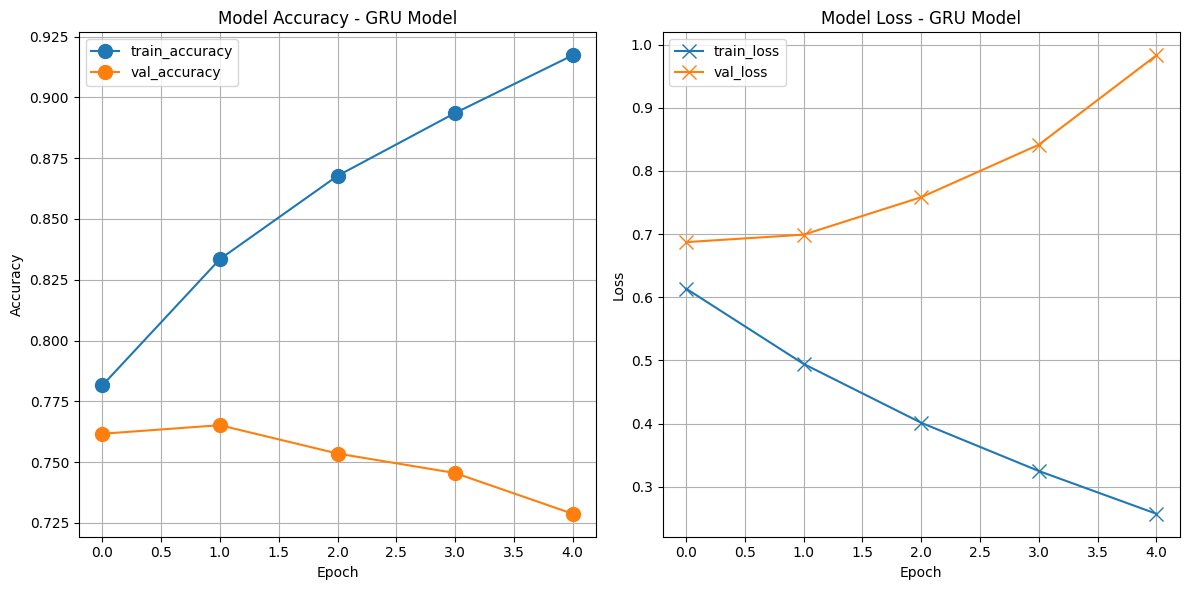

In [126]:
plot_model_history(history_gru, model_name="GRU Model")
# The functional has been defined in the LSTM NN follows the 1st one 

258/258 [==============================] - 4s 15ms/step
Classification Report for GRU Model:
                    precision    recall  f1-score   support

Extremely Negative       0.75      0.70      0.72      1072
Extremely Positive       0.78      0.75      0.76      1341
          Negative       0.66      0.70      0.68      2020
           Neutral       0.88      0.73      0.80      1530
          Positive       0.68      0.75      0.71      2269

          accuracy                           0.73      8232
         macro avg       0.75      0.73      0.74      8232
      weighted avg       0.74      0.73      0.73      8232



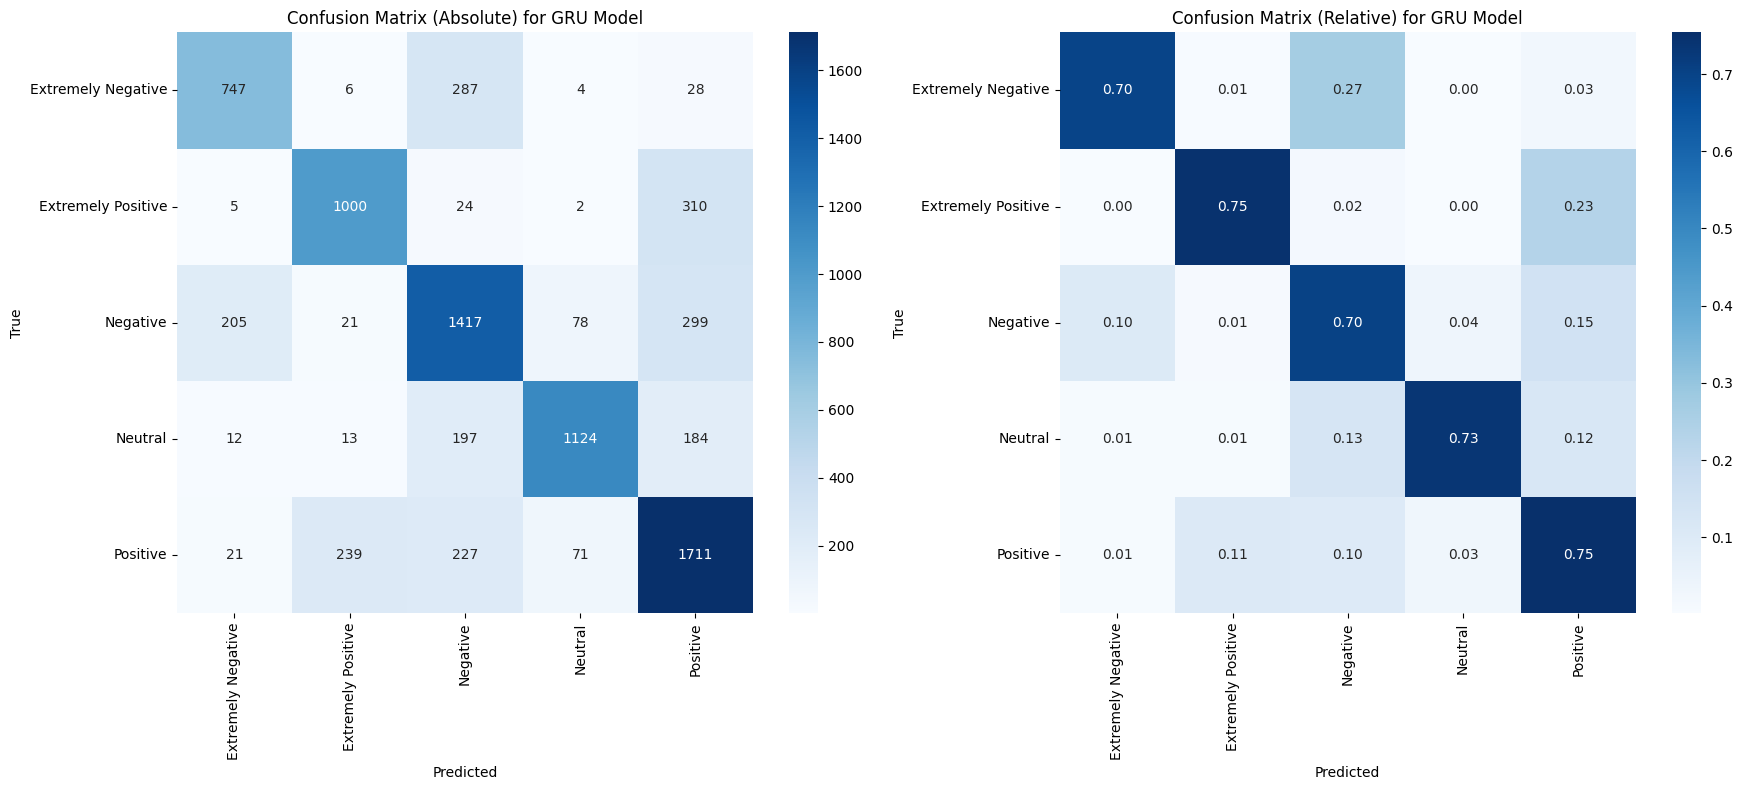

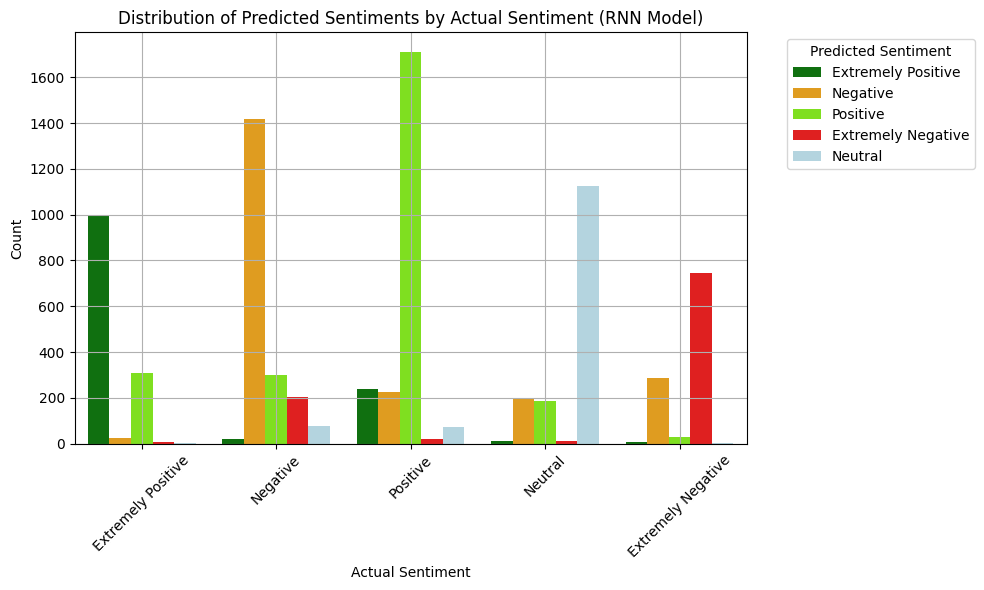

In [127]:
# Step 4. Evaluate the Bidirectional LSTM model
evaluate_model_predictions(model_gru, X_val, y_val, model_name="GRU Model")
# The functional has been defined in the LSTM NN follows the 1st one 

### Модель 4. RNN (элементы LSTM/GRU) с элементами attention

In [128]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Embedding, Attention
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling1D

In [129]:
# Define the attention layer (as a custom layer)
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],), initializer="random_normal", trainable=True)

    def call(self, inputs):
        score = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)

In [59]:
# Step 1.1 Define the attention layer (as a custom layer)
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],), initializer="random_normal", trainable=True)

    def call(self, inputs):
        score = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [130]:
# Step 1.2 Modify the attention RNN model with GlobalAveragePooling1D
def build_attention_rnn_model(input_shape, vocab_size, embedding_dim, lstm_units, output_units):
    inputs = Input(shape=(input_shape,))
    embedding = Embedding(vocab_size, embedding_dim)(inputs)
    lstm = LSTM(lstm_units, return_sequences=True)(embedding)
    
    # Add Attention layer
    attention = Attention()([lstm, lstm])
    
    # Add GlobalAveragePooling to match the output shape
    global_avg_pool = GlobalAveragePooling1D()(attention)
    
    # Follow with Dense and Dropout layers
    dropout = Dropout(0.5)(global_avg_pool)
    dense = Dense(64, activation='relu')(dropout)
    outputs = Dense(output_units, activation='softmax')(dense)
    
    # Build the model
    model = Model(inputs, outputs)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [131]:
# Step 1.3. Building the model
attention_rnn_model = build_attention_rnn_model(
    input_shape=150,  # Max length of the sequence
    vocab_size=10000,  # Assuming 10k words in vocabulary
    embedding_dim=100,  # Dimension of embedding
    lstm_units=128,  # LSTM output units
    output_units=5  # Number of sentiment classes
)

# Display the model summary
attention_rnn_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 150, 100)     1000000     ['input_7[0][0]']                
                                                                                                  
 lstm_10 (LSTM)                 (None, 150, 128)     117248      ['embedding_14[0][0]']           
                                                                                                  
 attention_5 (Attention)        (None, 150, 128)     0           ['lstm_10[0][0]',                
                                                                  'lstm_10[0][0]']          

In [132]:
# Step 2. Compile the model
attention_rnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)
attention_rnn_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150)]        0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 150, 100)     1000000     ['input_7[0][0]']                
                                                                                                  
 lstm_10 (LSTM)                 (None, 150, 128)     117248      ['embedding_14[0][0]']           
                                                                                                  
 attention_5 (Attention)        (None, 150, 128)     0           ['lstm_10[0][0]',                
                                                                  'lstm_10[0][0]']          

In [133]:
# Checking the shape of both input and output data
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((32927, 150), (32927, 5), (8232, 150), (8232, 5))

In [134]:
# Step 3. Training the model
epochs = 5  # Set the number of epochs
batch_size = 32

history_attention_rnn = attention_rnn_model.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val)
)

Epoch 1/5


1029/1029 [==============================] - 112s 108ms/step - loss: 1.3240 - accuracy: 0.4176 - val_loss: 0.8814 - val_accuracy: 0.6631
Epoch 2/5
1029/1029 [==============================] - 110s 107ms/step - loss: 0.7322 - accuracy: 0.7373 - val_loss: 0.6843 - val_accuracy: 0.7642
Epoch 3/5
1029/1029 [==============================] - 111s 108ms/step - loss: 0.5831 - accuracy: 0.8000 - val_loss: 0.6652 - val_accuracy: 0.7781
Epoch 4/5
1029/1029 [==============================] - 110s 107ms/step - loss: 0.5026 - accuracy: 0.8343 - val_loss: 0.6936 - val_accuracy: 0.7703
Epoch 5/5
1029/1029 [==============================] - 110s 107ms/step - loss: 0.4317 - accuracy: 0.8604 - val_loss: 0.7573 - val_accuracy: 0.7550


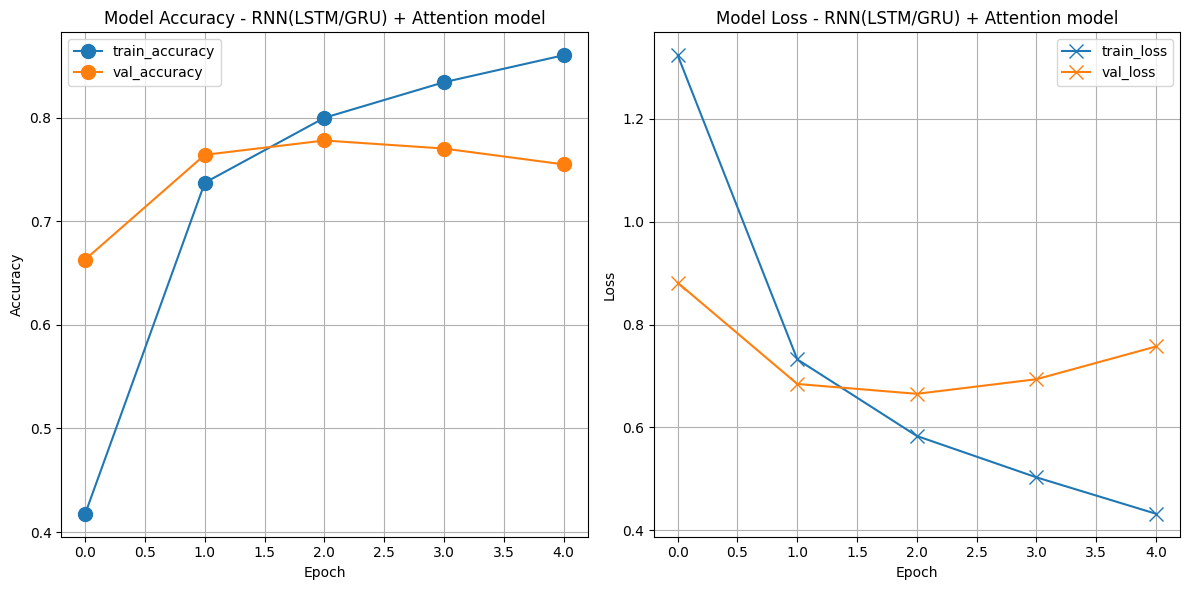

In [136]:
plot_model_history(history_attention_rnn, model_name="RNN(LSTM/GRU) + Attention model")
# The functional has been defined in the LSTM NN follows the 1st one 

258/258 [==============================] - 8s 31ms/step
Classification Report for RNN(LSTM/GRU) + Attention model:
                    precision    recall  f1-score   support

Extremely Negative       0.71      0.77      0.74      1072
Extremely Positive       0.78      0.82      0.80      1341
          Negative       0.71      0.68      0.69      2020
           Neutral       0.87      0.78      0.83      1530
          Positive       0.73      0.76      0.75      2269

          accuracy                           0.75      8232
         macro avg       0.76      0.76      0.76      8232
      weighted avg       0.76      0.75      0.76      8232



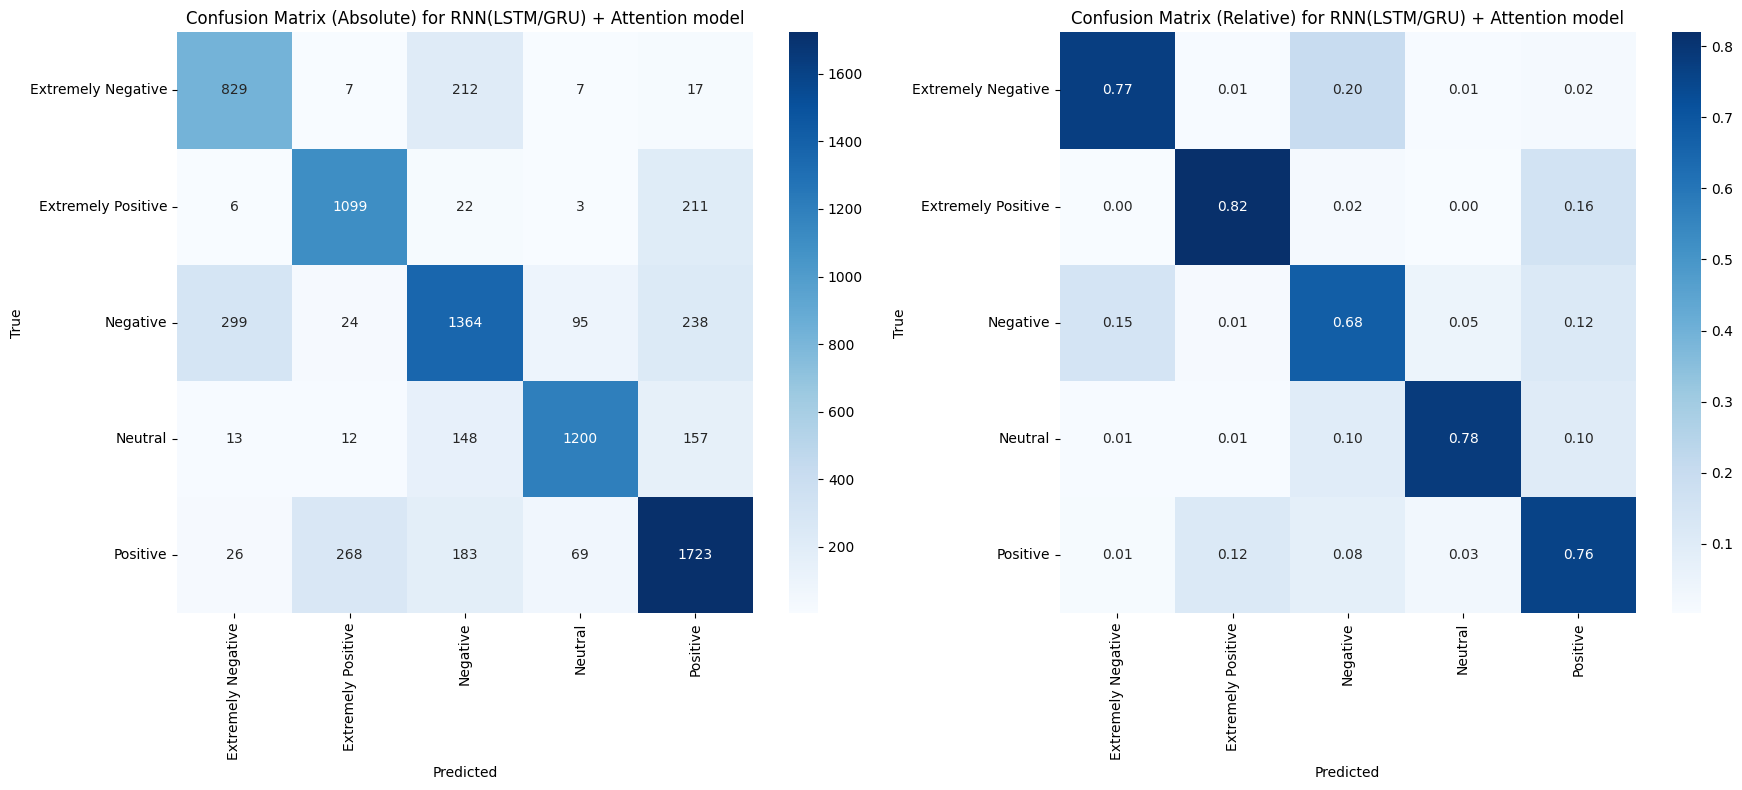

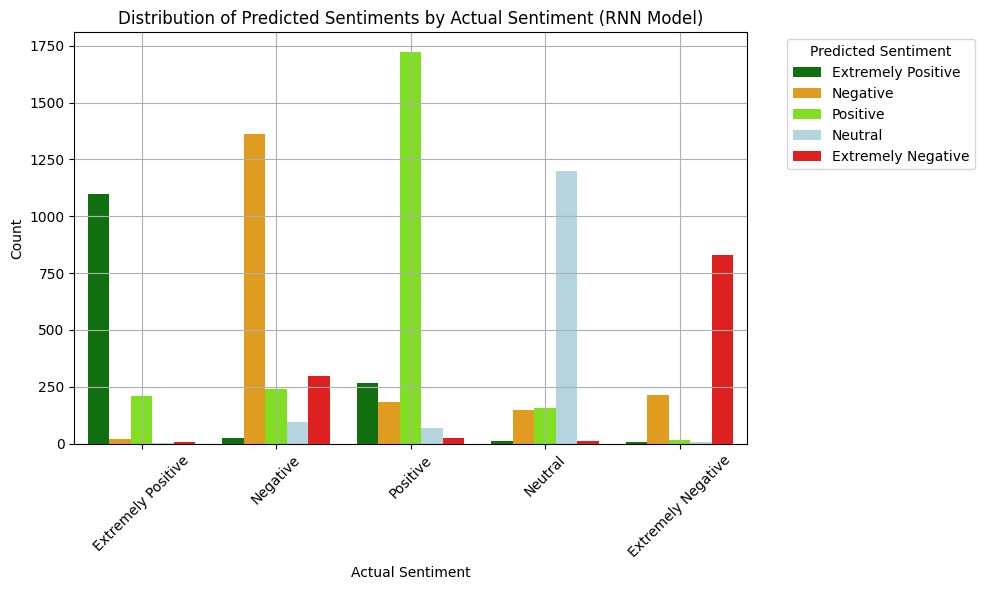

In [137]:
# Step 4. Evaluate the Bidirectional LSTM model
evaluate_model_predictions(attention_rnn_model, X_val, y_val, model_name="RNN(LSTM/GRU) + Attention model")
# The functional has been defined in the LSTM NN follows the 1st one 

### Заключение

Для задачи класссификации текстов были использованы следующие инструменты: 
+ наивные методы
+ модели классического машинного обучения
+ нейронные сети:
    + рекуррентные нейронные сети/RNN (LSTM, bidirectional LSTM, GRU)
    + модели, сочетающие в себе элементы нейронных сетей и трансформеров (LSTM/GRU + attention)

В качестве метрики использовалось accuracy. По итогам обучения нейронных сетей на 5 эпохах были обнаружены следующие результаты (в порядке расположения от лучшего к худшему -- по значению accuracy)

+ нейронные сети
    + LSTM/GRU + attention (75.50%)
    + bidirectional LSTM (75.24)
    + LSTM (74.96%)
    + GRU (73%)
+ модель классического машинного обучения (из библиотеки scikit-learn) (58%)
+ наивный подход -- использование длины текста как эвристического метода (24%)

**По результатам анализа обращают на себя внимание следующие факты:**

+ для классической модели ML имено место наиболее выраженное количество ошибок в предсказании одной из категорий: Neutral (в разы больше, чем данная модель совершала в предсказаниях других семантических категорий). Данной особенности не было замечено для нейронных сетей.
+ Все модели нейронных сетей склонны к переобучению: с каждой последующей эпохой между значением accuracy для тренировочной и тестовой выборок возрастает разница в пользу тренировочной. Особенно выраженным переобучение было для GRU модели -- там значение accuracy преобладало для тренировочной выборки над значением метрики для тестовой с первой же эпохи (для остальных проанализированных в работе моделей такого не отмечалось), и на 5-ой эпохе преобладание accuracy для тренировочной выборки над значением для тестовой являлось наибольшим, нежели в других моделях, и составило ~16%.
+ Практически для всех моделей рекуррентных нейронных сетей по результатам наблюдения графиков в данной работе отмечалась парадоксальная реакция на обучение: значение accuracy на валидационной выборке достигало наибольших значений (/a значение loss на валидационной выборке -- наименьших) на 2-ой эпохе, и далее к 5-ой эпохе убывало (/возрастало) по сравнению с максимальным (/минимальным) значением, однако оставалось выше (/ниже) значений на 1-ой эпохе;
такое поведение метрик отмечалось для нейронных сетей кроме GRU, для GRU описываемое парадоксальное поведение было особенно ярко выраженно -- значение accuracy на валидационной выборке на протяжении всех 5 эпох убывало, a значение loss на валидационной выборке -- возрастало.

*Данные факты могут говорить о:*
 + несовершенстве самих моделей
 + несовершенстве структуры построенных моделей в данной работе и необходимости более тщательной доработки
 + несовершенстве использования (и необходимости применения оптимизаторов, динамического dropoutrate и пр.)
 + проблемах с качеством (например, требуется более тщательная очистка, или наоборот, более мягкая) датасета (приведших к чрезмерной адаптации модели к обучающим наборам в ущерб реальной предсказательной способности)